# Reducing the number of high fatality accidents

## 📖 Background
You work for the road safety team within the department of transport and are looking into how they can reduce the number of major incidents. The safety team classes major incidents as fatal accidents involving 3+ casualties. They are trying to learn more about the characteristics of these major incidents so they can brainstorm interventions that could lower the number of deaths. They have asked for your assistance with answering a number of questions.

## 💾 The data
The reporting department have been collecting data on every accident that is reported. They've included this along with a lookup file for 2020's accidents.

*Published by the department for transport. https://data.gov.uk/dataset/road-accidents-safety-data* 
*Contains public sector information licensed under the Open Government Licence v3.0.*

In [1]:
!pip install -qU numpy
!pip install -qU pandas
!pip install -qU matplotlib
!pip install -qU seaborn
!pip install -qU geopandas
!pip install -qU folium

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.4.1 requires numpy~=1.19.2, but you have numpy 1.21.4 which is incompatible.
pythonwhat 2.23.1 requires dill~=0.2.7.1, but you have dill 0.3.3 which is incompatible.
pythonwhat 2.23.1 requires jinja2~=2.10, but you have jinja2 3.0.1 which is incompatible.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.4.1 requires numpy~=1.19.2, but you have numpy 1.21.4 which is incompatible.
tensorflow 2.4.1 requires six~=1.15.0, but you have six 1.16.0 which is incompatible.
pythonwhat 2.23.1 requires dill~=0.2.7.1, but you have dill 0.3.3 which is incompatible.
pythonwhat 2.23.1 requires jinja2~=2.10, but you have jinja2 3.0.1 which is incompatible.
ERROR: pip's dependency re

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 130)
pd.set_option('max_colwidth', 500)

In [4]:
import pandas as pd
accidents = pd.read_csv(r'./data/accident-data.csv')
accidents.head()

accident_index  accident_year accident_reference  longitude   latitude  \
0  2020010219808           2020           10219808  -0.254001  51.462262   
1  2020010220496           2020           10220496  -0.139253  51.470327   
2  2020010228005           2020           10228005  -0.178719  51.529614   
3  2020010228006           2020           10228006  -0.001683  51.541210   
4  2020010228011           2020           10228011  -0.137592  51.515704   

   accident_severity  number_of_vehicles  number_of_casualties        date  \
0                  3                   1                     1  04/02/2020   
1                  3                   1                     2  27/04/2020   
2                  3                   1                     1  01/01/2020   
3                  2                   1                     1  01/01/2020   
4                  3                   1                     2  01/01/2020   

   day_of_week   time  first_road_class  first_road_number  road_type  \
0            3  09:00                 6                  0          6   
1            2  13:55                 3               3036          6   
2            4  01:25                 5                  0          6   
3            4  01:50                 3                 11          6   
4            4  02:25                 3                 40          6   

   speed_limit  junction_detail  junction_control  second_road_class  \
0           20                0                -1                  6   
1           20                9                 2                  6   
2           30                3                 1                  6   
3           30                0                -1                  6   
4           30                3                 4                  5   

   second_road_number  pedestrian_crossing_human_control  \
0                   0                                  9   
1                   0                                  0   
2                   0                                  0   
3                   0                                  0   
4                   0                                  0   

   pedestrian_crossing_physical_facilities  light_conditions  \
0                                        9                 1   
1                                        4                 1   
2                                        0                 4   
3                                        4                 4   
4                                        0                 4   

   weather_conditions  road_surface_conditions  special_conditions_at_site  \
0                   9                        9                           0   
1                   1                        1                           0   
2                   1                        2                           0   
3                   1                        1                           0   
4                   1                        1                           0   

   carriageway_hazards  urban_or_rural_area  
0                    0                    1  
1                    0                    1  
2                    0                    1  
3                    0                    1  
4                    0                    1

In [5]:
lookup = pd.read_csv(r'./data/road-safety-lookups.csv')
lookup

table                               field name   code/format  \
0    Accident                           accident_index           NaN   
1    Accident                            accident_year           NaN   
2    Accident                       accident_reference           NaN   
3    Accident                                longitude           NaN   
4    Accident                                 Latitude           NaN   
5    Accident                        accident_severity             1   
6    Accident                        accident_severity             2   
7    Accident                        accident_severity             3   
8    Accident                       number_of_vehicles           NaN   
9    Accident                     number_of_casualties           NaN   
10   Accident                                     date  (DD/MM/YYYY)   
11   Accident                              day_of_week             1   
12   Accident                              day_of_week             2   
13   Accident                              day_of_week             3   
14   Accident                              day_of_week             4   
15   Accident                              day_of_week             5   
16   Accident                              day_of_week             6   
17   Accident                              day_of_week             7   
18   Accident                                     time       (HH:MM)   
19   Accident                         first_road_class             1   
20   Accident                         first_road_class             2   
21   Accident                         first_road_class             3   
22   Accident                         first_road_class             4   
23   Accident                         first_road_class             5   
24   Accident                         first_road_class             6   
25   Accident                        first_road_number     1 to 9999   
26   Accident                        first_road_number            -1   
27   Accident                        first_road_number             0   
28   Accident                                road_type             1   
29   Accident                                road_type             2   
30   Accident                                road_type             3   
31   Accident                                road_type             6   
32   Accident                                road_type             7   
33   Accident                                road_type             9   
34   Accident                                road_type            12   
35   Accident                                road_type            -1   
36   Accident                              speed_limit           NaN   
37   Accident                              speed_limit            -1   
38   Accident                              speed_limit            99   
39   Accident                          junction_detail             0   
40   Accident                          junction_detail             1   
41   Accident                          junction_detail             2   
42   Accident                          junction_detail             3   
43   Accident                          junction_detail             5   
44   Accident                          junction_detail             6   
45   Accident                          junction_detail             7   
46   Accident                          junction_detail             8   
47   Accident                          junction_detail             9   
48   Accident                          junction_detail            99   
49   Accident                          junction_detail            -1   
50   Accident                         junction_control             0   
51   Accident                         junction_control             1   
52   Accident                         junction_control             2   
53   Accident                         junction_control             3   
54   Accident                         junction_c

## 💪 Competition challenge

Create a report that covers the following:

1. What time of day and day of the week do most major incidents happen?
2. Are there any patterns in the time of day/ day of the week when major incidents occur?
3. What characteristics stand out in major incidents compared with other accidents?
4. On what areas would you recommend the planning team focus their brainstorming efforts to reduce major incidents?

## 🧑‍⚖️ Judging criteria

| CATEGORY | WEIGHTING | DETAILS                                                              |
|:---------|:----------|:---------------------------------------------------------------------|
| **Recommendations** | 35%       | <ul><li>Clarity of recommendations - how clear and well presented the recommendation is.</li><li>Quality of recommendations - are appropriate analytical techniques used & are the conclusions valid?</li><li>Number of relevant insights found for the target audience.</li></ul>       |
| **Storytelling**  | 30%       | <ul><li>How well the data and insights are connected to the recommendation.</li><li>How the narrative and whole report connects together.</li><li>Balancing making the report in depth enough but also concise.</li></ul> |
| **Visualizations** | 25% | <ul><li>Appropriateness of visualization used.</li><li>Clarity of insight from visualization.</li></ul> |
| **Votes** | 10% | <ul><li>Up voting - most upvoted entries get the most points.</li></ul> |

## ✅ Checklist before publishing into the competition
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- Remove redundant cells like the judging criteria so the workbook is focused on your story.
- Make sure the workbook reads well and explains how you found your insights.
- Check that all the cells run without error.

## ⌛️ Time is ticking. Good luck!

* lets create a helper function to help us find values in lookup table:

In [6]:
def lookup_search(field_name):
    display(lookup[lookup['field name']==field_name])

In [7]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91199 entries, 0 to 91198
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   accident_index                           91199 non-null  object 
 1   accident_year                            91199 non-null  int64  
 2   accident_reference                       91199 non-null  object 
 3   longitude                                91185 non-null  float64
 4   latitude                                 91185 non-null  float64
 5   accident_severity                        91199 non-null  int64  
 6   number_of_vehicles                       91199 non-null  int64  
 7   number_of_casualties                     91199 non-null  int64  
 8   date                                     91199 non-null  object 
 9   day_of_week                              91199 non-null  int64  
 10  time                                     91199

In [8]:
accidents['date'] = pd.to_datetime(accidents['date'],format="%d/%m/%Y")

In [9]:
accidents['time'] = pd.to_timedelta(accidents['time']+':00')

In [10]:
accidents['datetime'] = accidents.apply(lambda r: r['date']+r['time'],axis=1)

In [11]:
accidents['date']  = pd.DatetimeIndex(accidents['datetime']).date

In [12]:
accidents['time']  = pd.DatetimeIndex(accidents['datetime']).time

In [13]:
accidents['hour'] =  pd.DatetimeIndex(accidents['datetime']).hour

In [14]:
accidents['month'] =  pd.DatetimeIndex(accidents['datetime']).month

In [15]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91199 entries, 0 to 91198
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   accident_index                           91199 non-null  object        
 1   accident_year                            91199 non-null  int64         
 2   accident_reference                       91199 non-null  object        
 3   longitude                                91185 non-null  float64       
 4   latitude                                 91185 non-null  float64       
 5   accident_severity                        91199 non-null  int64         
 6   number_of_vehicles                       91199 non-null  int64         
 7   number_of_casualties                     91199 non-null  int64         
 8   date                                     91199 non-null  object        
 9   day_of_week                            

In [16]:
accidents.head()

accident_index  accident_year accident_reference  longitude   latitude  \
0  2020010219808           2020           10219808  -0.254001  51.462262   
1  2020010220496           2020           10220496  -0.139253  51.470327   
2  2020010228005           2020           10228005  -0.178719  51.529614   
3  2020010228006           2020           10228006  -0.001683  51.541210   
4  2020010228011           2020           10228011  -0.137592  51.515704   

   accident_severity  number_of_vehicles  number_of_casualties        date  \
0                  3                   1                     1  2020-02-04   
1                  3                   1                     2  2020-04-27   
2                  3                   1                     1  2020-01-01   
3                  2                   1                     1  2020-01-01   
4                  3                   1                     2  2020-01-01   

   day_of_week      time  first_road_class  first_road_number  road_type  \
0            3  09:00:00                 6                  0          6   
1            2  13:55:00                 3               3036          6   
2            4  01:25:00                 5                  0          6   
3            4  01:50:00                 3                 11          6   
4            4  02:25:00                 3                 40          6   

   speed_limit  junction_detail  junction_control  second_road_class  \
0           20                0                -1                  6   
1           20                9                 2                  6   
2           30                3                 1                  6   
3           30                0                -1                  6   
4           30                3                 4                  5   

   second_road_number  pedestrian_crossing_human_control  \
0                   0                                  9   
1                   0                                  0   
2                   0                                  0   
3                   0                                  0   
4                   0                                  0   

   pedestrian_crossing_physical_facilities  light_conditions  \
0                                        9                 1   
1                                        4                 1   
2                                        0                 4   
3                                        4                 4   
4                                        0                 4   

   weather_conditions  road_surface_conditions  special_conditions_at_site  \
0                   9                        9                           0   
1                   1                        1                           0   
2                   1                        2                           0   
3                   1                        1                           0   
4                   1                        1                           0   

   carriageway_hazards  urban_or_rural_area            datetime  hour  month  
0                    0                    1 2020-02-04 09:00:00     9      2  
1                    0                    1 2020-04-27 13:55:00    13      4  
2                    0                    1 2020-01-01 01:25:00     1      1  
3                    0                    1 2020-01-01 01:50:00     1      1  
4                    0                    1 2020-01-01 02:25:00     2      1

* Lets see null values:

In [17]:
x = accidents.isna().sum()
pd.DataFrame(x[x!=0]).transpose()

longitude  latitude
0         14        14

* lets check duplicates:

In [18]:
accidents.duplicated().sum()

0

## EDA

In [19]:
lookup_search('number_of_casualties')

table            field name code/format label note
9  Accident  number_of_casualties         NaN   NaN  NaN

In [20]:
x = accidents['number_of_casualties'].value_counts()
x = pd.DataFrame(x).reset_index()
x.columns = ['number_of_casualties','count']
above_3 = x.loc[x['number_of_casualties']>3].sum()['count']
above_3
x = x[x['number_of_casualties']<4]
x = x.append({"number_of_casualties":"+3","count":above_3},ignore_index=True)
x


number_of_casualties  count
0                    1  74161
1                    2  12221
2                    3   3214
3                   +3   1603

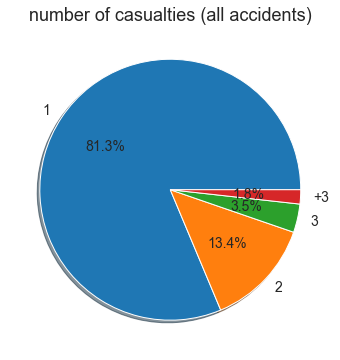

In [22]:
sns.set_style('white')
fig = plt.figure(figsize=(6,6))
plt.title("number of casualties (all accidents)",fontsize=18)
plt.pie(x['count'], labels = x['number_of_casualties'],textprops={'fontsize': 14},shadow=True,autopct = '%.1f%%')
plt.show() 

* like 95% from the accidents are with 1 or 2 casualties only!

In [28]:
lookup_search('accident_severity')

table         field name code/format    label note
5  Accident  accident_severity           1    Fatal  NaN
6  Accident  accident_severity           2  Serious  NaN
7  Accident  accident_severity           3   Slight  NaN

In [29]:
x = accidents['accident_severity'].value_counts()

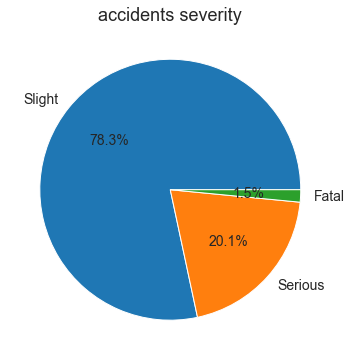

In [30]:
sns.set_style('white')
fig = plt.figure(figsize=(6,6))
plt.title("accidents severity",fontsize=18)
plt.pie(x.values, labels = ['Slight','Serious','Fatal'],textprops={'fontsize': 14},autopct = '%.1f%%')
plt.show() 

* we are going to focus only on fatal accidents with 3 casualties or more. it's a very tiny fraction from all the accidents.

* lets create a column which inidicate if the accident is severe (1) or not (0).
* like the project definition says: "The safety team classes major incidents as fatal accidents involving 3+ casualties."

In [31]:
accidents['severe'] = accidents.apply(lambda r: 1 if r['accident_severity']==1 and r['number_of_casualties']>2 else 0,axis = 1 )

In [32]:
accidents.loc[accidents['severe']==1].head()

accident_index  accident_year accident_reference  longitude   latitude  \
3102   2020010237692           2020           10237692   0.224735  51.587108   
3583   2020010239141           2020           10239141   0.101736  51.499338   
19652  2020010283951           2020          010283951  -0.218475  51.482150   
21148  2020030957848           2020          030957848  -2.897101  54.814695   
21166  2020030959320           2020          030959320  -3.189454  54.150303   

       accident_severity  number_of_vehicles  number_of_casualties  \
3102                   1                   8                    11   
3583                   1                   1                     3   
19652                  1                   2                     4   
21148                  1                   2                     3   
21166                  1                   1                     4   

             date  day_of_week      time  first_road_class  first_road_number  \
3102   2020-02-20            5  13:17:00                 5                  0   
3583   2020-02-29            7  05:13:00                 3               2016   
19652  2020-12-10            5  22:26:00                 3                219   
21148  2020-06-15            2  12:11:00                 6                  0   
21166  2020-06-21            1  14:20:00                 6                  0   

       road_type  speed_limit  junction_detail  junction_control  \
3102           6           30                0                -1   
3583           1           50                1                 4   
19652          3           30                3                 4   
21148          6           60                6                 4   
21166          6           40                0                -1   

       second_road_class  second_road_number  \
3102                   6                   0   
3583                   3                2041   
19652                  6                   0   
21148                  6                   0   
21166                  6                   0   

       pedestrian_crossing_human_control  \
3102                                   0   
3583                                   0   
19652                                  0   
21148                                  0   
21166                                  0   

       pedestrian_crossing_physical_facilities  light_conditions  \
3102                                         0                 1   
3583                                         0                 6   
19652                                        0                 4   
21148                                        0                 1   
21166                                        0                 1   

       weather_conditions  road_surface_conditions  \
3102                    8                        2   
3583                    2                        2   
19652                   1                        2   
21148                   1                        1   
21166                   1                        1   

       special_conditions_at_site  carriageway_hazards  urban_or_rural_area  \
3102                            0                    0                    1   
3583                            0                    0                    2   
19652                           0                    0                    1   
21148                           0                    0                    2   
21166                           0                    0                    2   

                 datetime  hour  month  severe  
3102  2020-02-20 13:17:00    13      2       1  
3583  2020-02-29 05:13:00     5      2       1  
19652 2020-12-10 22:26:00    22     12       1  
21148 2020-06-15 12:11:00    12      6       1  
21166 2020-06-21 14:20:00    14      6       1

In [35]:
accidents.loc[accidents['severe']==1].shape, accidents.shape

((202, 31), (91199, 31))

* we are focusing only on 202 accidents from 91200!

In [36]:
accidents.loc[accidents['severe']==0].head()

accident_index  accident_year accident_reference  longitude   latitude  \
0  2020010219808           2020           10219808  -0.254001  51.462262   
1  2020010220496           2020           10220496  -0.139253  51.470327   
2  2020010228005           2020           10228005  -0.178719  51.529614   
3  2020010228006           2020           10228006  -0.001683  51.541210   
4  2020010228011           2020           10228011  -0.137592  51.515704   

   accident_severity  number_of_vehicles  number_of_casualties        date  \
0                  3                   1                     1  2020-02-04   
1                  3                   1                     2  2020-04-27   
2                  3                   1                     1  2020-01-01   
3                  2                   1                     1  2020-01-01   
4                  3                   1                     2  2020-01-01   

   day_of_week      time  first_road_class  first_road_number  road_type  \
0            3  09:00:00                 6                  0          6   
1            2  13:55:00                 3               3036          6   
2            4  01:25:00                 5                  0          6   
3            4  01:50:00                 3                 11          6   
4            4  02:25:00                 3                 40          6   

   speed_limit  junction_detail  junction_control  second_road_class  \
0           20                0                -1                  6   
1           20                9                 2                  6   
2           30                3                 1                  6   
3           30                0                -1                  6   
4           30                3                 4                  5   

   second_road_number  pedestrian_crossing_human_control  \
0                   0                                  9   
1                   0                                  0   
2                   0                                  0   
3                   0                                  0   
4                   0                                  0   

   pedestrian_crossing_physical_facilities  light_conditions  \
0                                        9                 1   
1                                        4                 1   
2                                        0                 4   
3                                        4                 4   
4                                        0                 4   

   weather_conditions  road_surface_conditions  special_conditions_at_site  \
0                   9                        9                           0   
1                   1                        1                           0   
2                   1                        2                           0   
3                   1                        1                           0   
4                   1                        1                           0   

   carriageway_hazards  urban_or_rural_area            datetime  hour  month  \
0                    0                    1 2020-02-04 09:00:00     9      2   
1                    0                    1 2020-04-27 13:55:00    13      4   
2                    0                    1 2020-01-01 01:25:00     1      1   
3                    0                    1 2020-01-01 01:50:00     1      1   
4                    0                    1 2020-01-01 02:25:00     2      1   

   severe  
0       0  
1       0  
2       0  
3       0  
4       0

* for convenience , lets create 2 dataframes: svere and non severe.

In [38]:
severe_df = accidents[accidents['severe']==1]
non_severe_df = accidents[accidents['severe']==0]

In [39]:
non_severe_df.head()

accident_index  accident_year accident_reference  longitude   latitude  \
0  2020010219808           2020           10219808  -0.254001  51.462262   
1  2020010220496           2020           10220496  -0.139253  51.470327   
2  2020010228005           2020           10228005  -0.178719  51.529614   
3  2020010228006           2020           10228006  -0.001683  51.541210   
4  2020010228011           2020           10228011  -0.137592  51.515704   

   accident_severity  number_of_vehicles  number_of_casualties        date  \
0                  3                   1                     1  2020-02-04   
1                  3                   1                     2  2020-04-27   
2                  3                   1                     1  2020-01-01   
3                  2                   1                     1  2020-01-01   
4                  3                   1                     2  2020-01-01   

   day_of_week      time  first_road_class  first_road_number  road_type  \
0            3  09:00:00                 6                  0          6   
1            2  13:55:00                 3               3036          6   
2            4  01:25:00                 5                  0          6   
3            4  01:50:00                 3                 11          6   
4            4  02:25:00                 3                 40          6   

   speed_limit  junction_detail  junction_control  second_road_class  \
0           20                0                -1                  6   
1           20                9                 2                  6   
2           30                3                 1                  6   
3           30                0                -1                  6   
4           30                3                 4                  5   

   second_road_number  pedestrian_crossing_human_control  \
0                   0                                  9   
1                   0                                  0   
2                   0                                  0   
3                   0                                  0   
4                   0                                  0   

   pedestrian_crossing_physical_facilities  light_conditions  \
0                                        9                 1   
1                                        4                 1   
2                                        0                 4   
3                                        4                 4   
4                                        0                 4   

   weather_conditions  road_surface_conditions  special_conditions_at_site  \
0                   9                        9                           0   
1                   1                        1                           0   
2                   1                        2                           0   
3                   1                        1                           0   
4                   1                        1                           0   

   carriageway_hazards  urban_or_rural_area            datetime  hour  month  \
0                    0                    1 2020-02-04 09:00:00     9      2   
1                    0                    1 2020-04-27 13:55:00    13      4   
2                    0                    1 2020-01-01 01:25:00     1      1   
3                    0                    1 2020-01-01 01:50:00     1      1   
4                    0                    1 2020-01-01 02:25:00     2      1   

   severe  
0       0  
1       0  
2       0  
3       0  
4       0

In [40]:
severe_df.head()

accident_index  accident_year accident_reference  longitude   latitude  \
3102   2020010237692           2020           10237692   0.224735  51.587108   
3583   2020010239141           2020           10239141   0.101736  51.499338   
19652  2020010283951           2020          010283951  -0.218475  51.482150   
21148  2020030957848           2020          030957848  -2.897101  54.814695   
21166  2020030959320           2020          030959320  -3.189454  54.150303   

       accident_severity  number_of_vehicles  number_of_casualties  \
3102                   1                   8                    11   
3583                   1                   1                     3   
19652                  1                   2                     4   
21148                  1                   2                     3   
21166                  1                   1                     4   

             date  day_of_week      time  first_road_class  first_road_number  \
3102   2020-02-20            5  13:17:00                 5                  0   
3583   2020-02-29            7  05:13:00                 3               2016   
19652  2020-12-10            5  22:26:00                 3                219   
21148  2020-06-15            2  12:11:00                 6                  0   
21166  2020-06-21            1  14:20:00                 6                  0   

       road_type  speed_limit  junction_detail  junction_control  \
3102           6           30                0                -1   
3583           1           50                1                 4   
19652          3           30                3                 4   
21148          6           60                6                 4   
21166          6           40                0                -1   

       second_road_class  second_road_number  \
3102                   6                   0   
3583                   3                2041   
19652                  6                   0   
21148                  6                   0   
21166                  6                   0   

       pedestrian_crossing_human_control  \
3102                                   0   
3583                                   0   
19652                                  0   
21148                                  0   
21166                                  0   

       pedestrian_crossing_physical_facilities  light_conditions  \
3102                                         0                 1   
3583                                         0                 6   
19652                                        0                 4   
21148                                        0                 1   
21166                                        0                 1   

       weather_conditions  road_surface_conditions  \
3102                    8                        2   
3583                    2                        2   
19652                   1                        2   
21148                   1                        1   
21166                   1                        1   

       special_conditions_at_site  carriageway_hazards  urban_or_rural_area  \
3102                            0                    0                    1   
3583                            0                    0                    2   
19652                           0                    0                    1   
21148                           0                    0                    2   
21166                           0                    0                    2   

                 datetime  hour  month  severe  
3102  2020-02-20 13:17:00    13      2       1  
3583  2020-02-29 05:13:00     5      2       1  
19652 2020-12-10 22:26:00    22     12       1  
21148 2020-06-15 12:11:00    12      6       1  
21166 2020-06-21 14:20:00    14      6       1

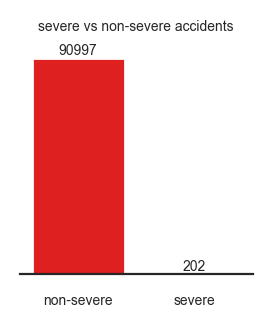

In [41]:
fig, ax = plt.subplots(1,1,figsize=(1.5,1.5),dpi=200)
sns.countplot(data=accidents,x="severe",ax=ax, color='red')
ax.set_xticklabels(["non-severe","severe"],fontsize=5);
ax.set_title("severe vs non-severe accidents",fontsize=5)
for bars in ax.containers:
        ax.bar_label(bars,size=5)
ax.set_yticks([]);
ax.set_ylabel("");
ax.set_xlabel("");
sns.despine(left=True)

In [ ]:
* like we 

* and in percentages:

In [30]:
round(accidents.severe.value_counts(normalize=True),3)*100

0    99.8
1     0.2
Name: severe, dtype: float64

* there are like 3.5% of severe accidents from all the accidents.

### the time differences between severe and not:
* we will check day of week, hour in day and month.

In [31]:
def create_ranges(col,col_range,severe_df=severe_df,non_severe_df=non_severe_df):

    a = severe_df[col].value_counts()
#     we do it for cases where there are not in a all the indexes in col_range:
    index_severe = sorted(list(set(a.index).intersection(col_range)))
    a=a[index_severe]
    b = non_severe_df[col].value_counts()
    index_non_severe = sorted(list(set(b.index).intersection(col_range)))
    b=b[index_non_severe]
    c = round(severe_df[col].value_counts(normalize=True)[index_severe] *100,1)
    d = round(non_severe_df[col].value_counts(normalize=True)[index_non_severe]*100,1)
    return a,b,c,d


In [32]:


def create_2_2(name, x_tick_labels=None,use_lookup=None,rotate=None,figsize=(14,16)):
    fig, ax = plt.subplots(2,2,figsize=(14,16),dpi=200)
    for j,k in ((a,[0,0]),(b,[0,1]),(c,[1,0]),(d,[1,1])):
        x,y = k
        if x==0:
            per="(cases)"
        else:
            per="(percentages)"
        if y==0:
            pal = "OrRd"
            t = "severe"
            t_color= "red"
        else:
            t="non-severe"
            pal= "YlOrBr"
            t_color="brown"

        pal = sns.color_palette(pal, len(j))
        rank = j.argsort().argsort()
        ax[x,y].set_title(f"{t} accidents - {name}, 2020 {per}",color=t_color)
        sns.barplot(x=j.index, y=j.values,ax=ax[x,y], palette=np.array(pal)[rank])
        sns.pointplot(x=j.index, y=j.values, marker='o',ax=ax[x,y],color ="#9bc2de")
        ax[x,y].set_yticks([]);
        for bars in ax[x,y].containers:
            ax[x,y].bar_label(bars,size=10)
        ax[x,y].set_xlabel("")
        ax[x,y].set_ylabel("");
        if x_tick_labels:
            ax[x,y].set_xticklabels(x_tick_labels,fontsize=9,rotation=rotate)
        elif use_lookup:
            labels = lookup[lookup['field name']==j.name].loc[:,['code/format','label']]

            labels = list(labels[labels["code/format"].isin([str(i) for i in j.index])]["label"].values)
        
            ax[x,y].set_xticklabels(labels,fontsize=9,rotation=rotate)
            plt.tight_layout()

    sns.despine(left=True)  

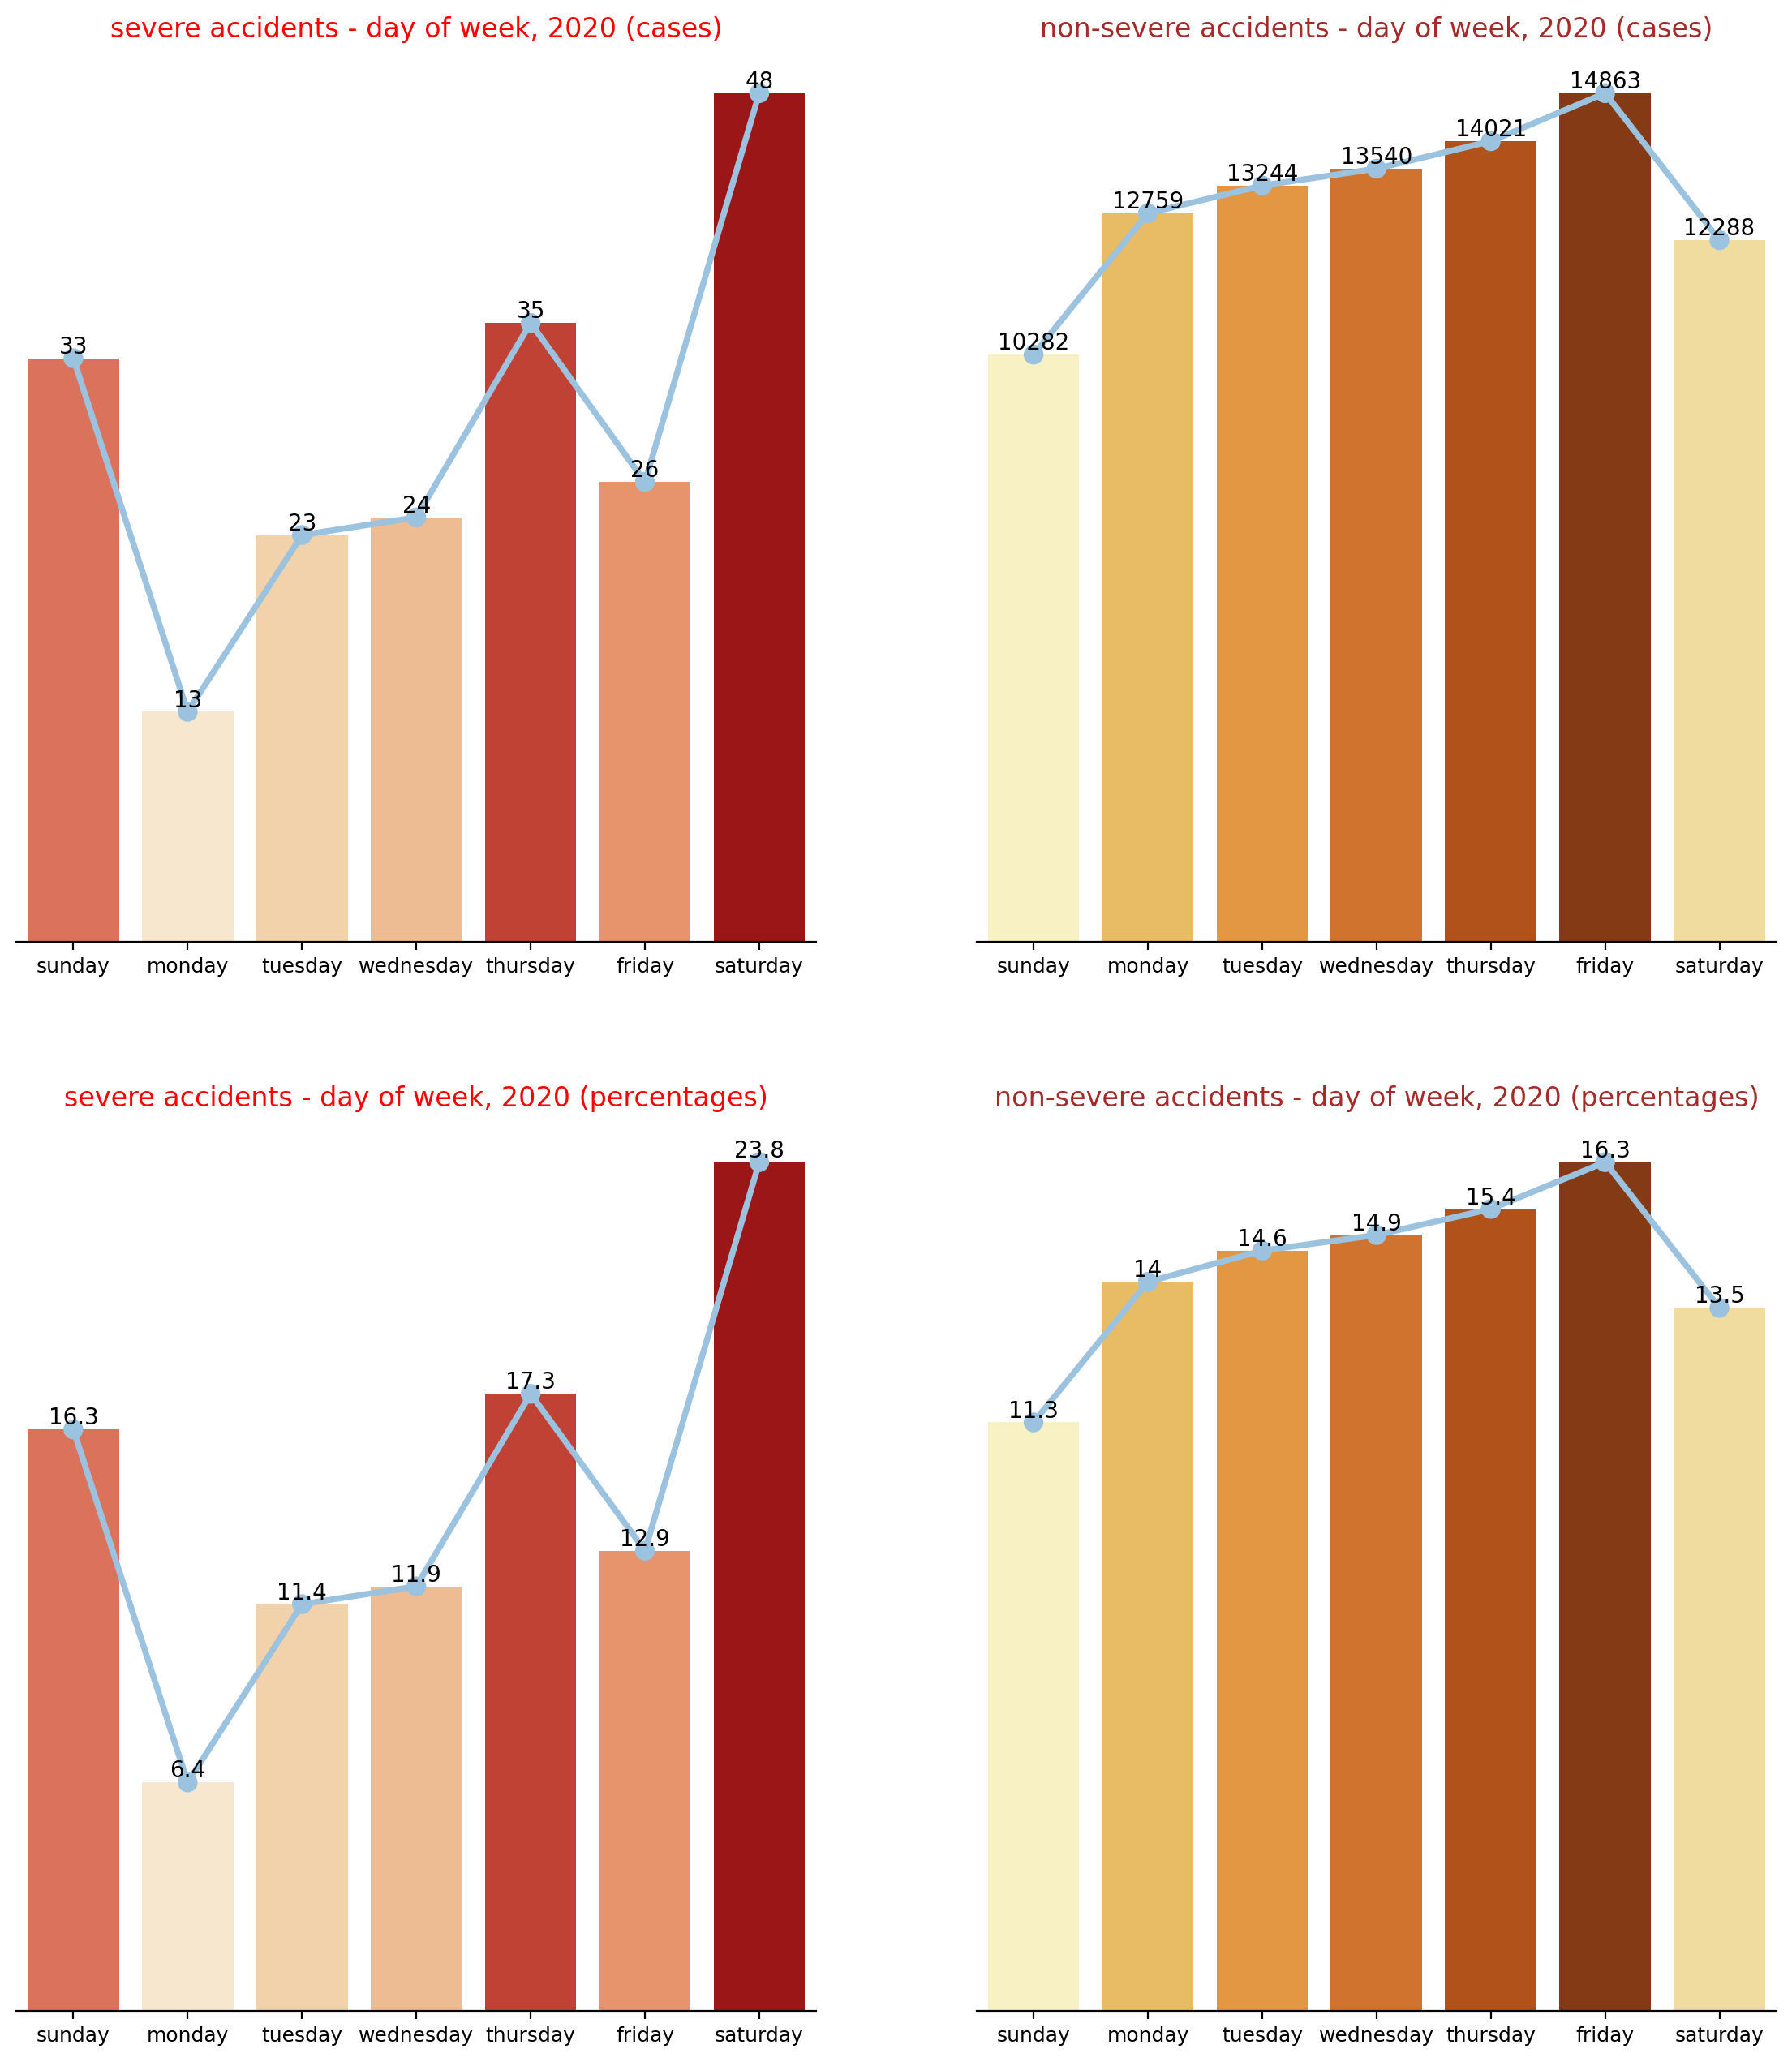

In [33]:
a,b,c,d = create_ranges('day_of_week',range(1,8)) 
labels = ["sunday","monday","tuesday","wednesday","thursday","friday","saturday"]
create_2_2("day of week",  x_tick_labels = labels)

* we see a difference in the distributions:
    * severe accidents are uniform distribution on sunday-thursday increasing on friday and a litllte decrease on saturday.
    * non severe accidents gradually increasing from monday to the pick on friday, decreasing on saturday, and more on sunday.
    * i think that the reason to the increasing in severe accidents on friday is the number of passengers on the vehicle - it is reasonable that people are going to travel or hang out on weekends with their families or friends.  

In [34]:
def plot_4_rows(name):
    fig, ax = plt.subplots(4,1,figsize=(14,16),dpi=250)
    for k,j in enumerate([a,b,c,d]):
        r = k

        if r%2==0:        
            pal = "OrRd"
            t = "severe"
            t_color= "red"
        else:
            pal= "YlOrBr"
            t_color="brown"
            t="non-severe"
        if r<2:
            per="(cases)"
        else:
            per="(percentages)"
        pal = sns.color_palette(pal, len(j))
        rank = j.argsort().argsort()
        ax[r].set_title(f"{t} accidents - {name} {per}, 2020",color=t_color)
        sns.barplot(x=j.index, y=j.values,ax=ax[r], palette=np.array(pal)[rank])
        sns.pointplot(x=j.index, y=j.values, marker='o',ax=ax[r],color="#9bc2de")
        ax[r].set_yticks([]);
        for bars in ax[r].containers:
            ax[r].bar_label(bars,size=10)
        ax[r].set_xlabel("")
        ax[r].set_ylabel("");

    sns.despine(left=True)

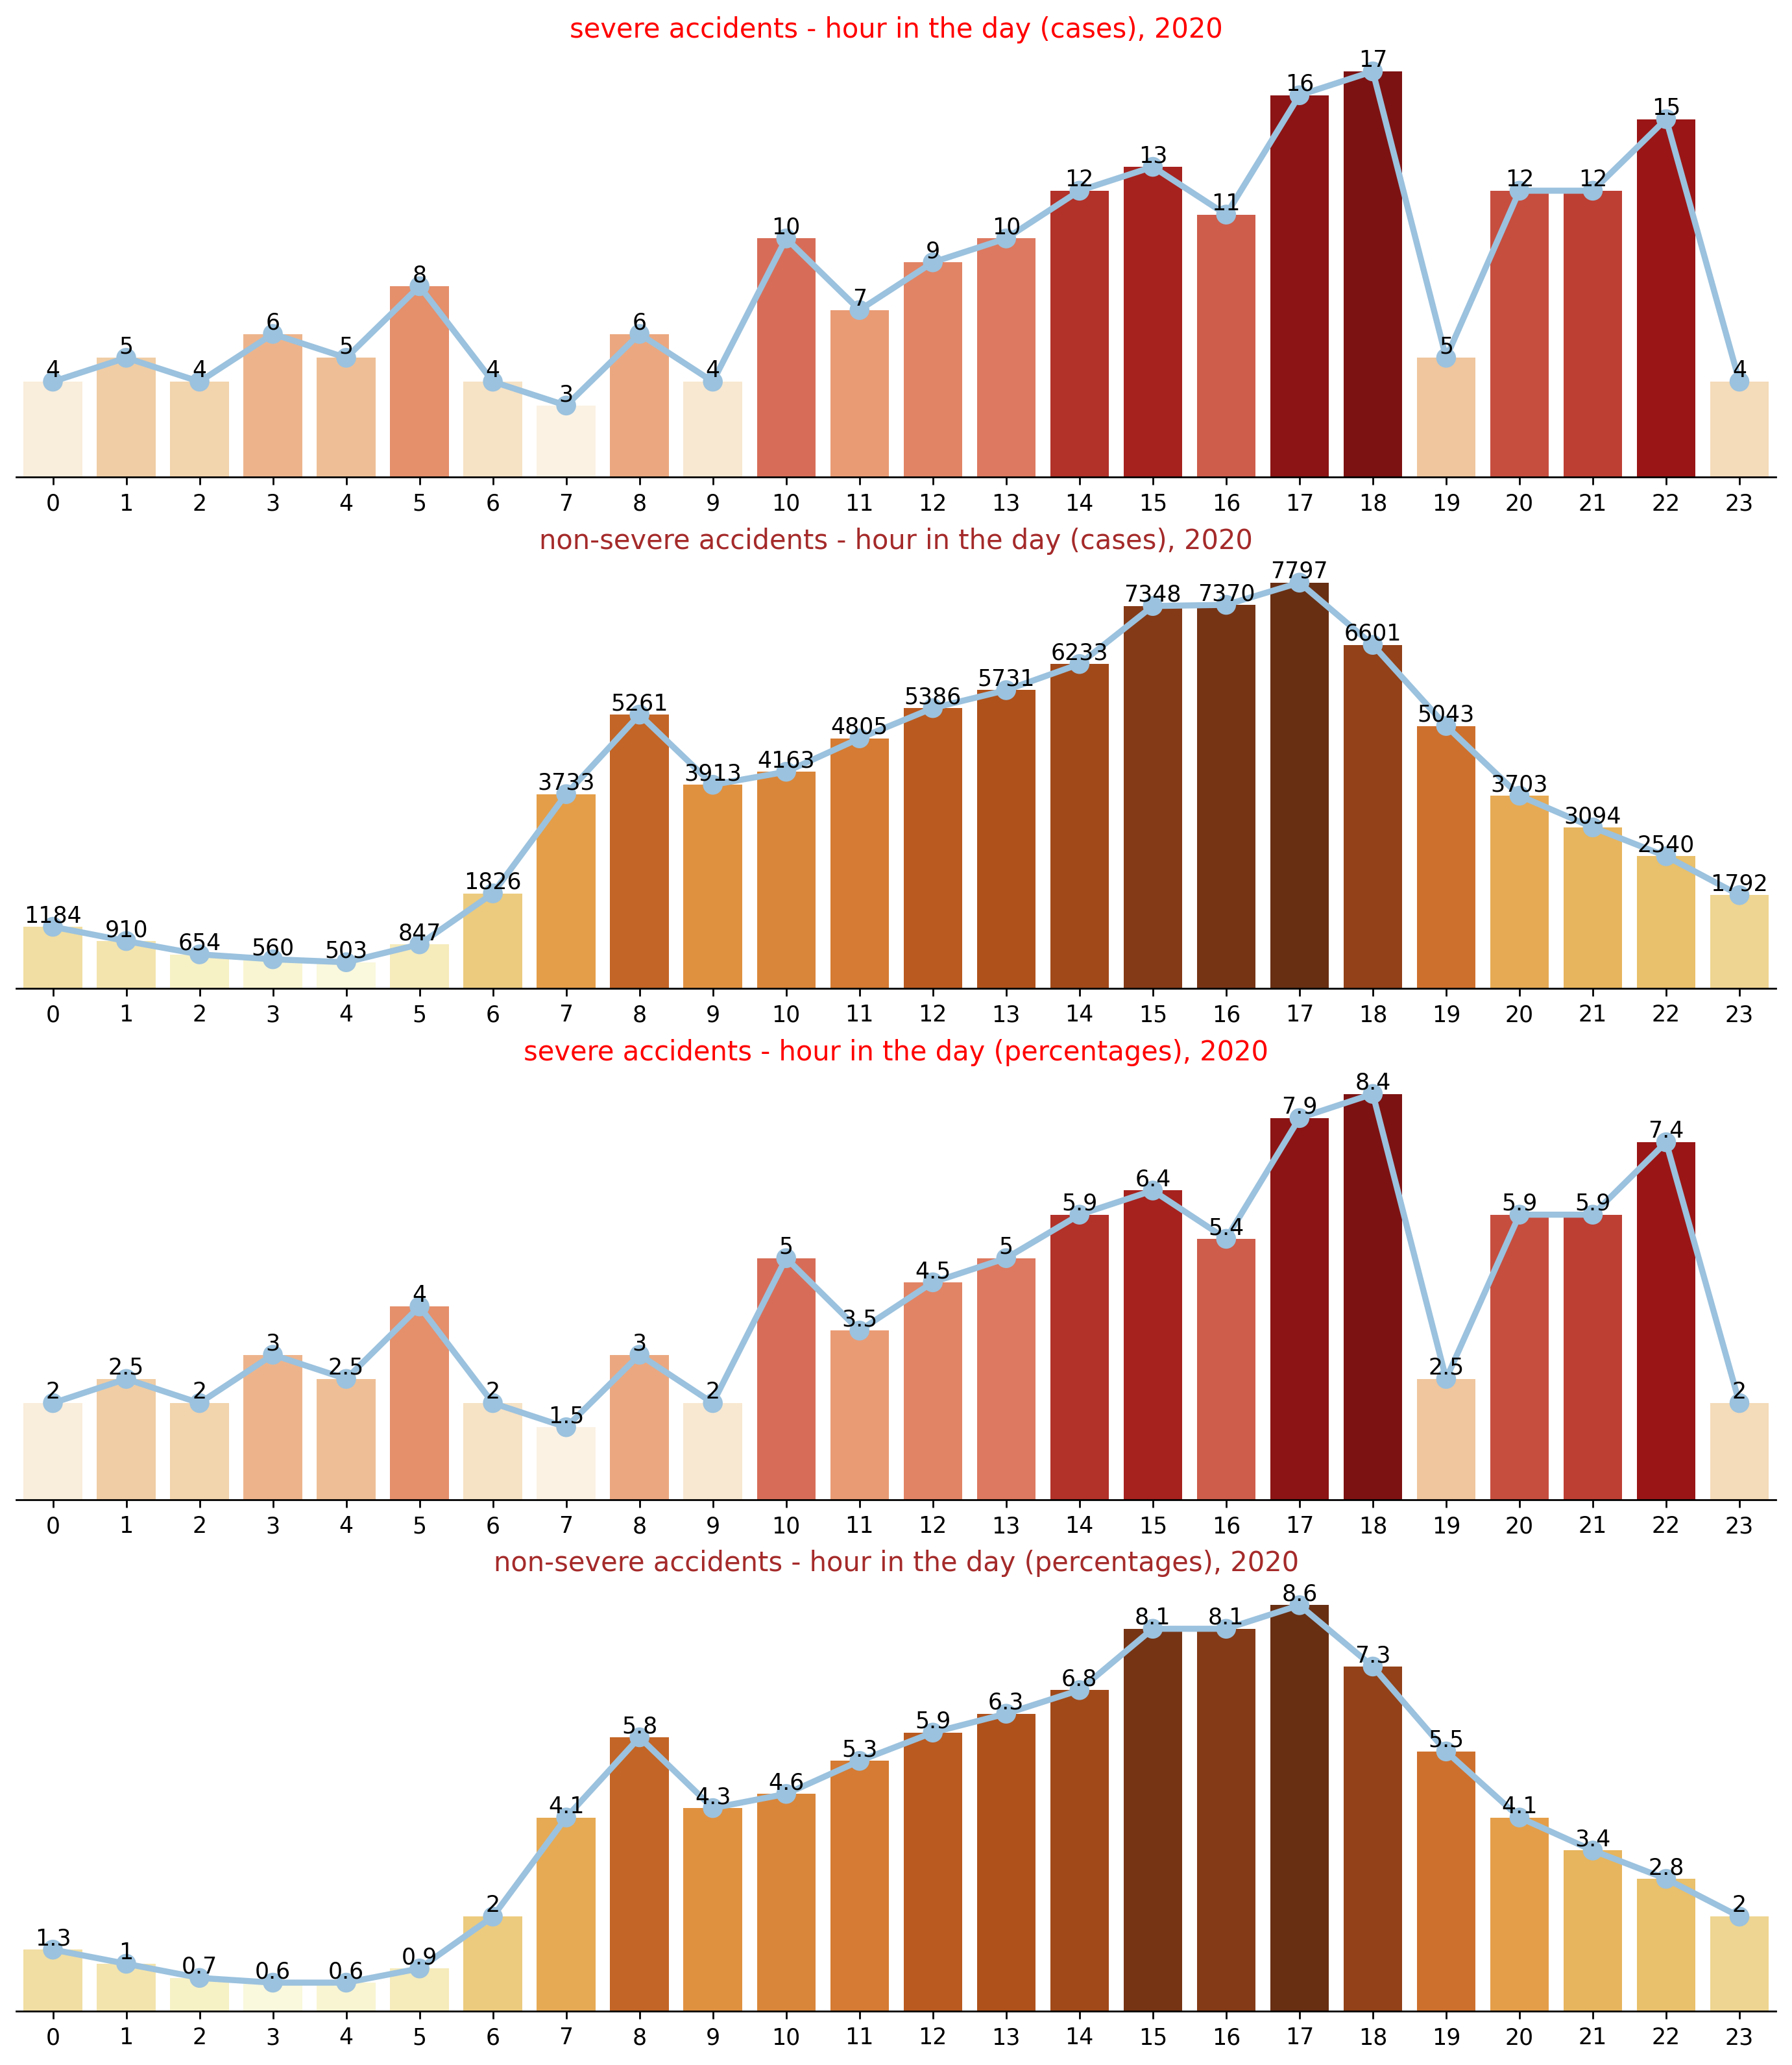

In [35]:
a,b,c,d = create_ranges('hour',range(0,24))
plot_4_rows(name="hour in the day")

* the distributions are pretty simmilar.
    * we see a pick in the morning on 8 o'clock, the hour when the most people are going to work.
    * the most dengerous hour range in the day are the afternoon: 14-18. 
    * 16-17 oclock are the most dangerous hours.

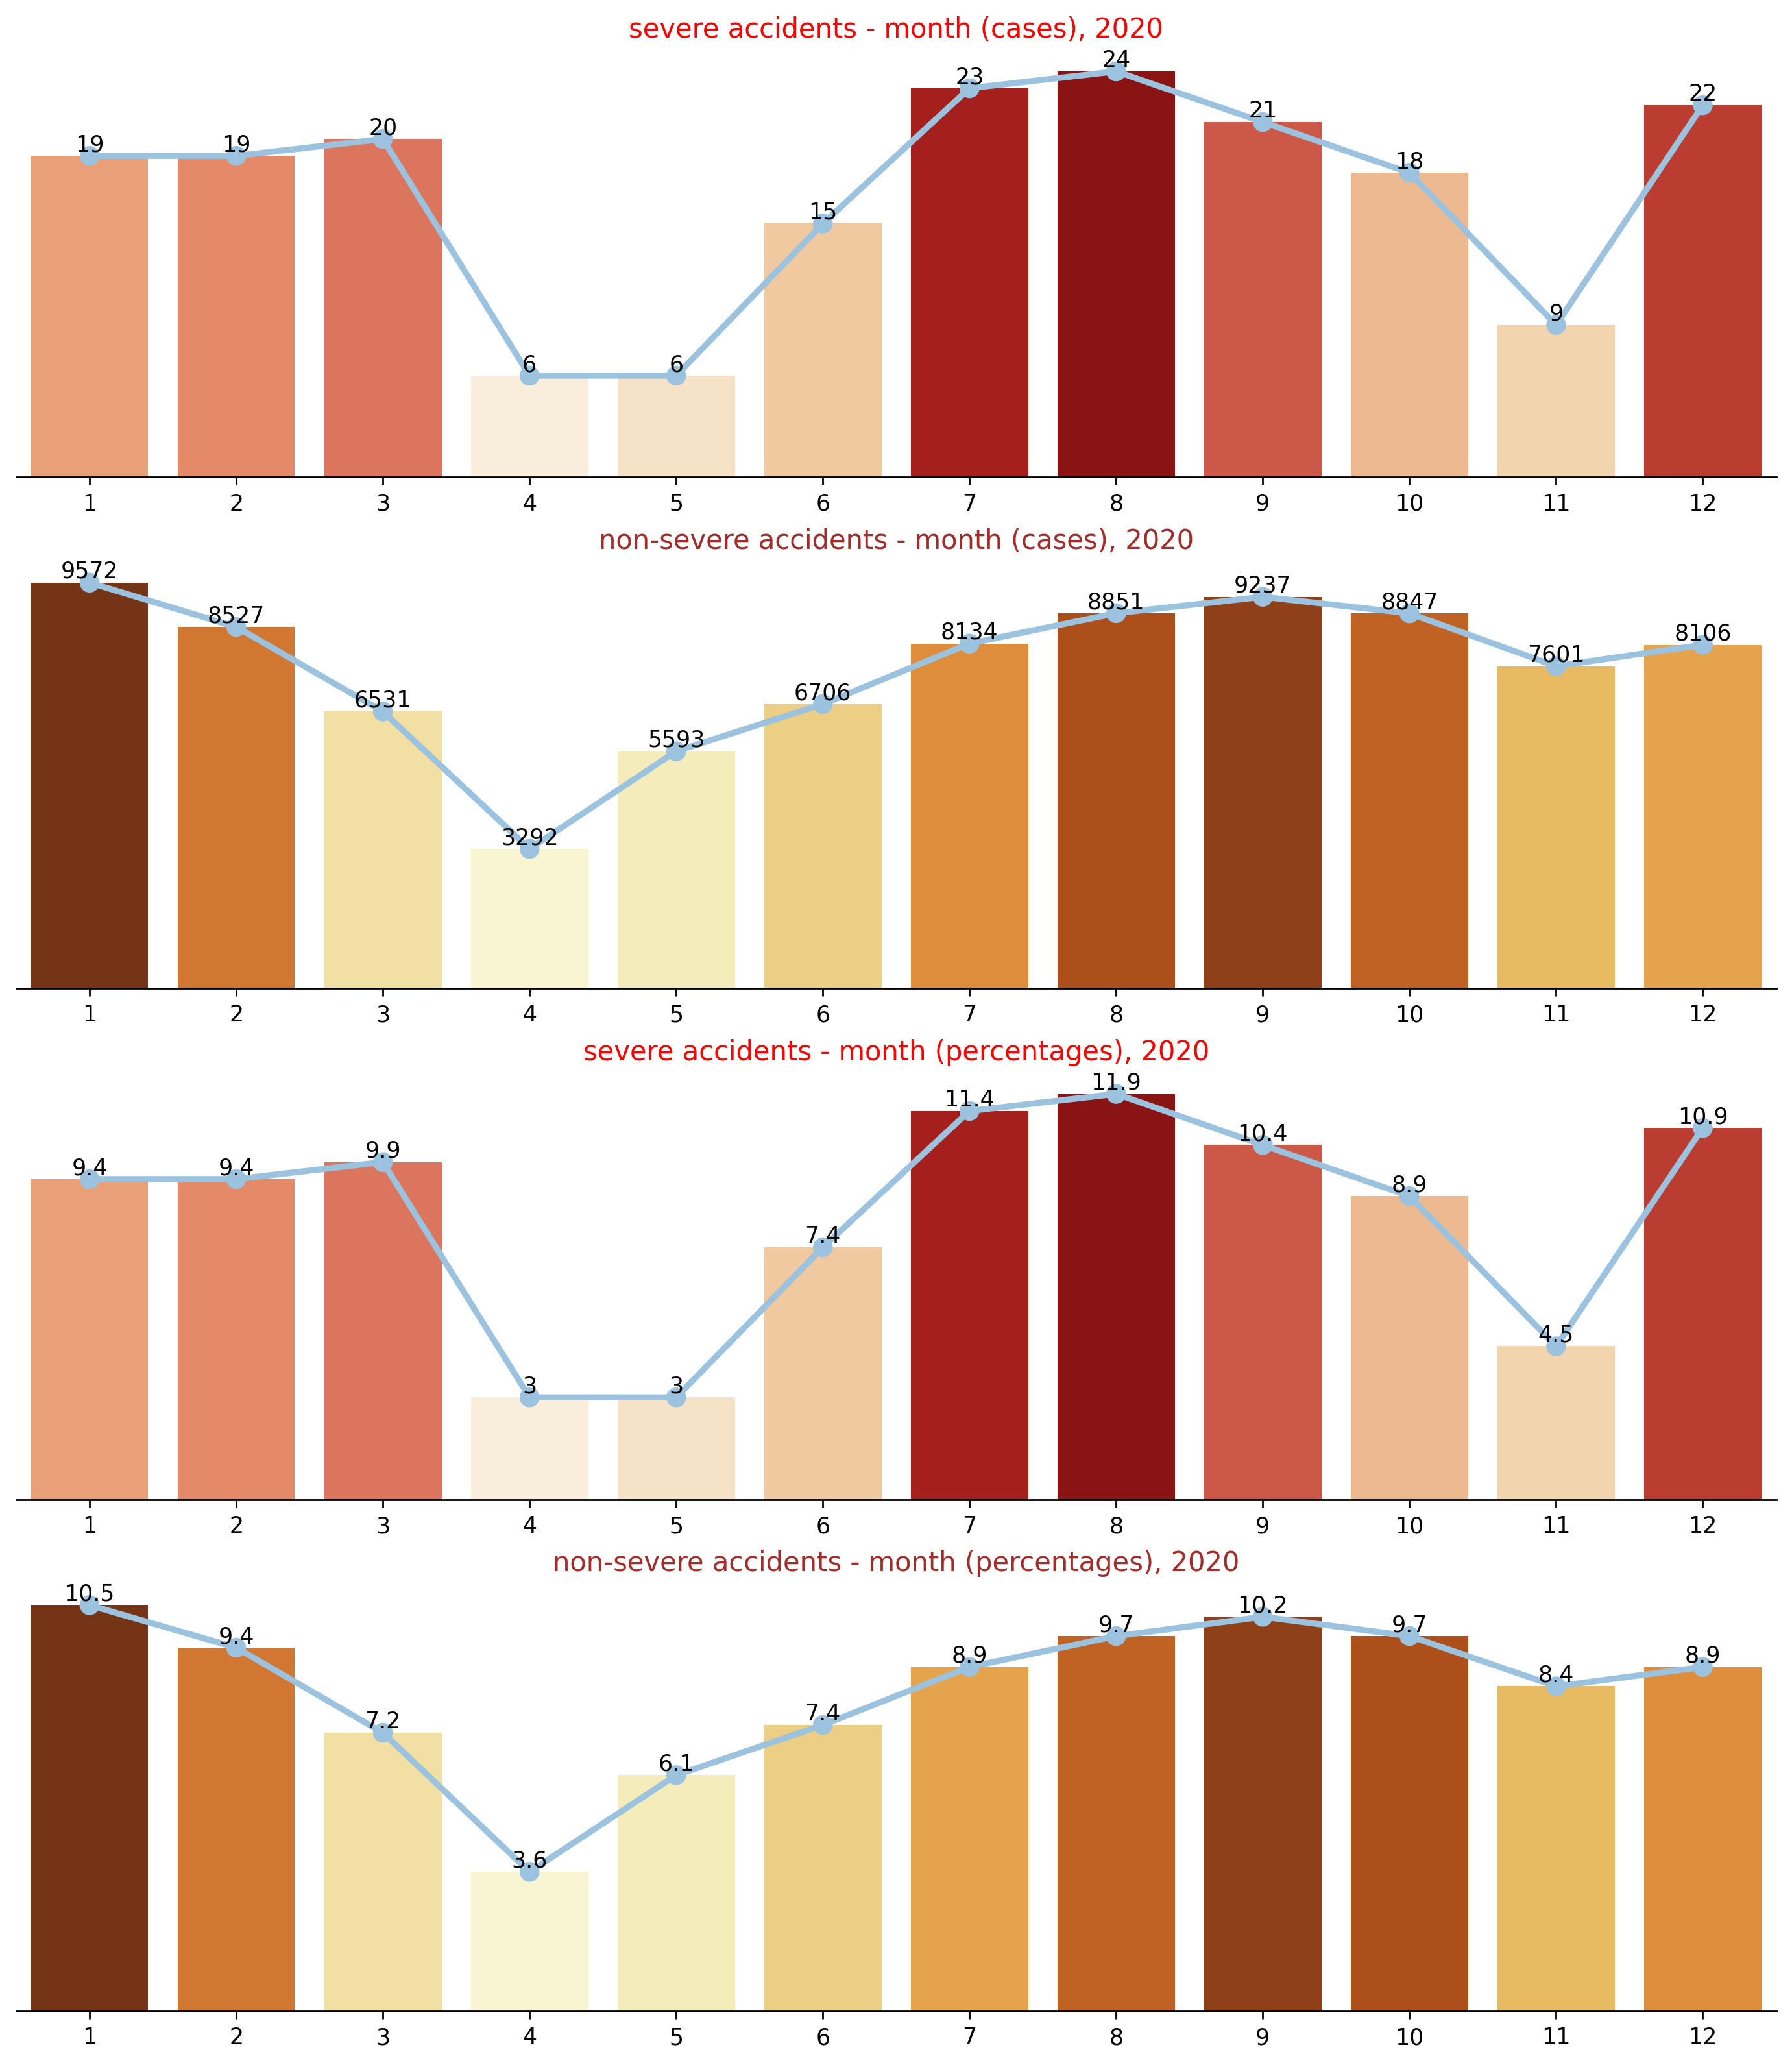

In [36]:
a,b,c,d = create_ranges('month',range(1,13))
plot_4_rows(name="month")

* here too the distributions are pretty similar, there are small differences.
    * the most dangerous months are 1,2 8,9.
    * we see a clearly a seperation of two periods in the year: one is the months 4-11, second is 11 to 4.
    * the most secure month is april, what happend there ??? 
    * because we deal with the year 2020, it probably because the COVID-19. <a href="https://wjes.biomedcentral.com/articles/10.1186/s13017-021-00395-8">in april 2020 there was a significant decline in accidents in a lot of countries.</a>

### lets check the weather conditions:

In [37]:
def col_data(col_name):
    display(lookup_search(col_name))
    print("column values:")
    display(pd.DataFrame(accidents[col_name].value_counts()).transpose())

def filter_dfs(col_name,bad_values,col_range):
    x = severe_df[~severe_df[col_name].isin(bad_values)]
    y = non_severe_df[~non_severe_df[col_name].isin(bad_values)]
    a,b,c,d=create_ranges(col_name,col_range,x,y)
    return a,b,c,d

In [38]:
col_data('weather_conditions')

table          field name code/format                         label  \
86  Accident  weather_conditions           1            Fine no high winds   
87  Accident  weather_conditions           2         Raining no high winds   
88  Accident  weather_conditions           3         Snowing no high winds   
89  Accident  weather_conditions           4             Fine + high winds   
90  Accident  weather_conditions           5          Raining + high winds   
91  Accident  weather_conditions           6          Snowing + high winds   
92  Accident  weather_conditions           7                   Fog or mist   
93  Accident  weather_conditions           8                         Other   
94  Accident  weather_conditions           9                       Unknown   
95  Accident  weather_conditions          -1  Data missing or out of range   

   note  
86  NaN  
87  NaN  
88  NaN  
89  NaN  
90  NaN  
91  NaN  
92  NaN  
93  NaN  
94  NaN  
95  NaN

None

column values:


1      2     8     9     5     4    7    3   6  -1
weather_conditions  70729  11583  2629  2423  1665  1401  510  185  73   1

* we see here that 8,9,-1 are values we shouldn't refer to.  
* 7 is different too from 1-6 which are labeled by order.

In [39]:
a,b,c,d = filter_dfs('weather_conditions',[8,9,-1],range(1,8))

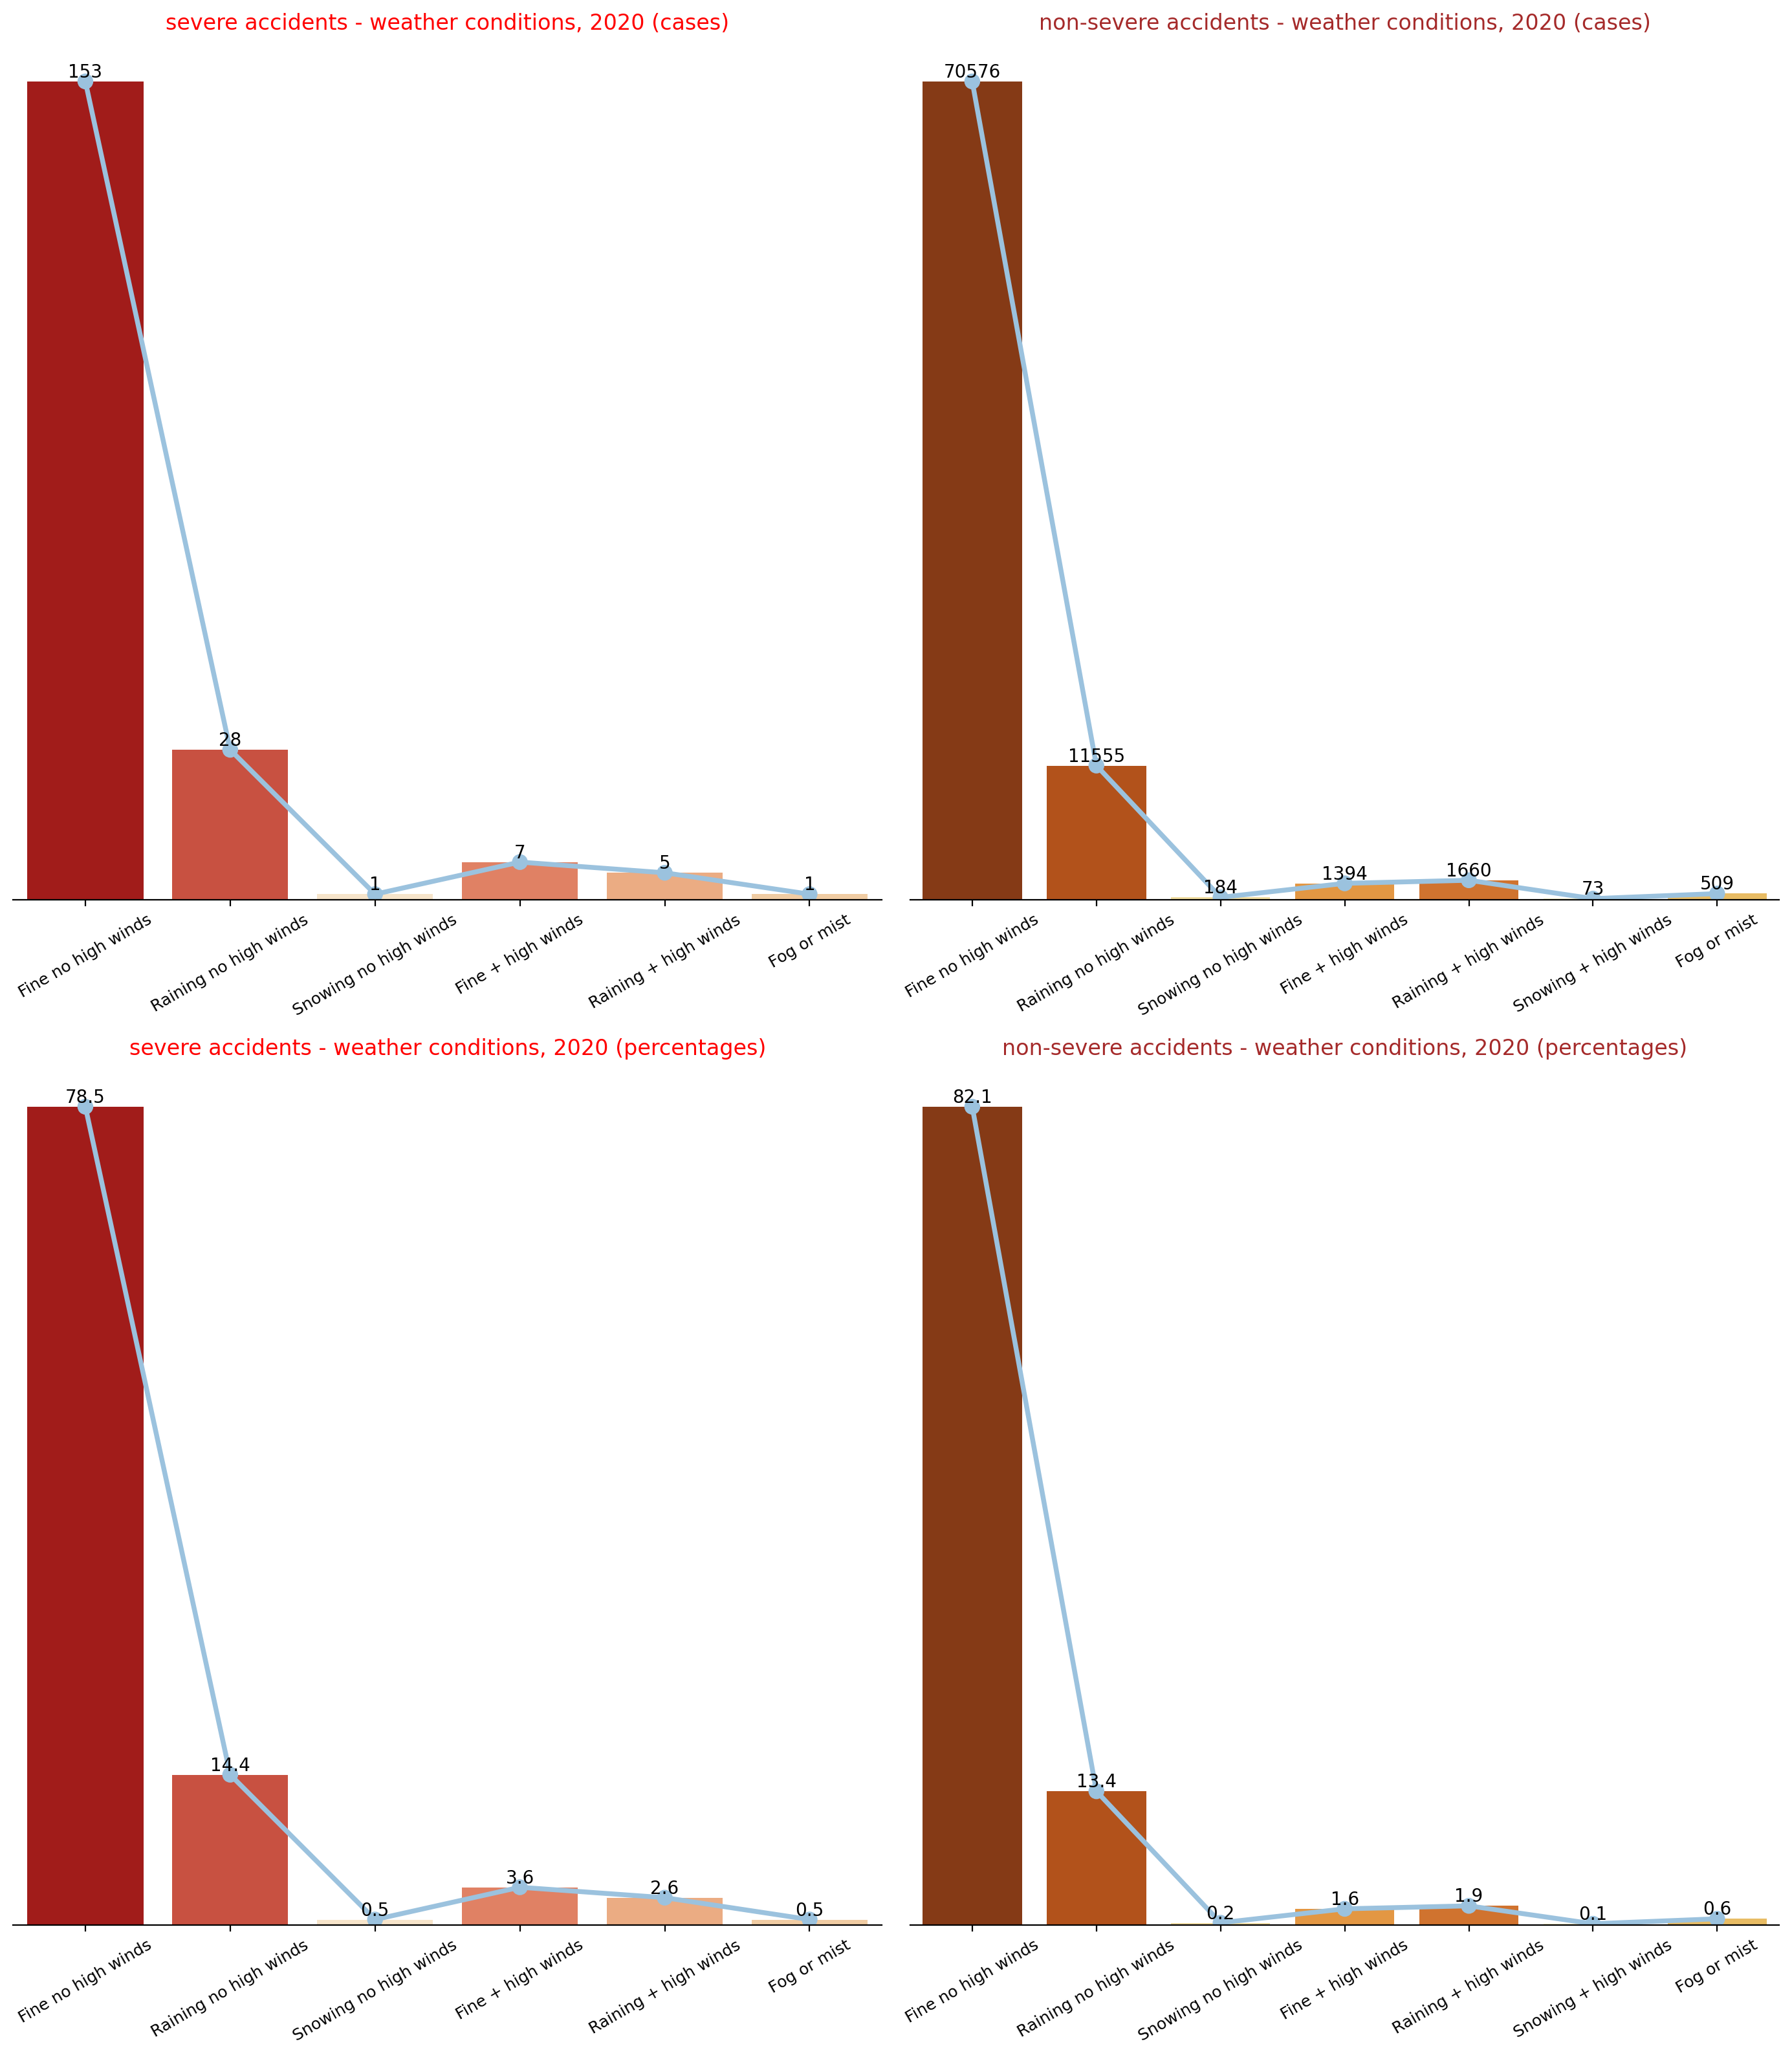

In [41]:
# create_2_2("weather conditions", 
#            x_tick_labels=['fine','rain','snow','fine winds','rain winds','snow winds','fog'],
#           rotate=30)
create_2_2("weather conditions", 
           use_lookup=True,
          rotate=30)
use_lookup=True

* again - the distributions are very simmilar. the most of the accidents occur on fine weather! above 80%
* it's reinforce our assumption that the decline in accidents in april was because the COVID19 and not because of weather!

### lets check speed limit

In [42]:
col_data('speed_limit')

table   field name code/format                         label  \
36  Accident  speed_limit         NaN                           NaN   
37  Accident  speed_limit          -1  Data missing or out of range   
38  Accident  speed_limit          99       unknown (self reported)   

                                                                    note  
36  20,30,40,50,60,70 are the only valid speed limits on public highways  
37                                                                   NaN  
38                                                                   NaN

None

column values:


30     60     20    40    70    50  -1 
speed_limit  52260  11408  11183  7867  4687  3782   12

In [43]:
a,b,c,d =  filter_dfs('speed_limit',[-1],range(20,80,10))

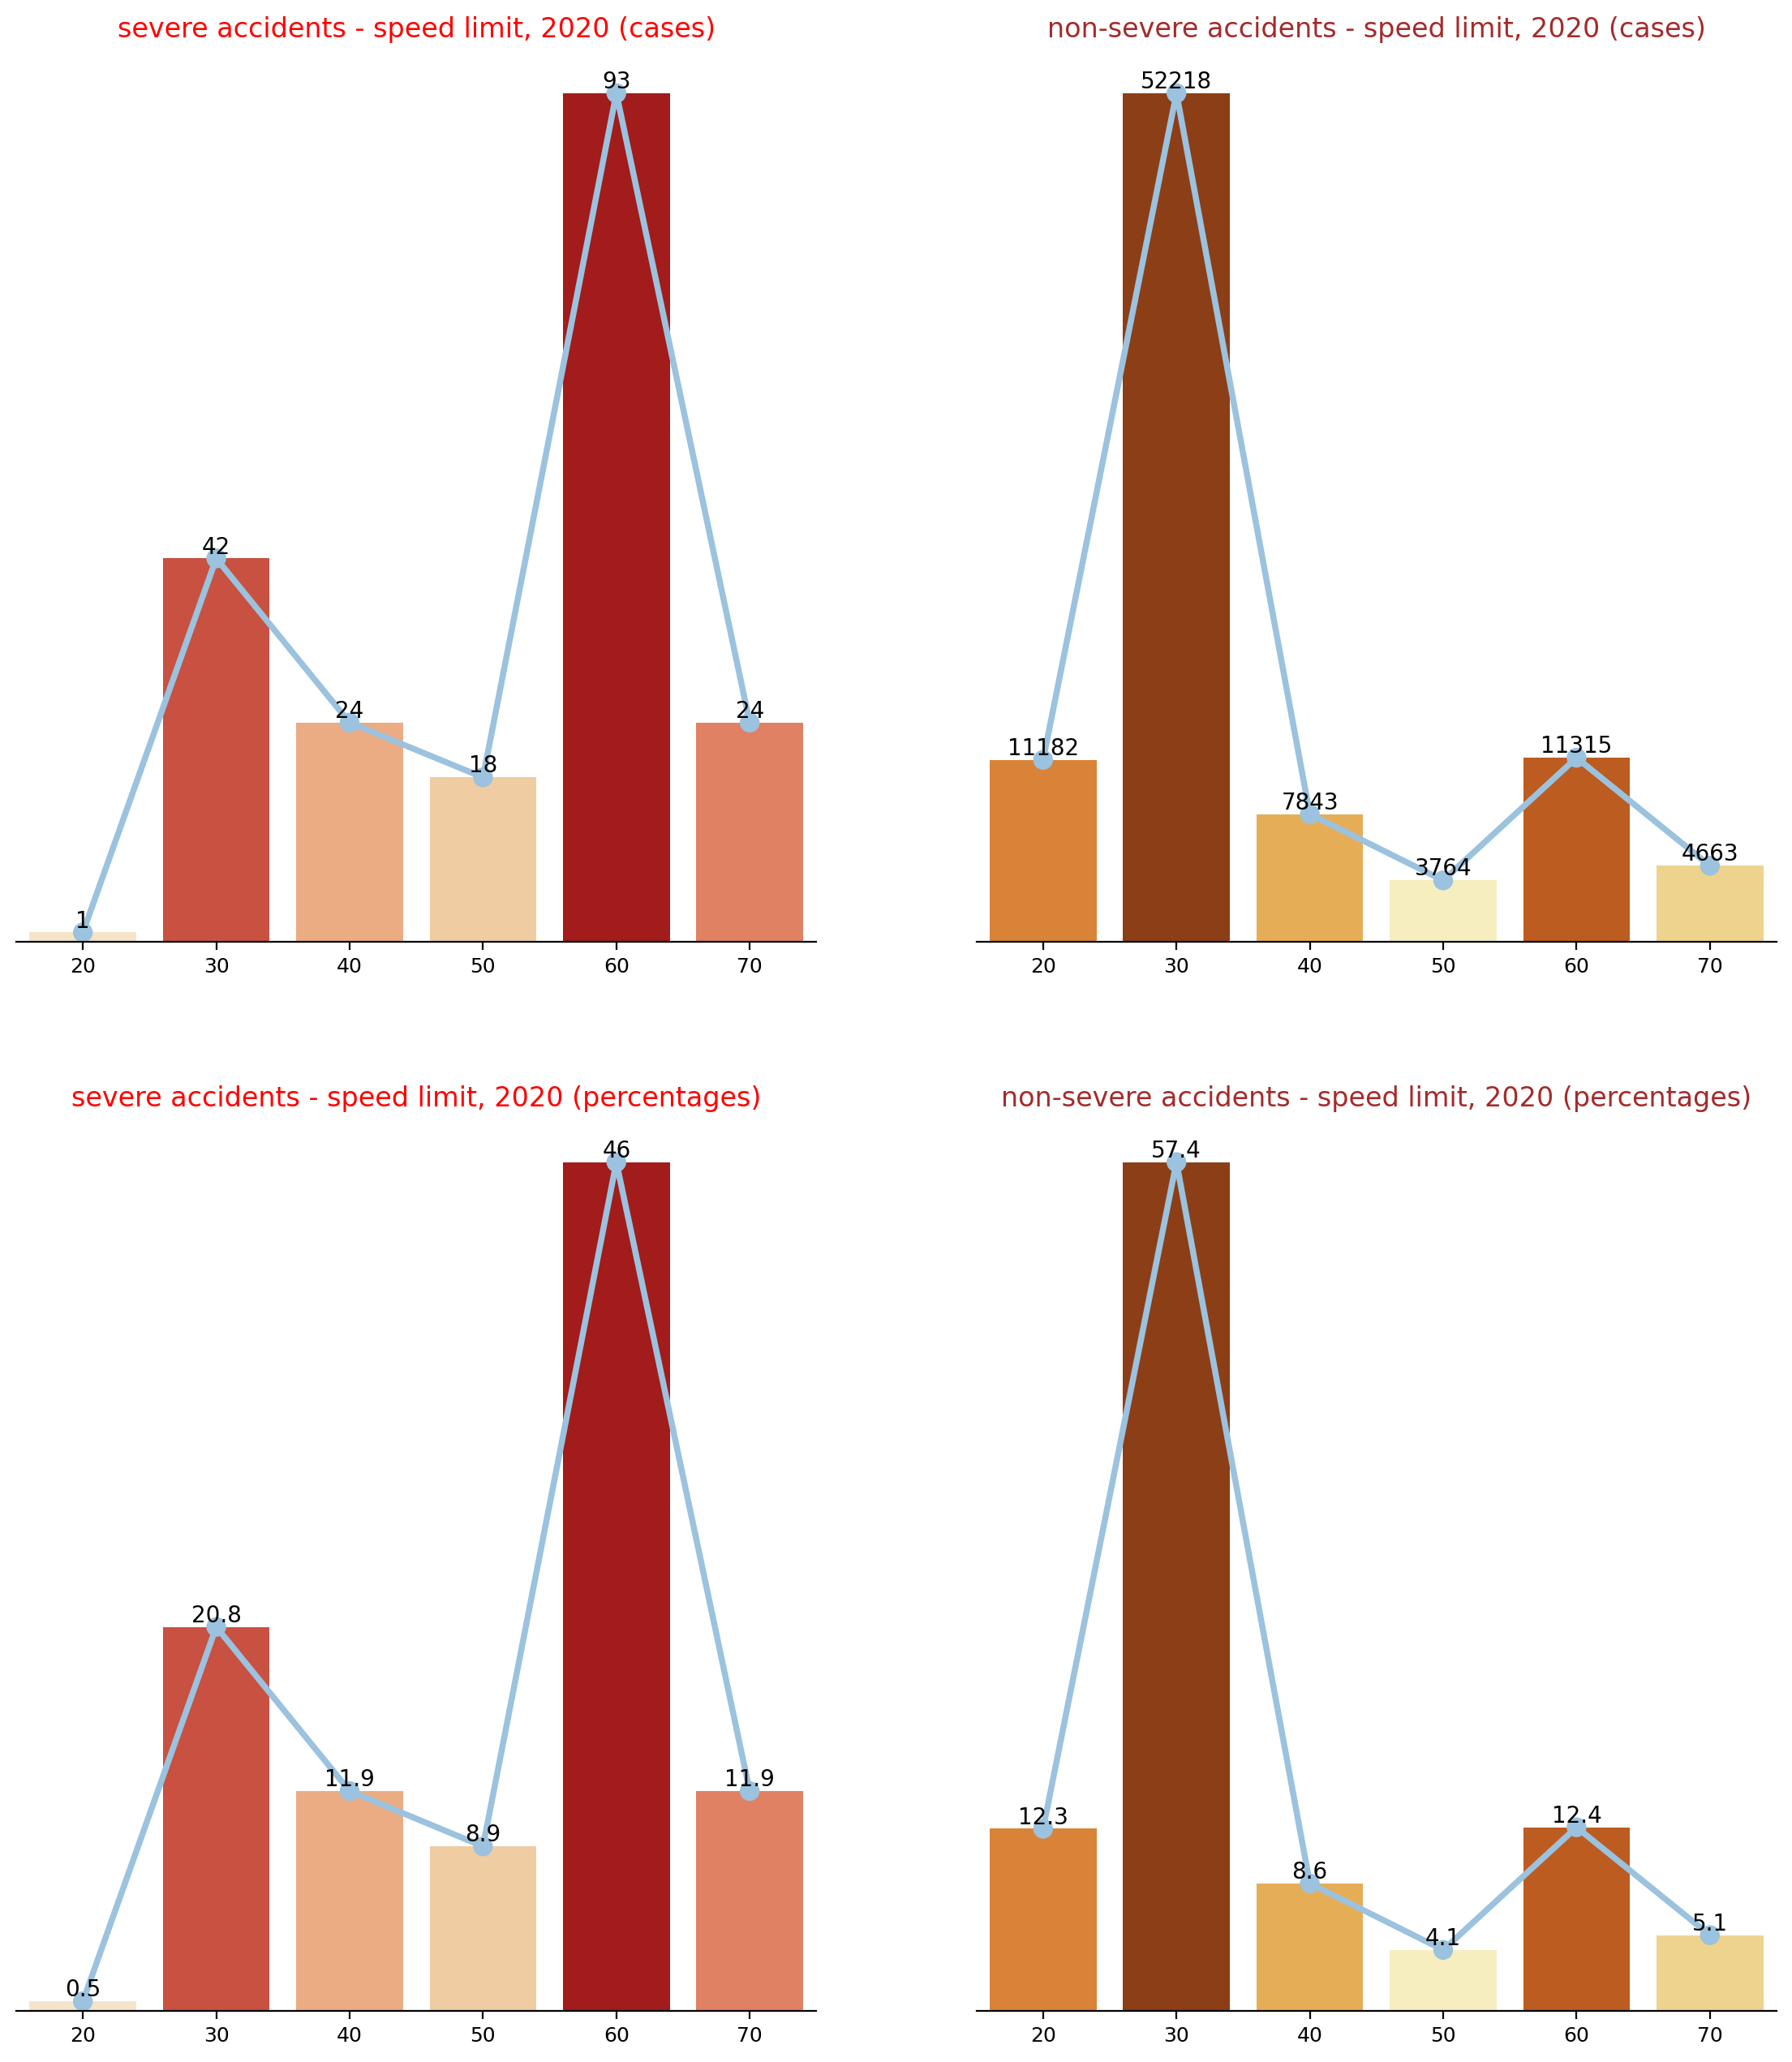

In [44]:
create_2_2("speed limit",
           x_tick_labels=['20','30','40','50','60','70'])

* we could see here important differences:
    * we have less severe accidents (percentages) at 20 and 30 miles per hour(__54.7%__) than non severe (__70.1%__).
    * we have more severe accidents (percentages) at 40,50,60,70 (__45.3%__) than non severe (__29.9%__)
    * __so the distribution of severe is different than the non severe: relatively there are more severe accidents in the higher limits, than in the non severe distribution.__
    * __anyway, it is important to say: most of the accidents are at 20 and 30 MPH, even the severe one's!__
    

### urban or rural area

In [45]:
col_data('urban_or_rural_area')

table           field name code/format                         label  \
125  Accident  urban_or_rural_area           1                         Urban   
126  Accident  urban_or_rural_area           2                         Rural   
127  Accident  urban_or_rural_area           3                   Unallocated   
128  Accident  urban_or_rural_area          -1  Data missing or out of range   

                         note  
125  field introduced in 1994  
126  field introduced in 1994  
127  field introduced in 1994  
128  field introduced in 1994

None

column values:


1      2   3
urban_or_rural_area  61737  29448  14

In [46]:
a,b,c,d= filter_dfs('urban_or_rural_area',[3,-1],range(1,3))

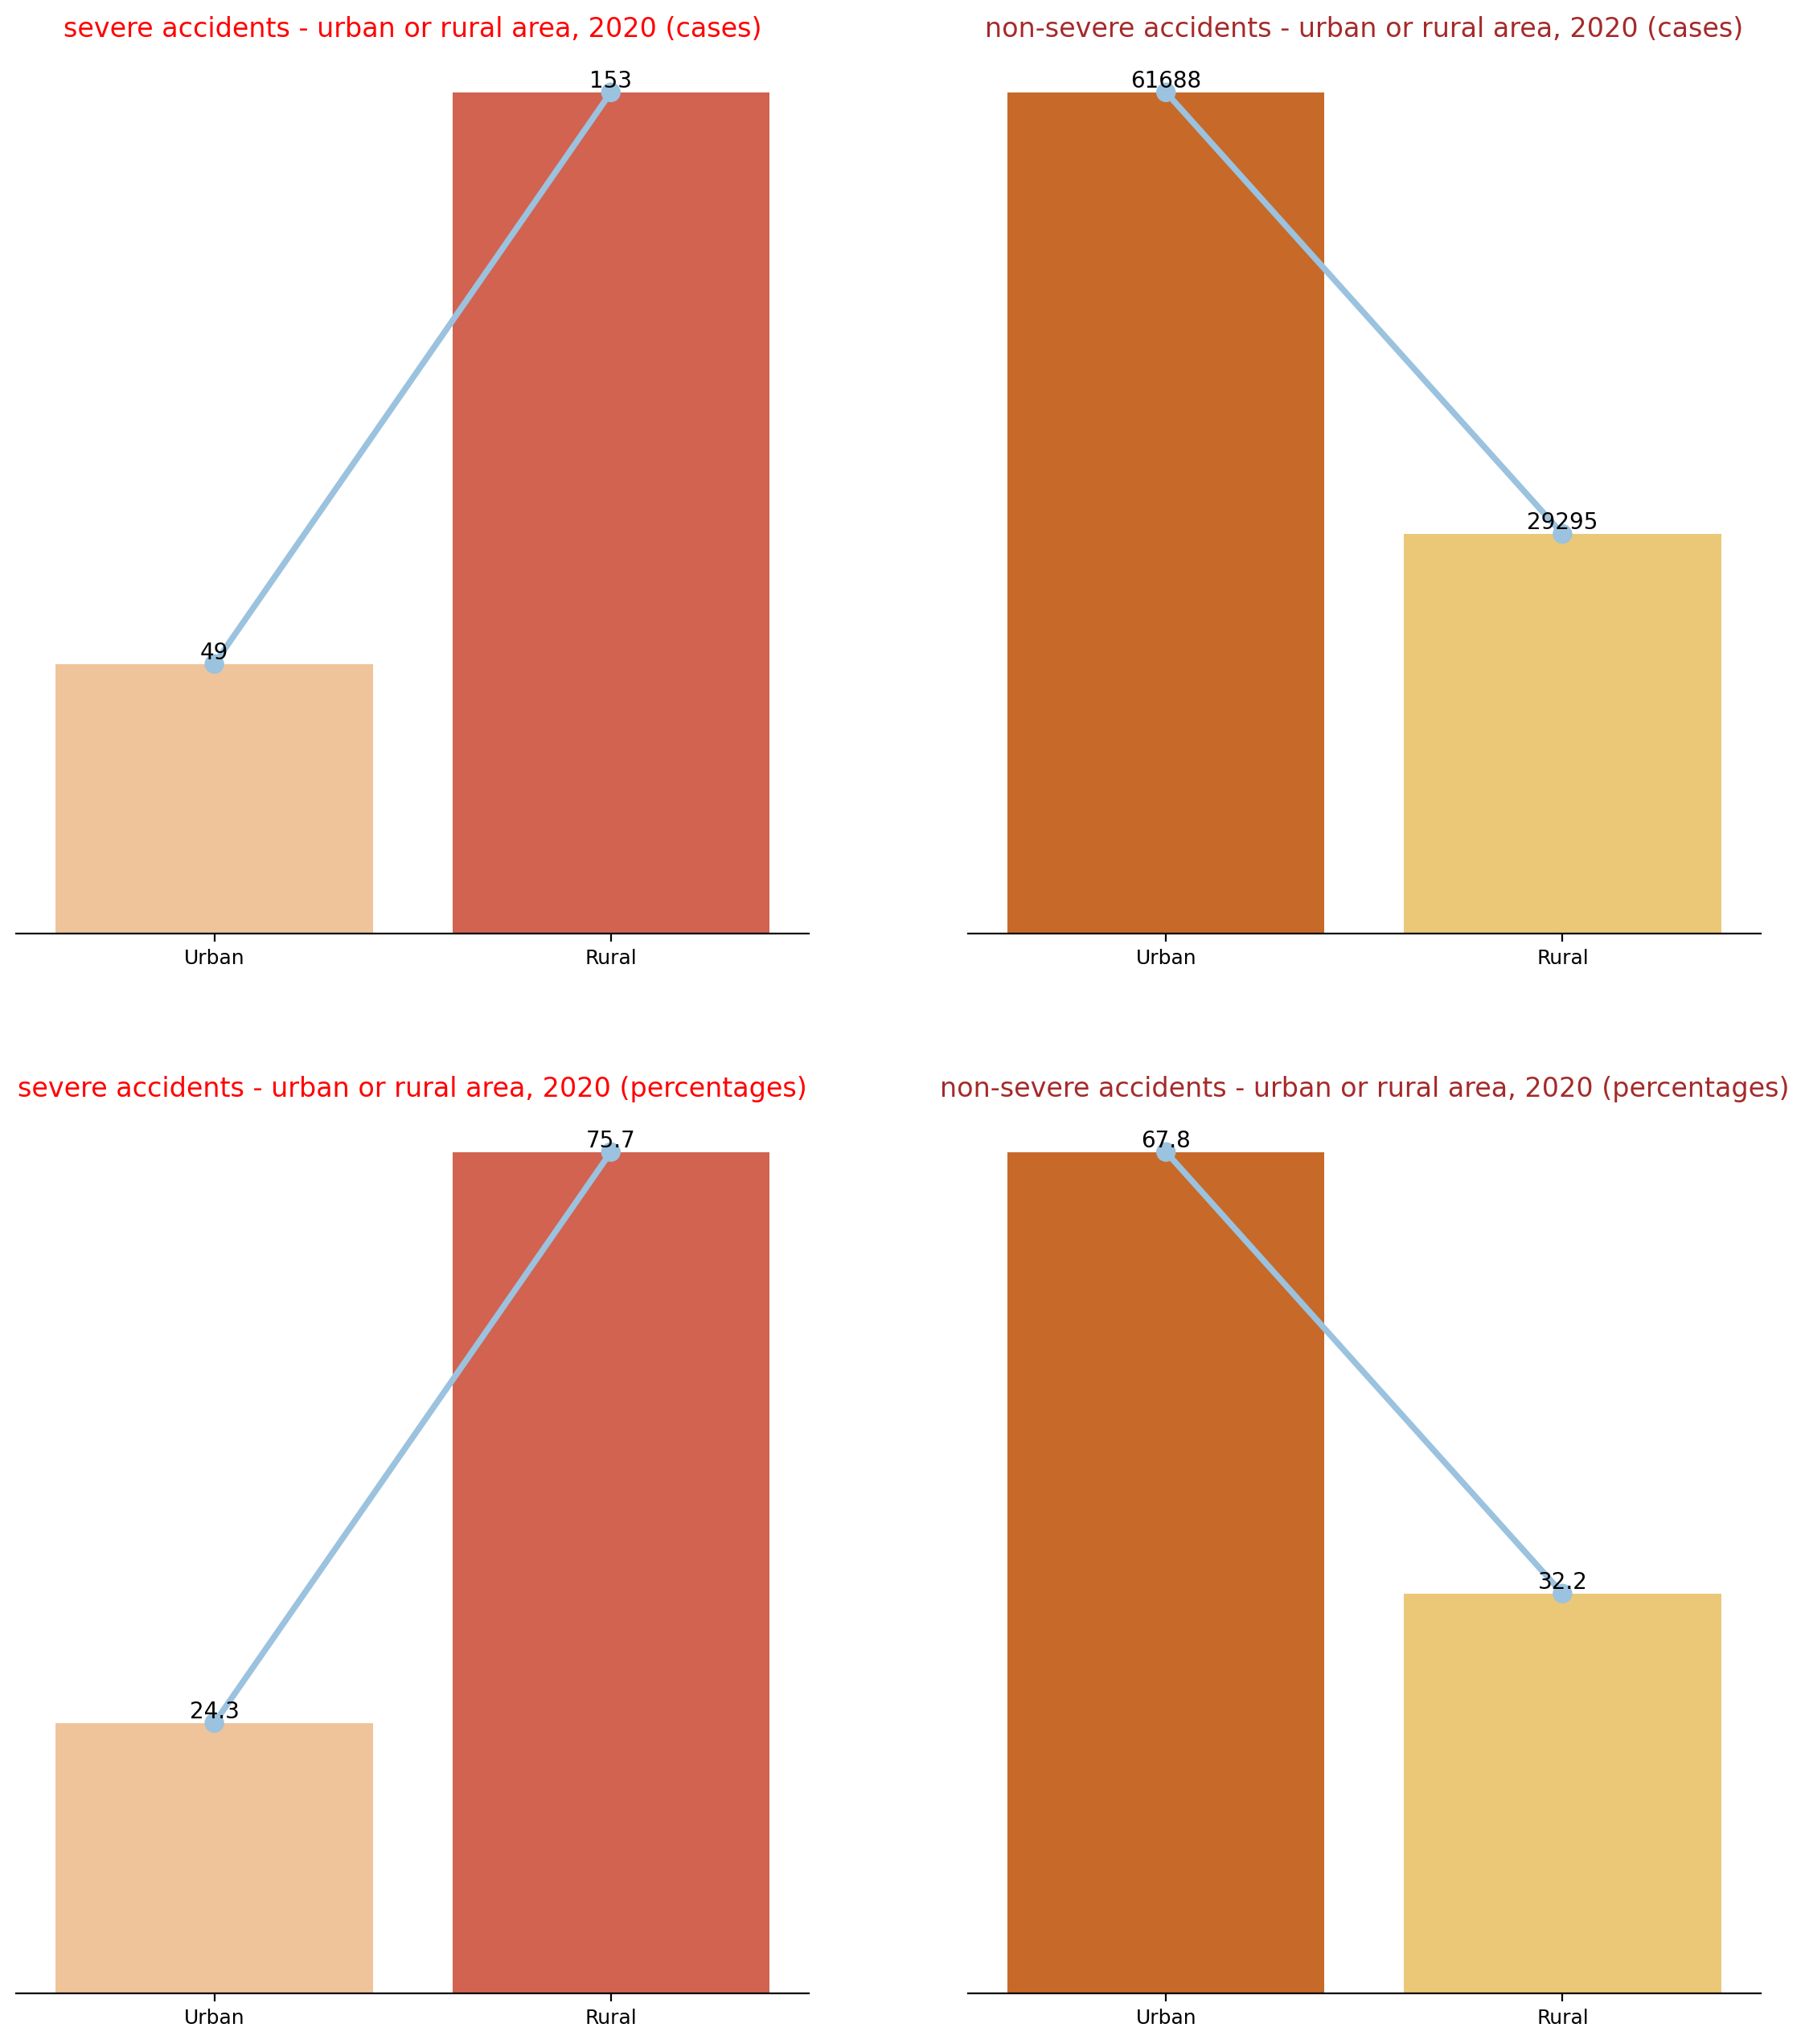

In [47]:
create_2_2("urban or rural area",
           x_tick_labels=["Urban","Rural"])

* it's very simmilar to what we got before about the "speed limit" column, in the severe distribution there are more accidents in the rural area (42% to 32%), even in both distributions there are more accidents in the urban area (58%, 68%).

### road surface conditions

In [48]:
col_data('road_surface_conditions')

table               field name code/format  \
96   Accident  road_surface_conditions           1   
97   Accident  road_surface_conditions           2   
98   Accident  road_surface_conditions           3   
99   Accident  road_surface_conditions           4   
100  Accident  road_surface_conditions           5   
101  Accident  road_surface_conditions           6   
102  Accident  road_surface_conditions           7   
103  Accident  road_surface_conditions          -1   
104  Accident  road_surface_conditions           9   

                            label note  
96                            Dry  NaN  
97                    Wet or damp  NaN  
98                           Snow  NaN  
99                   Frost or ice  NaN  
100          Flood over 3cm. deep  NaN  
101                 Oil or diesel  NaN  
102                           Mud  NaN  
103  Data missing or out of range  NaN  
104       unknown (self reported)  NaN

None

column values:


1      2    9    4   -1    5    3
road_surface_conditions  62698  26240  847  764  316  184  150

* we dont see 6 and 7 in the table. so the range is 1 to 5.

In [49]:
a,b,c,d= filter_dfs('road_surface_conditions',[9,-1],range(1,6))

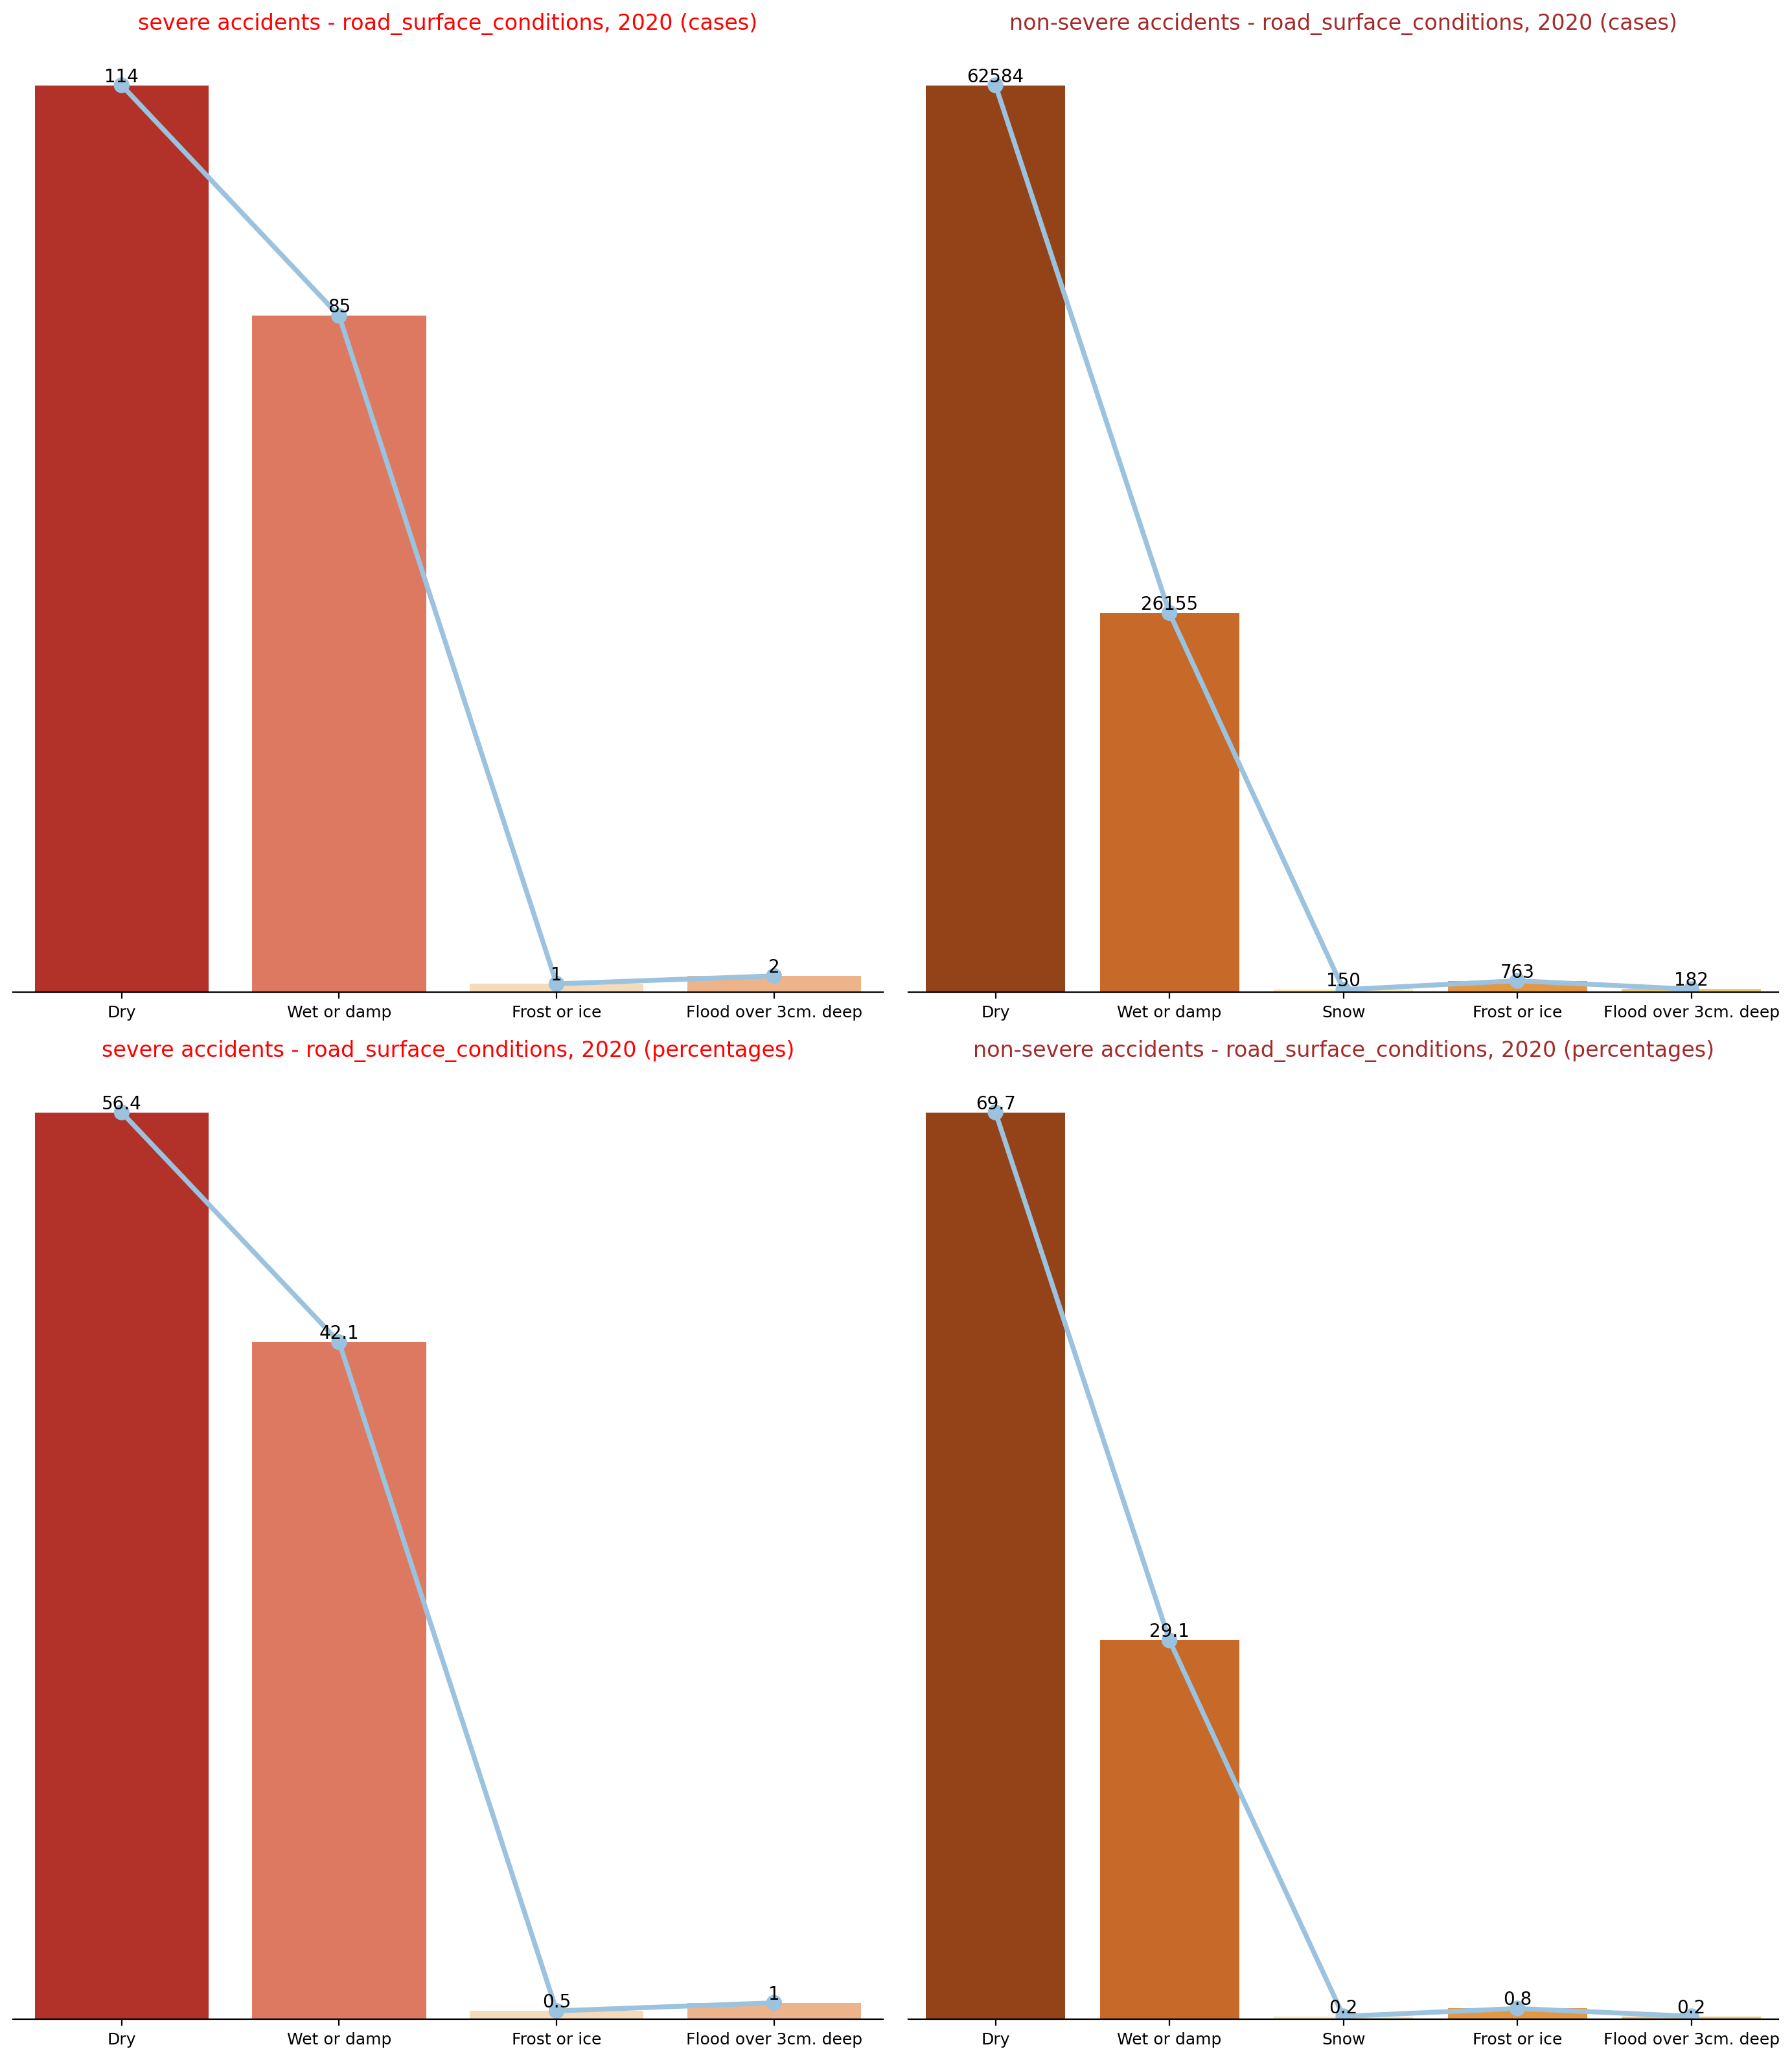

In [51]:
create_2_2("road_surface_conditions",
          use_lookup=True)

* the most accidents absolutly are in dry and wet conditions , and we dont see a big difference between the tables.

### carriageway hazards

In [52]:
col_data('carriageway_hazards')

table           field name code/format  \
115  Accident  carriageway_hazards           0   
116  Accident  carriageway_hazards           1   
117  Accident  carriageway_hazards           2   
118  Accident  carriageway_hazards           3   
119  Accident  carriageway_hazards           4   
120  Accident  carriageway_hazards           5   
121  Accident  carriageway_hazards           6   
122  Accident  carriageway_hazards           7   
123  Accident  carriageway_hazards          -1   
124  Accident  carriageway_hazards           9   

                                               label note  
115                                             None  NaN  
116                             Vehicle load on road  NaN  
117                             Other object on road  NaN  
118                                Previous accident  NaN  
119                                      Dog on road  NaN  
120                             Other animal on road  NaN  
121          Pedestrian in carriageway - not injured  NaN  
122  Any animal in carriageway (except ridden horse)  NaN  
123                     Data missing or out of range  NaN  
124                          unknown (self reported)  NaN

None

column values:


0     9     2    7    1   -1    6    3
carriageway_hazards  87881  1191  1079  314  220  208  155  151

* 4 and 5 are not in the table

In [53]:
a,b,c,d= filter_dfs('carriageway_hazards',[9,-1],[0,1,2,3,6,7])

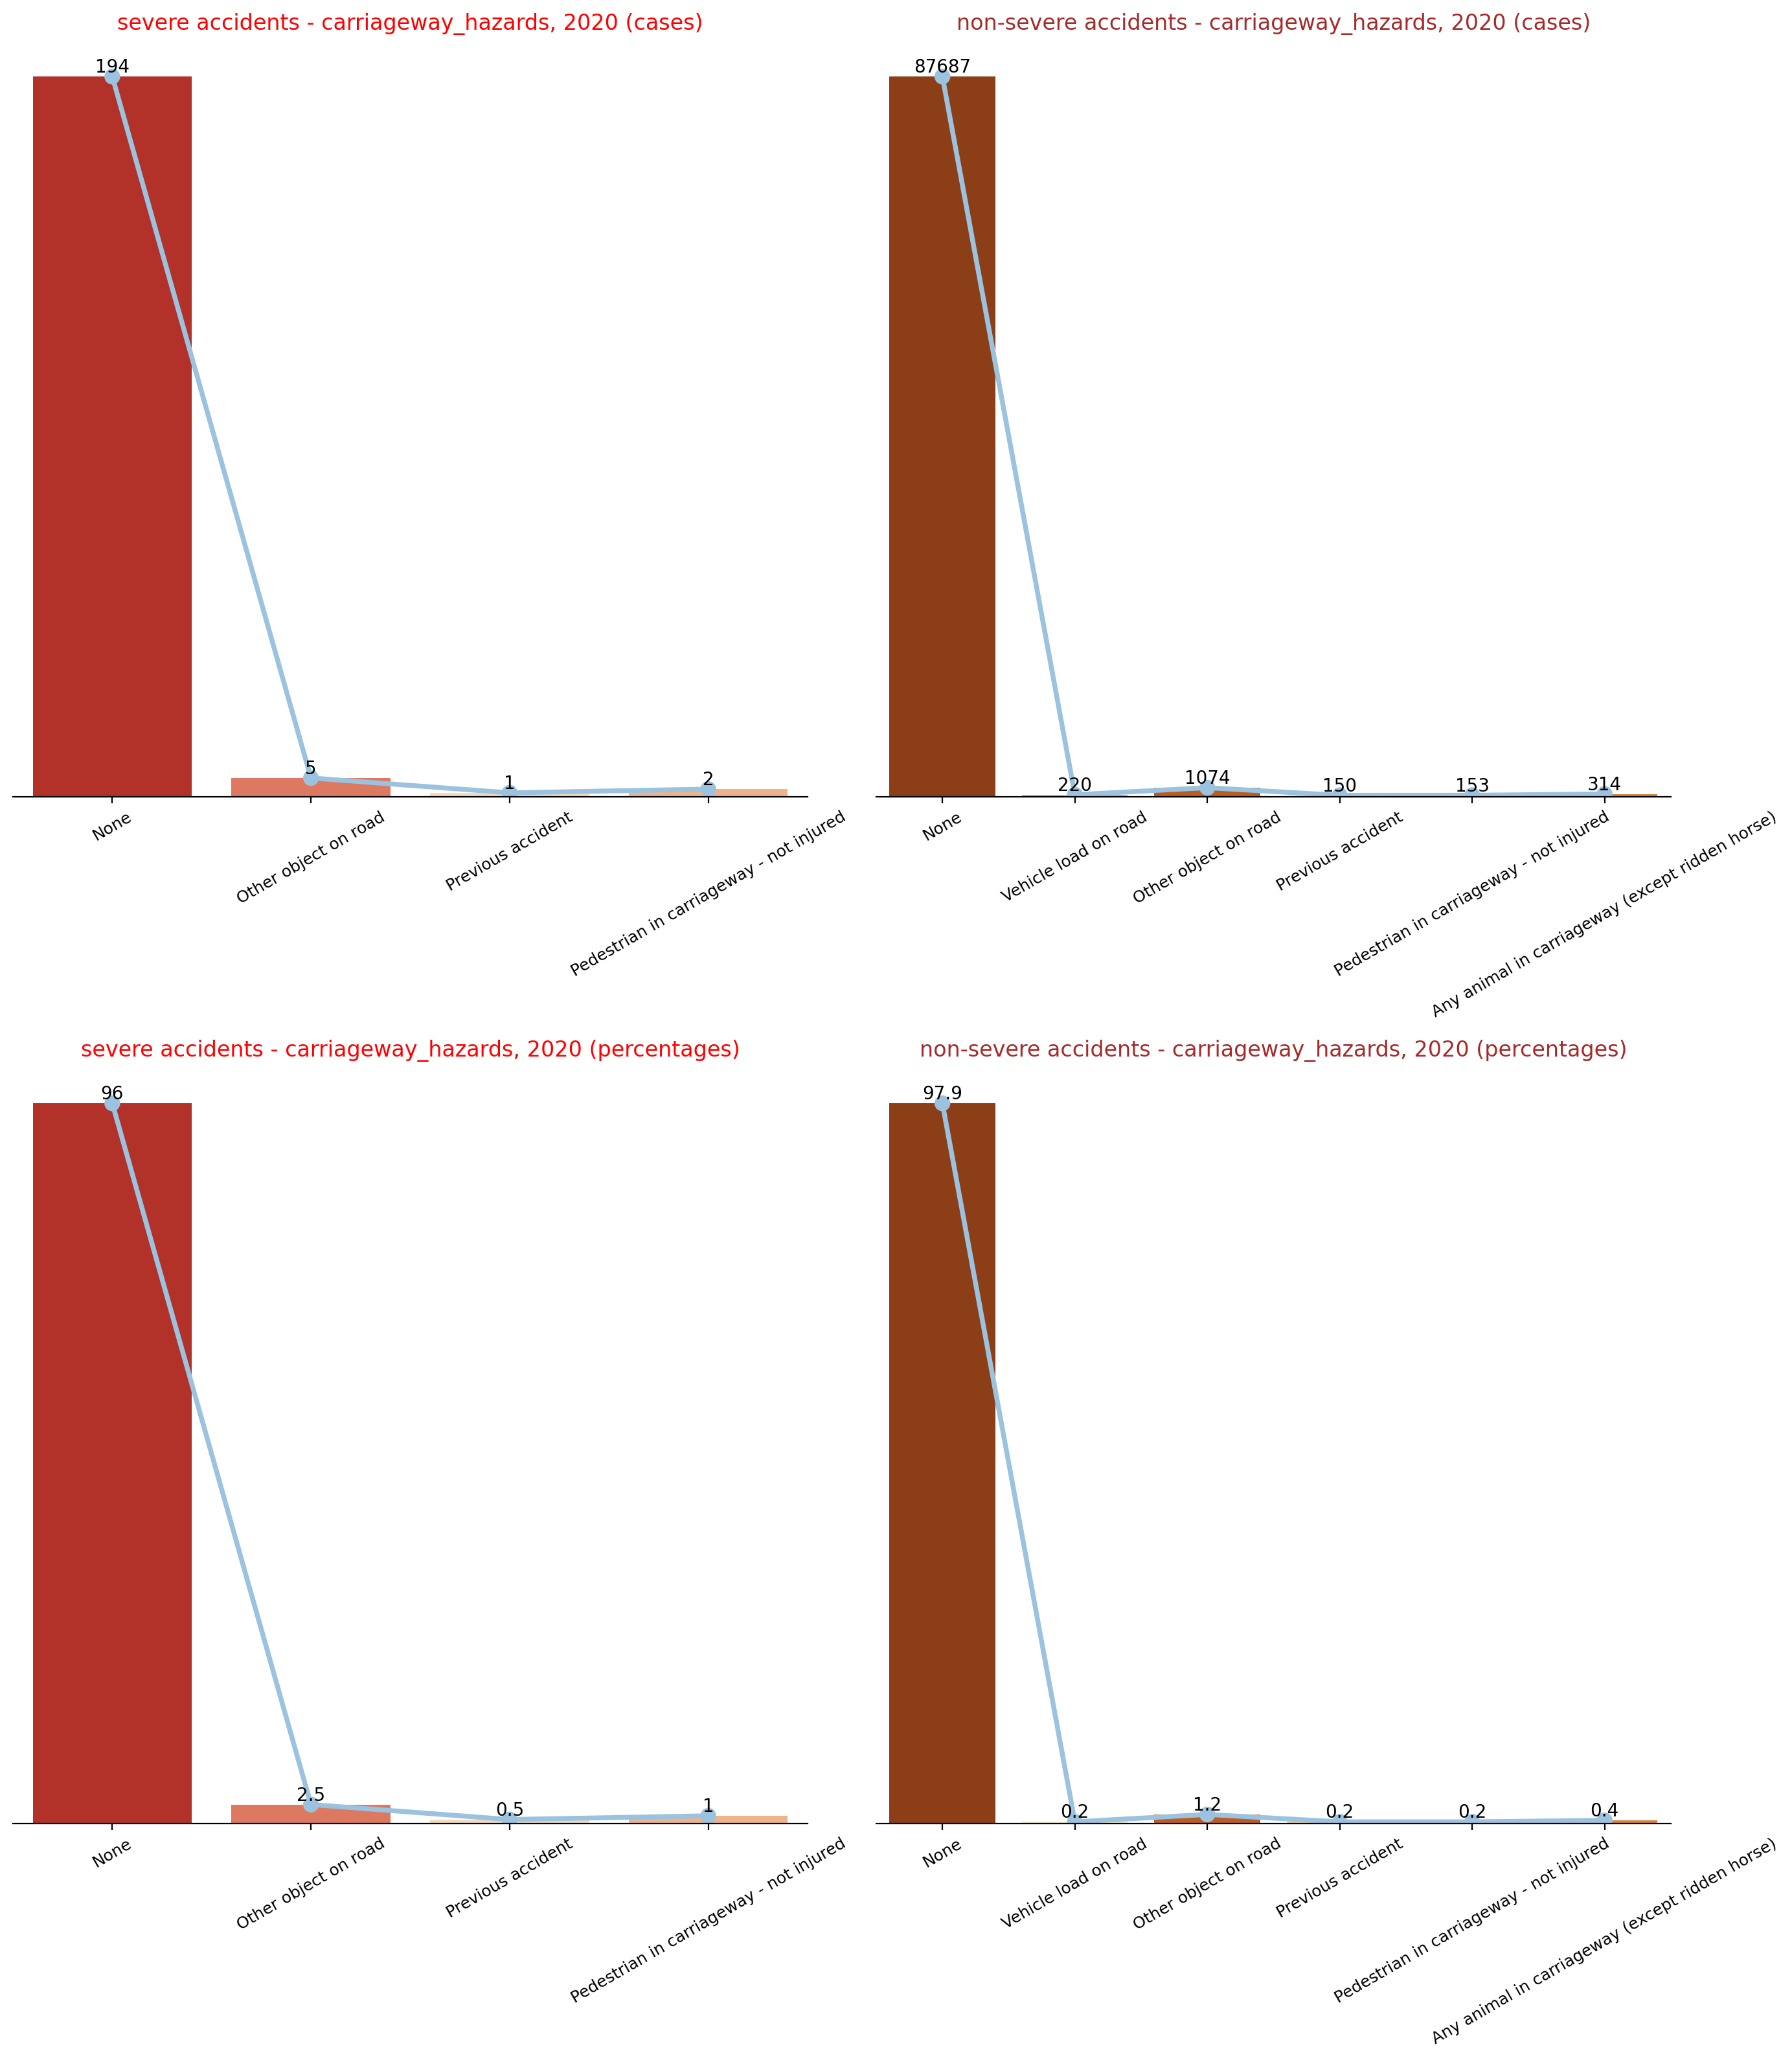

In [55]:
create_2_2('carriageway_hazards',
           use_lookup=True,rotate=30)

### light conditions

In [56]:
col_data('light_conditions')

table        field name code/format                         label note
80  Accident  light_conditions           1                      Daylight  NaN
81  Accident  light_conditions           4         Darkness - lights lit  NaN
82  Accident  light_conditions           5       Darkness - lights unlit  NaN
83  Accident  light_conditions           6        Darkness - no lighting  NaN
84  Accident  light_conditions           7   Darkness - lighting unknown  NaN
85  Accident  light_conditions          -1  Data missing or out of range  NaN

None

column values:


1      4     6     7    5  -1
light_conditions  64458  19026  4835  2194  685   1

In [57]:
a,b,c,d= filter_dfs('light_conditions',[-1],[1,4,5,6,7])

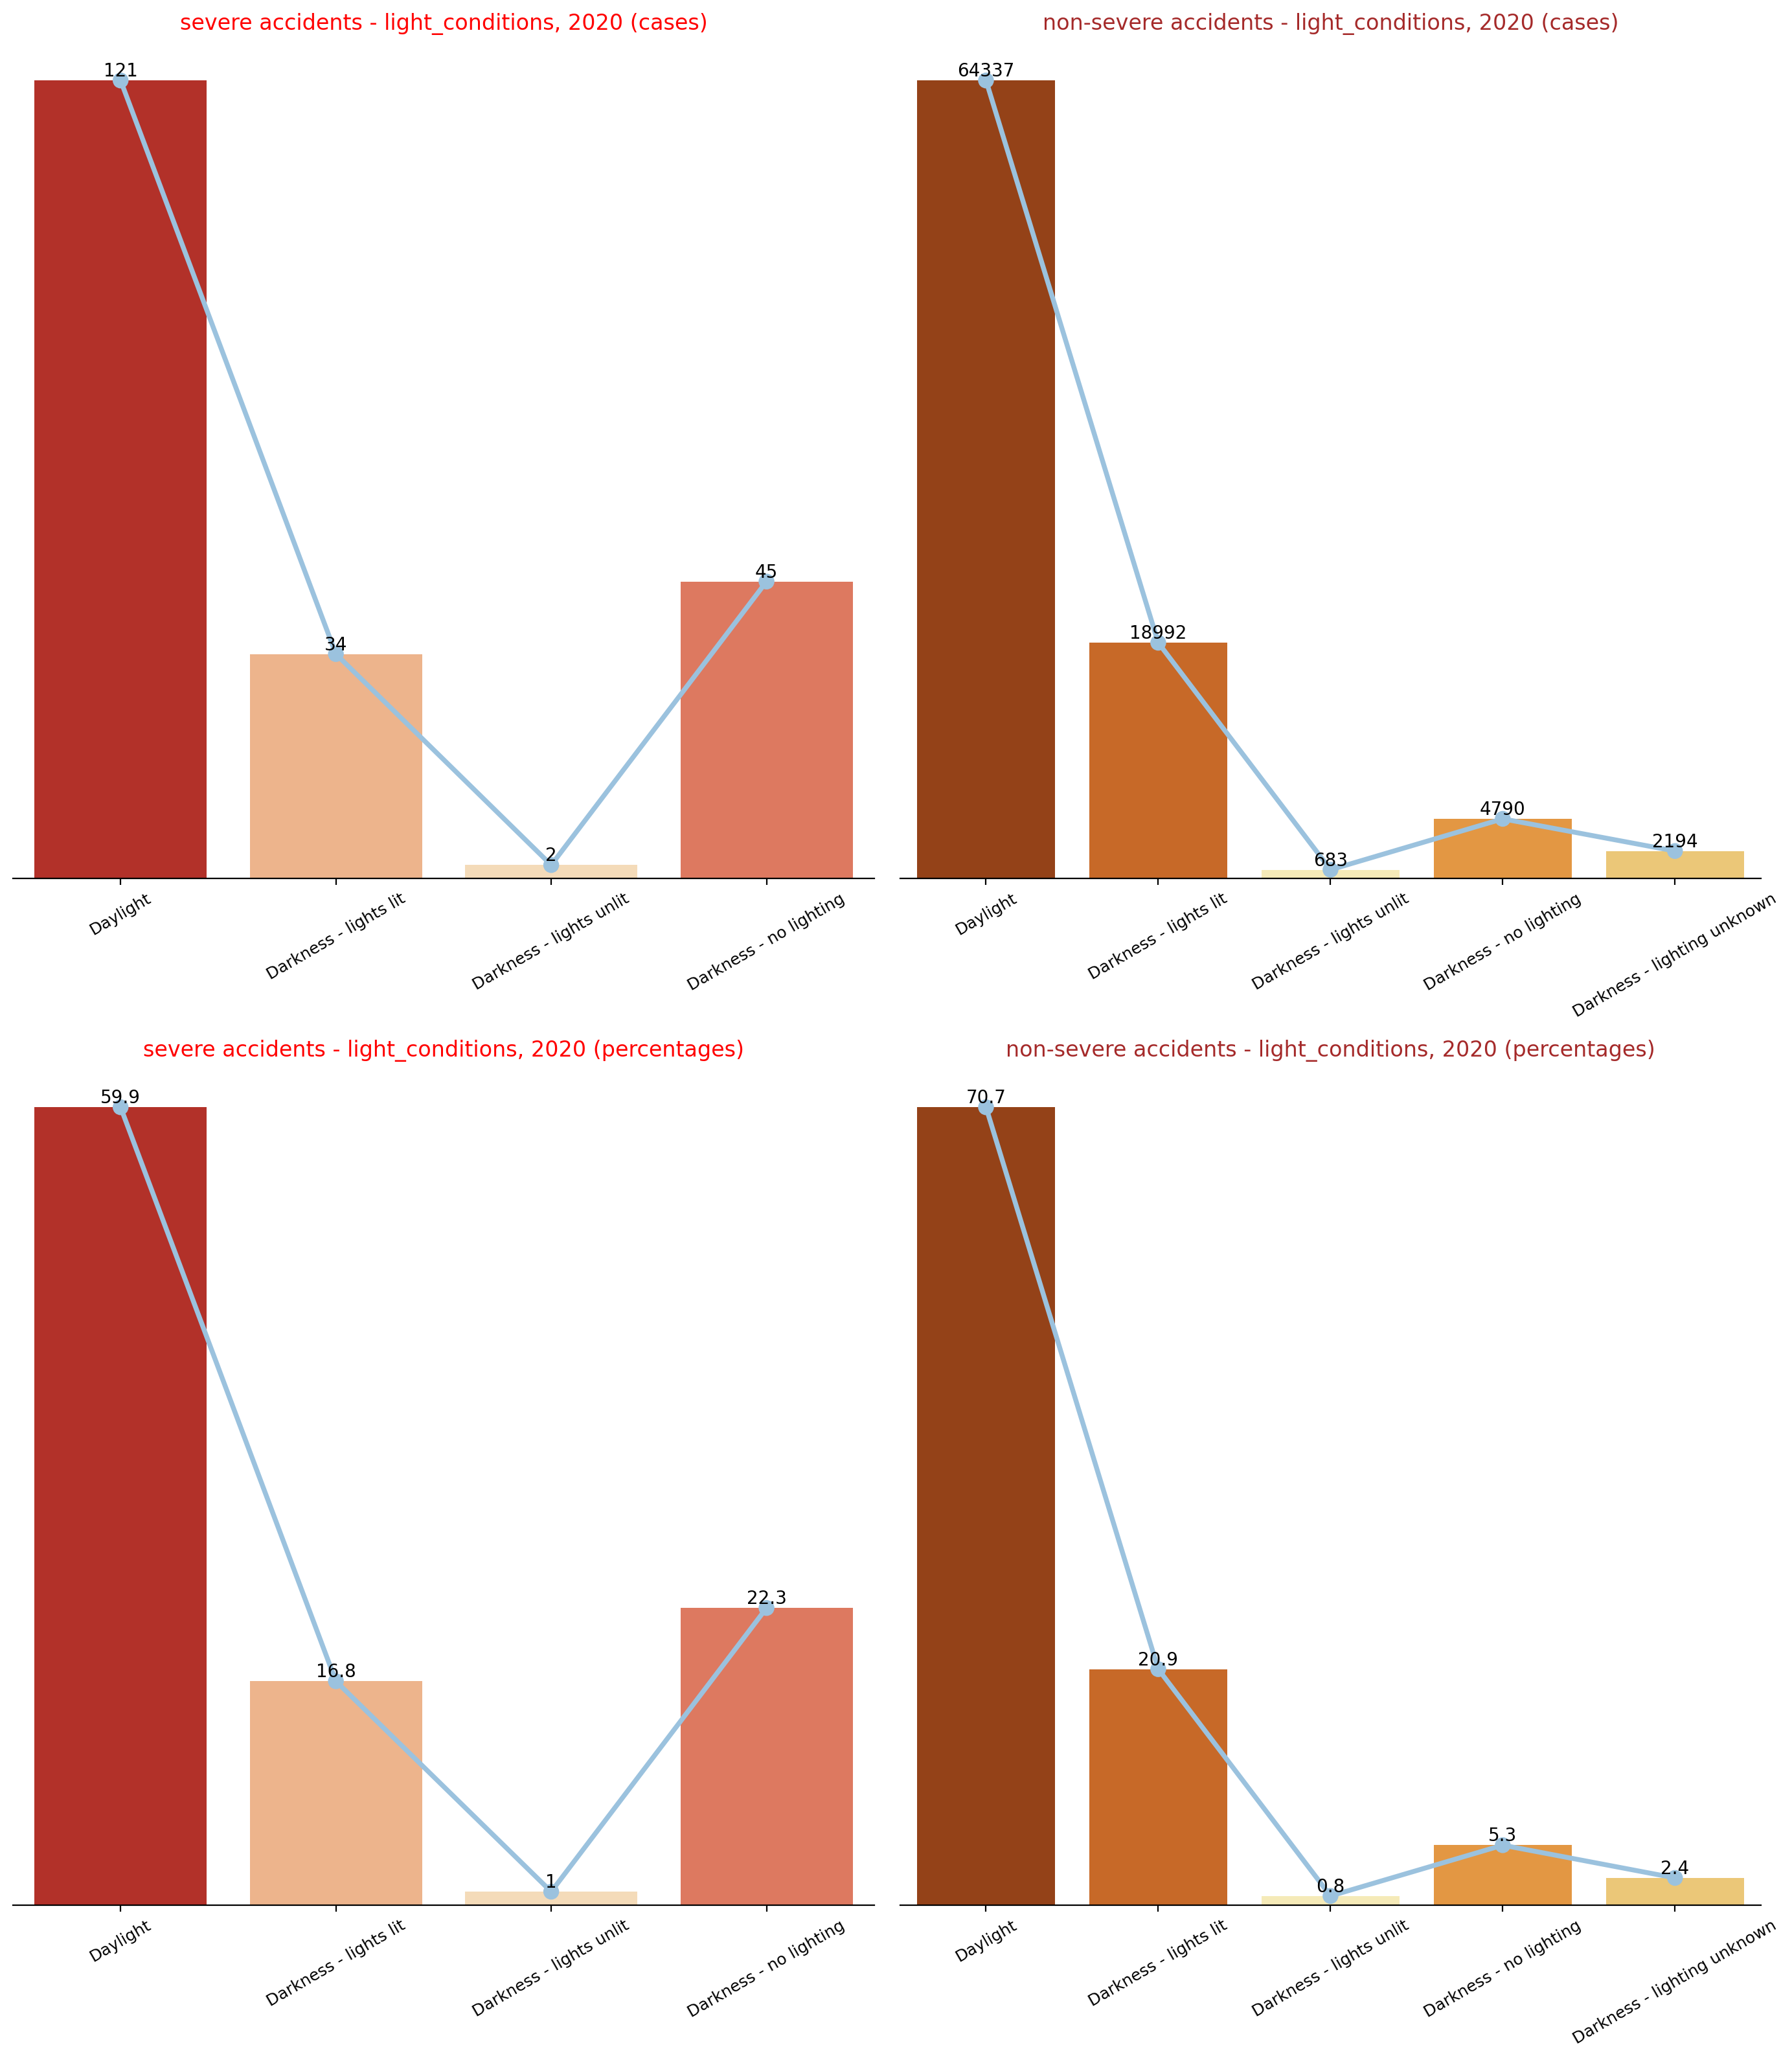

In [58]:
create_2_2('light_conditions',
          use_lookup=True,rotate=30)

* in general the distributions are similar , a little difference in "dark no light" of 2%.

### road type

In [59]:
col_data('road_type')

table field name code/format                         label note
28  Accident  road_type           1                    Roundabout  NaN
29  Accident  road_type           2                One way street  NaN
30  Accident  road_type           3              Dual carriageway  NaN
31  Accident  road_type           6            Single carriageway  NaN
32  Accident  road_type           7                     Slip road  NaN
33  Accident  road_type           9                       Unknown  NaN
34  Accident  road_type          12      One way street/Slip road  NaN
35  Accident  road_type          -1  Data missing or out of range  NaN

None

column values:


6      3     1     9     2     7
road_type  66929  13206  5580  2006  1966  1512

In [60]:
a,b,c,d= filter_dfs('road_type',[-1,9],[1,2,3,6,7])

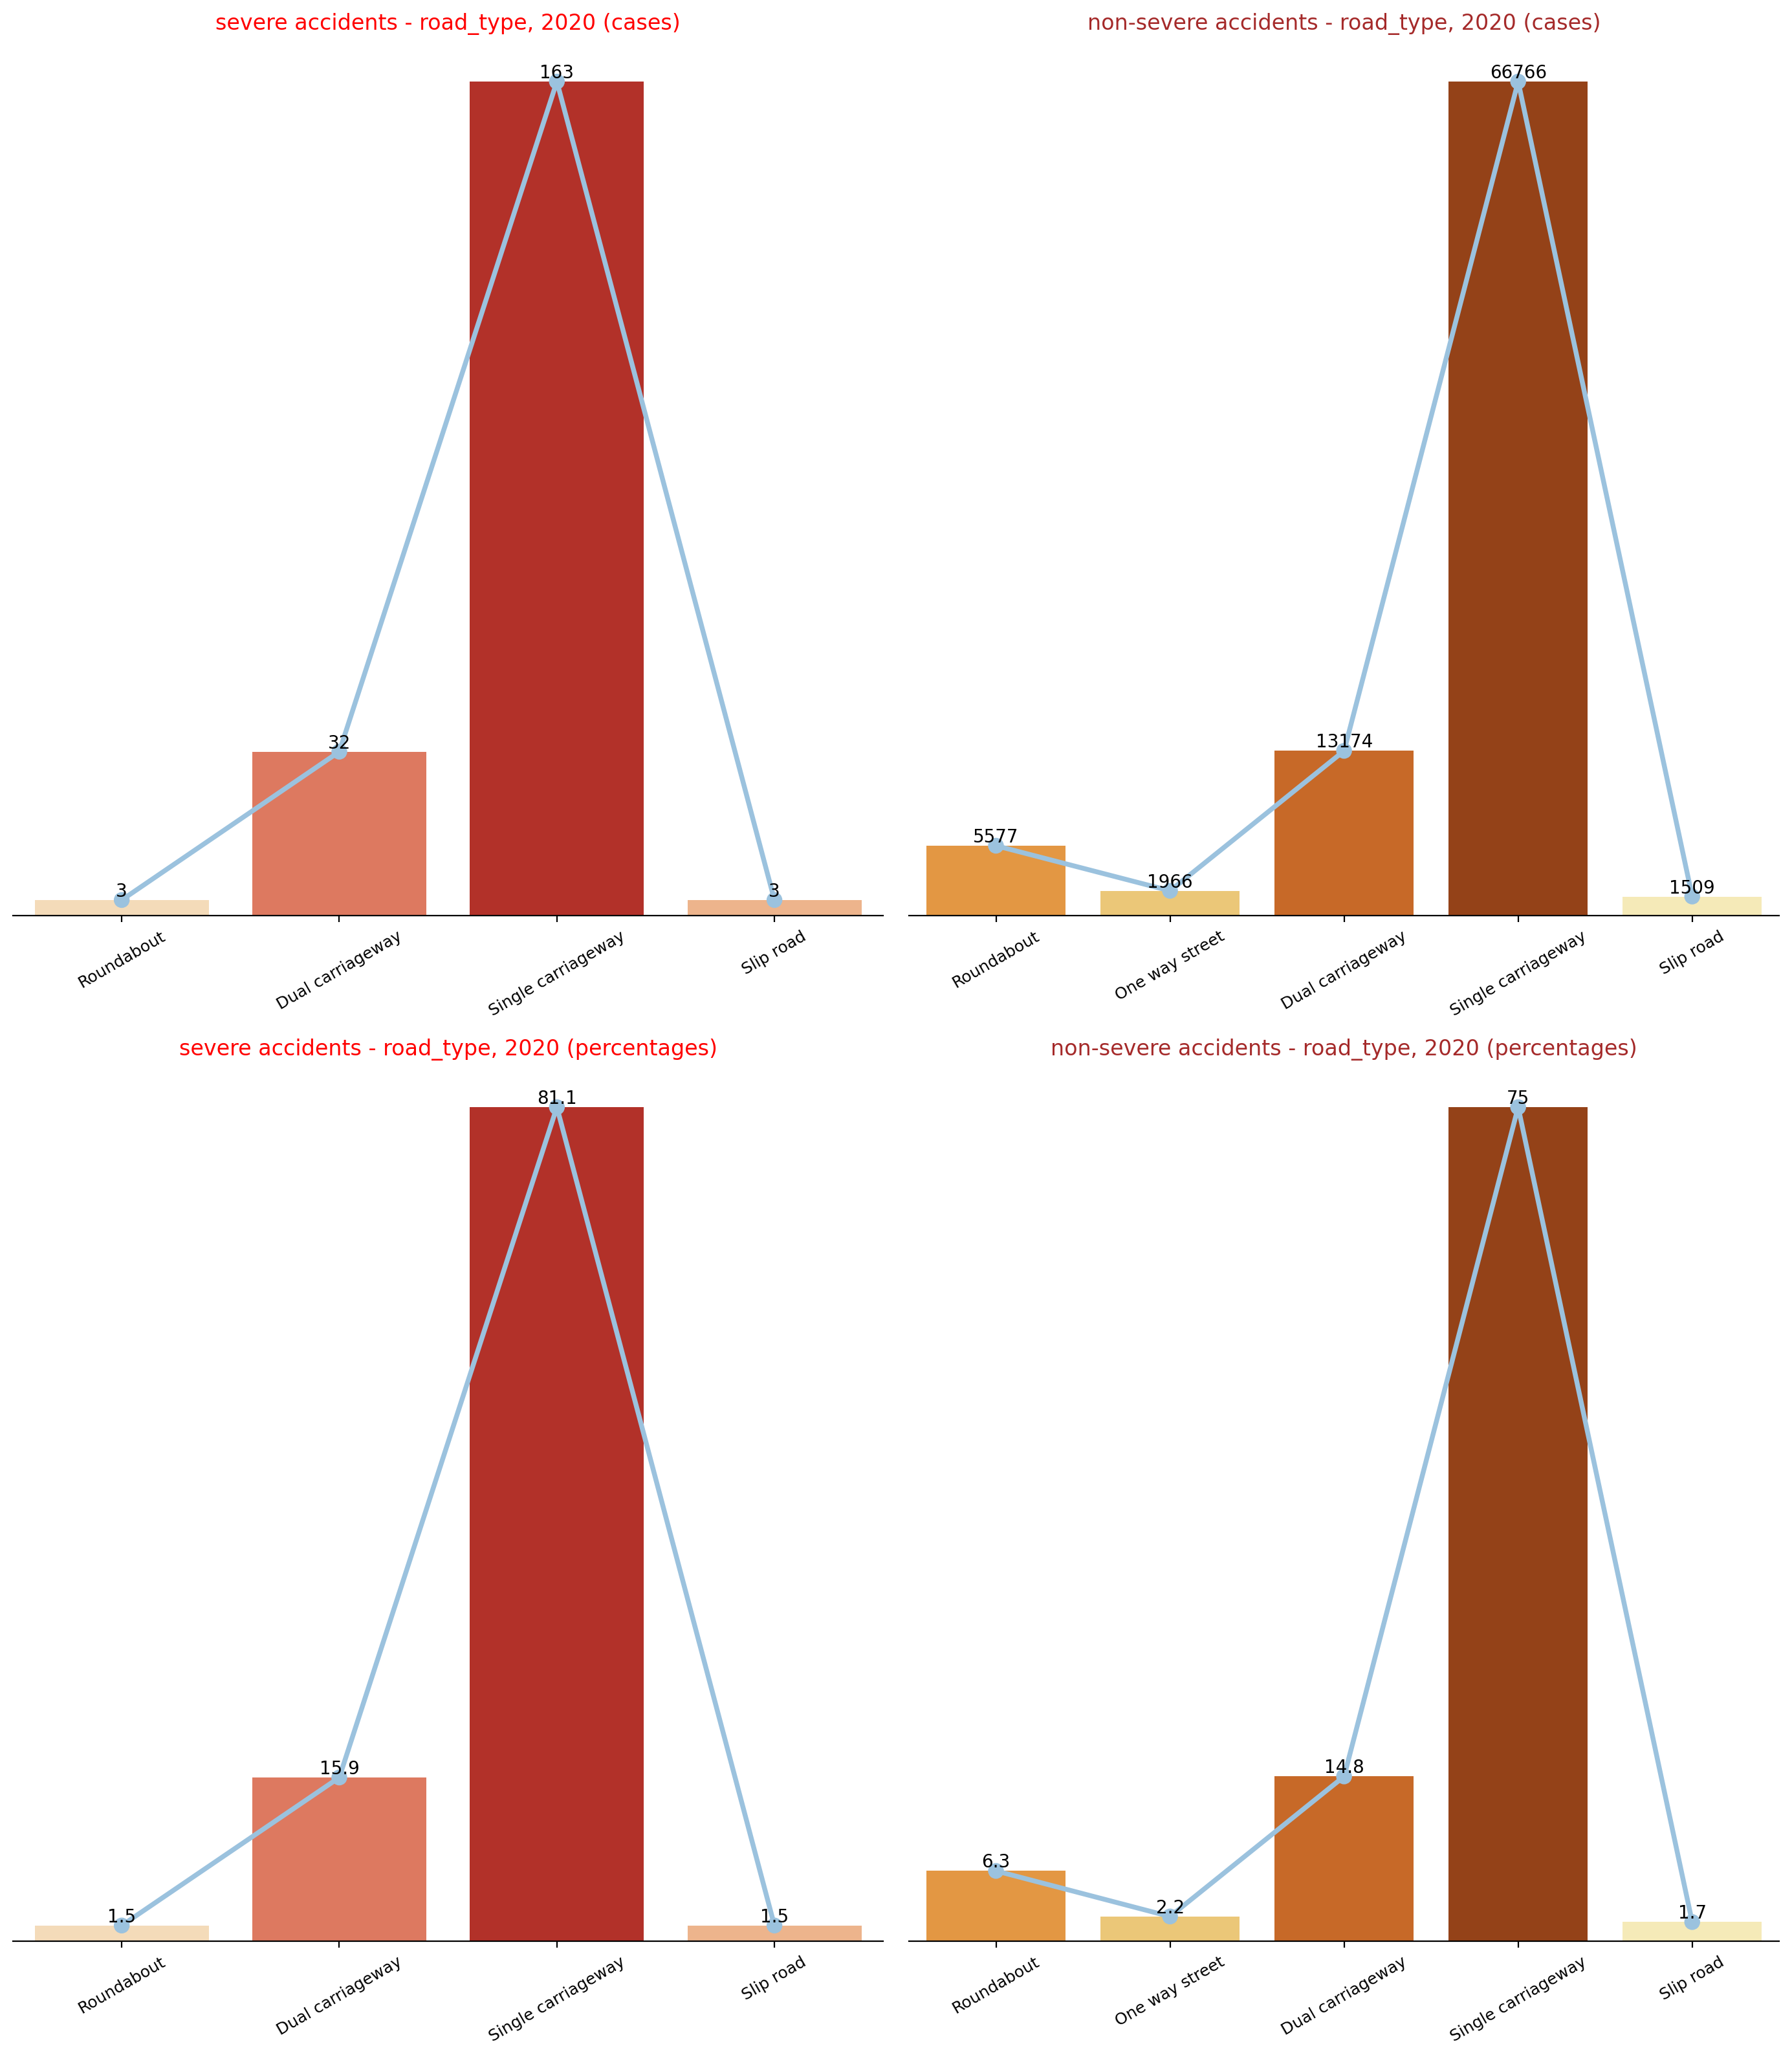

In [62]:
create_2_2('road_type',
           use_lookup=True,rotate=30)

* the distributions are simmilar but we see big differences in the "duel" and "single" : 
    * in "duel" there are 23% in the severe plot, in the non severe only 14.5%
    * in the single there are 75% in the non severe, in the severe only 70%.
* i think that the difference are like we have found before about rural and urban areas. there are more single carriageway in urban and more duel in rural, and our findings here are in correlation with it.
* but still we need to emphesize: even there is a difference in the distributions, still the most accidents (svere and not) happend in single way, urban and in 20 & 30 speed limitation.

### pedestrian crossing human control

In [63]:
col_data('pedestrian_crossing_human_control')

table                         field name code/format  \
67  Accident  pedestrian_crossing_human_control           0   
68  Accident  pedestrian_crossing_human_control           1   
69  Accident  pedestrian_crossing_human_control           2   
70  Accident  pedestrian_crossing_human_control          -1   
71  Accident  pedestrian_crossing_human_control           9   

                                 label note  
67              None within 50 metres   NaN  
68   Control by school crossing patrol  NaN  
69  Control by other authorised person  NaN  
70        Data missing or out of range  NaN  
71             unknown (self reported)  NaN

None

column values:


0     9    2    1   -1
pedestrian_crossing_human_control  86358  3332  980  386  143

In [64]:
a,b,c,d= filter_dfs('pedestrian_crossing_human_control',[-1,9],[0,1,2])

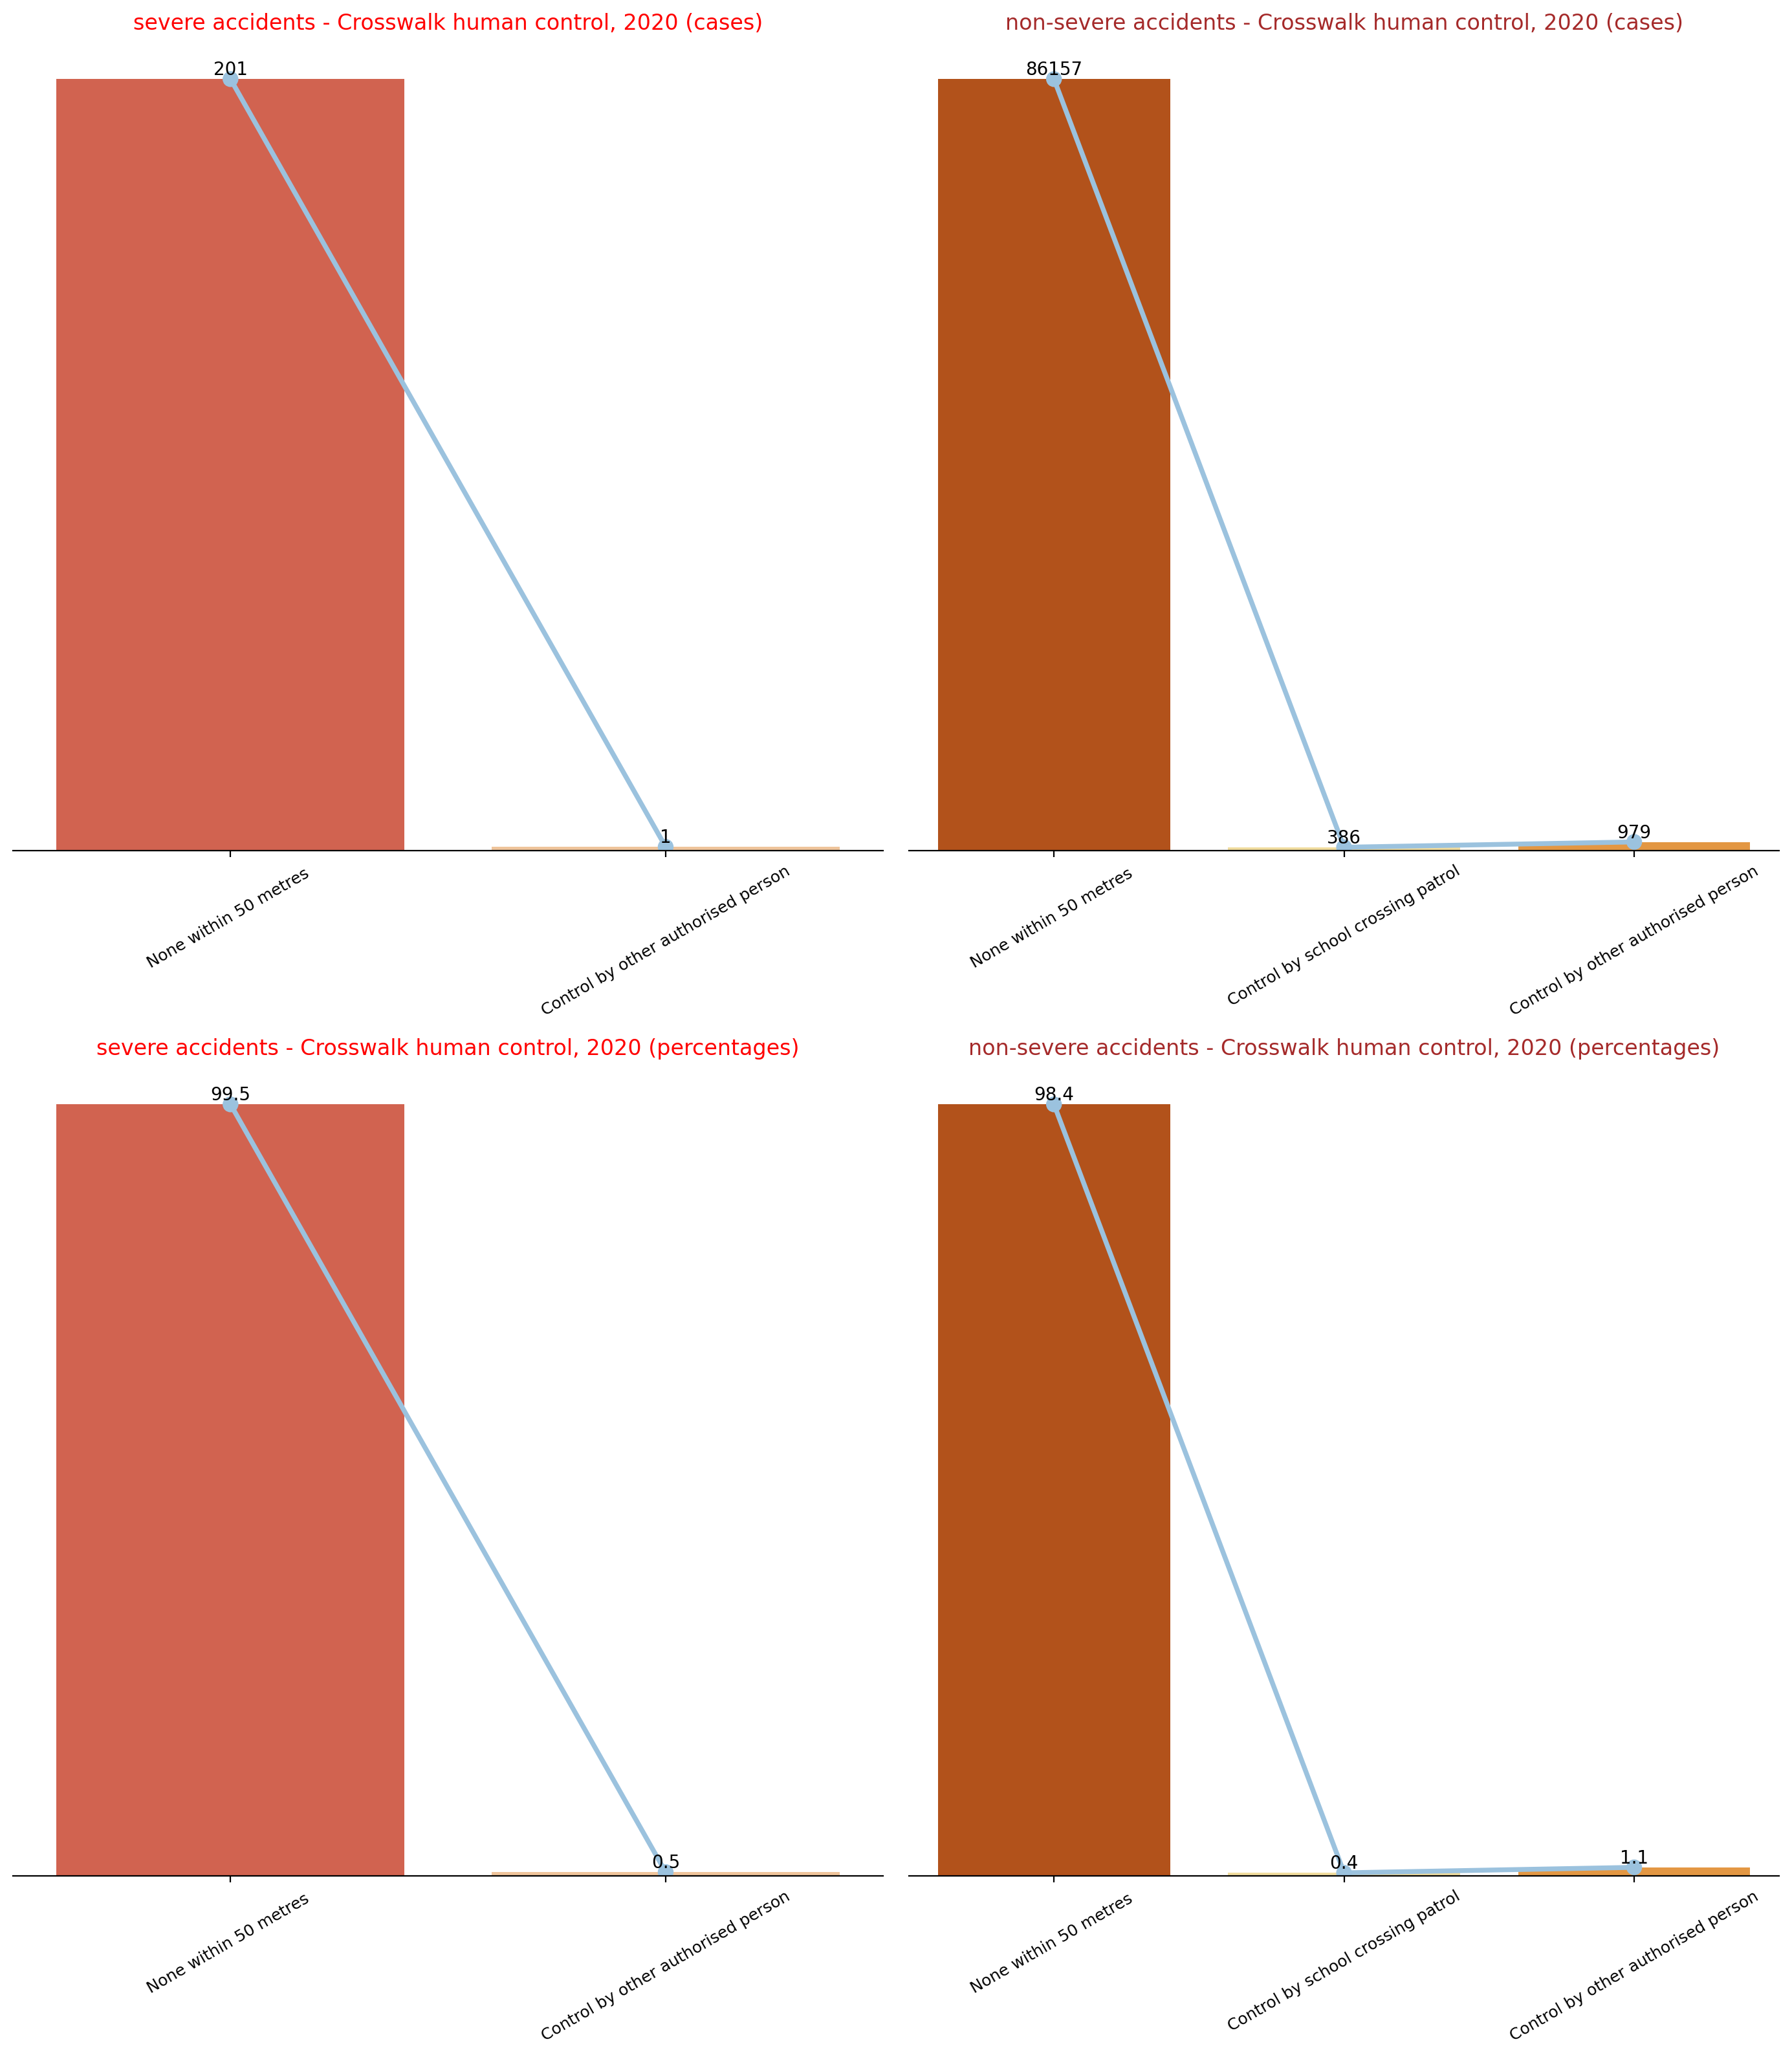

In [65]:
create_2_2('Crosswalk human control',
           use_lookup=True,rotate=30)

* i dont think that these differences are significant.

### pedestrian crossing physical facilities

In [ ]:
col_data('pedestrian_crossing_physical_facilities')

In [ ]:
a,b,c,d= filter_dfs('pedestrian_crossing_physical_facilities',[-1,9],[0,1,4,5,7,8,9])

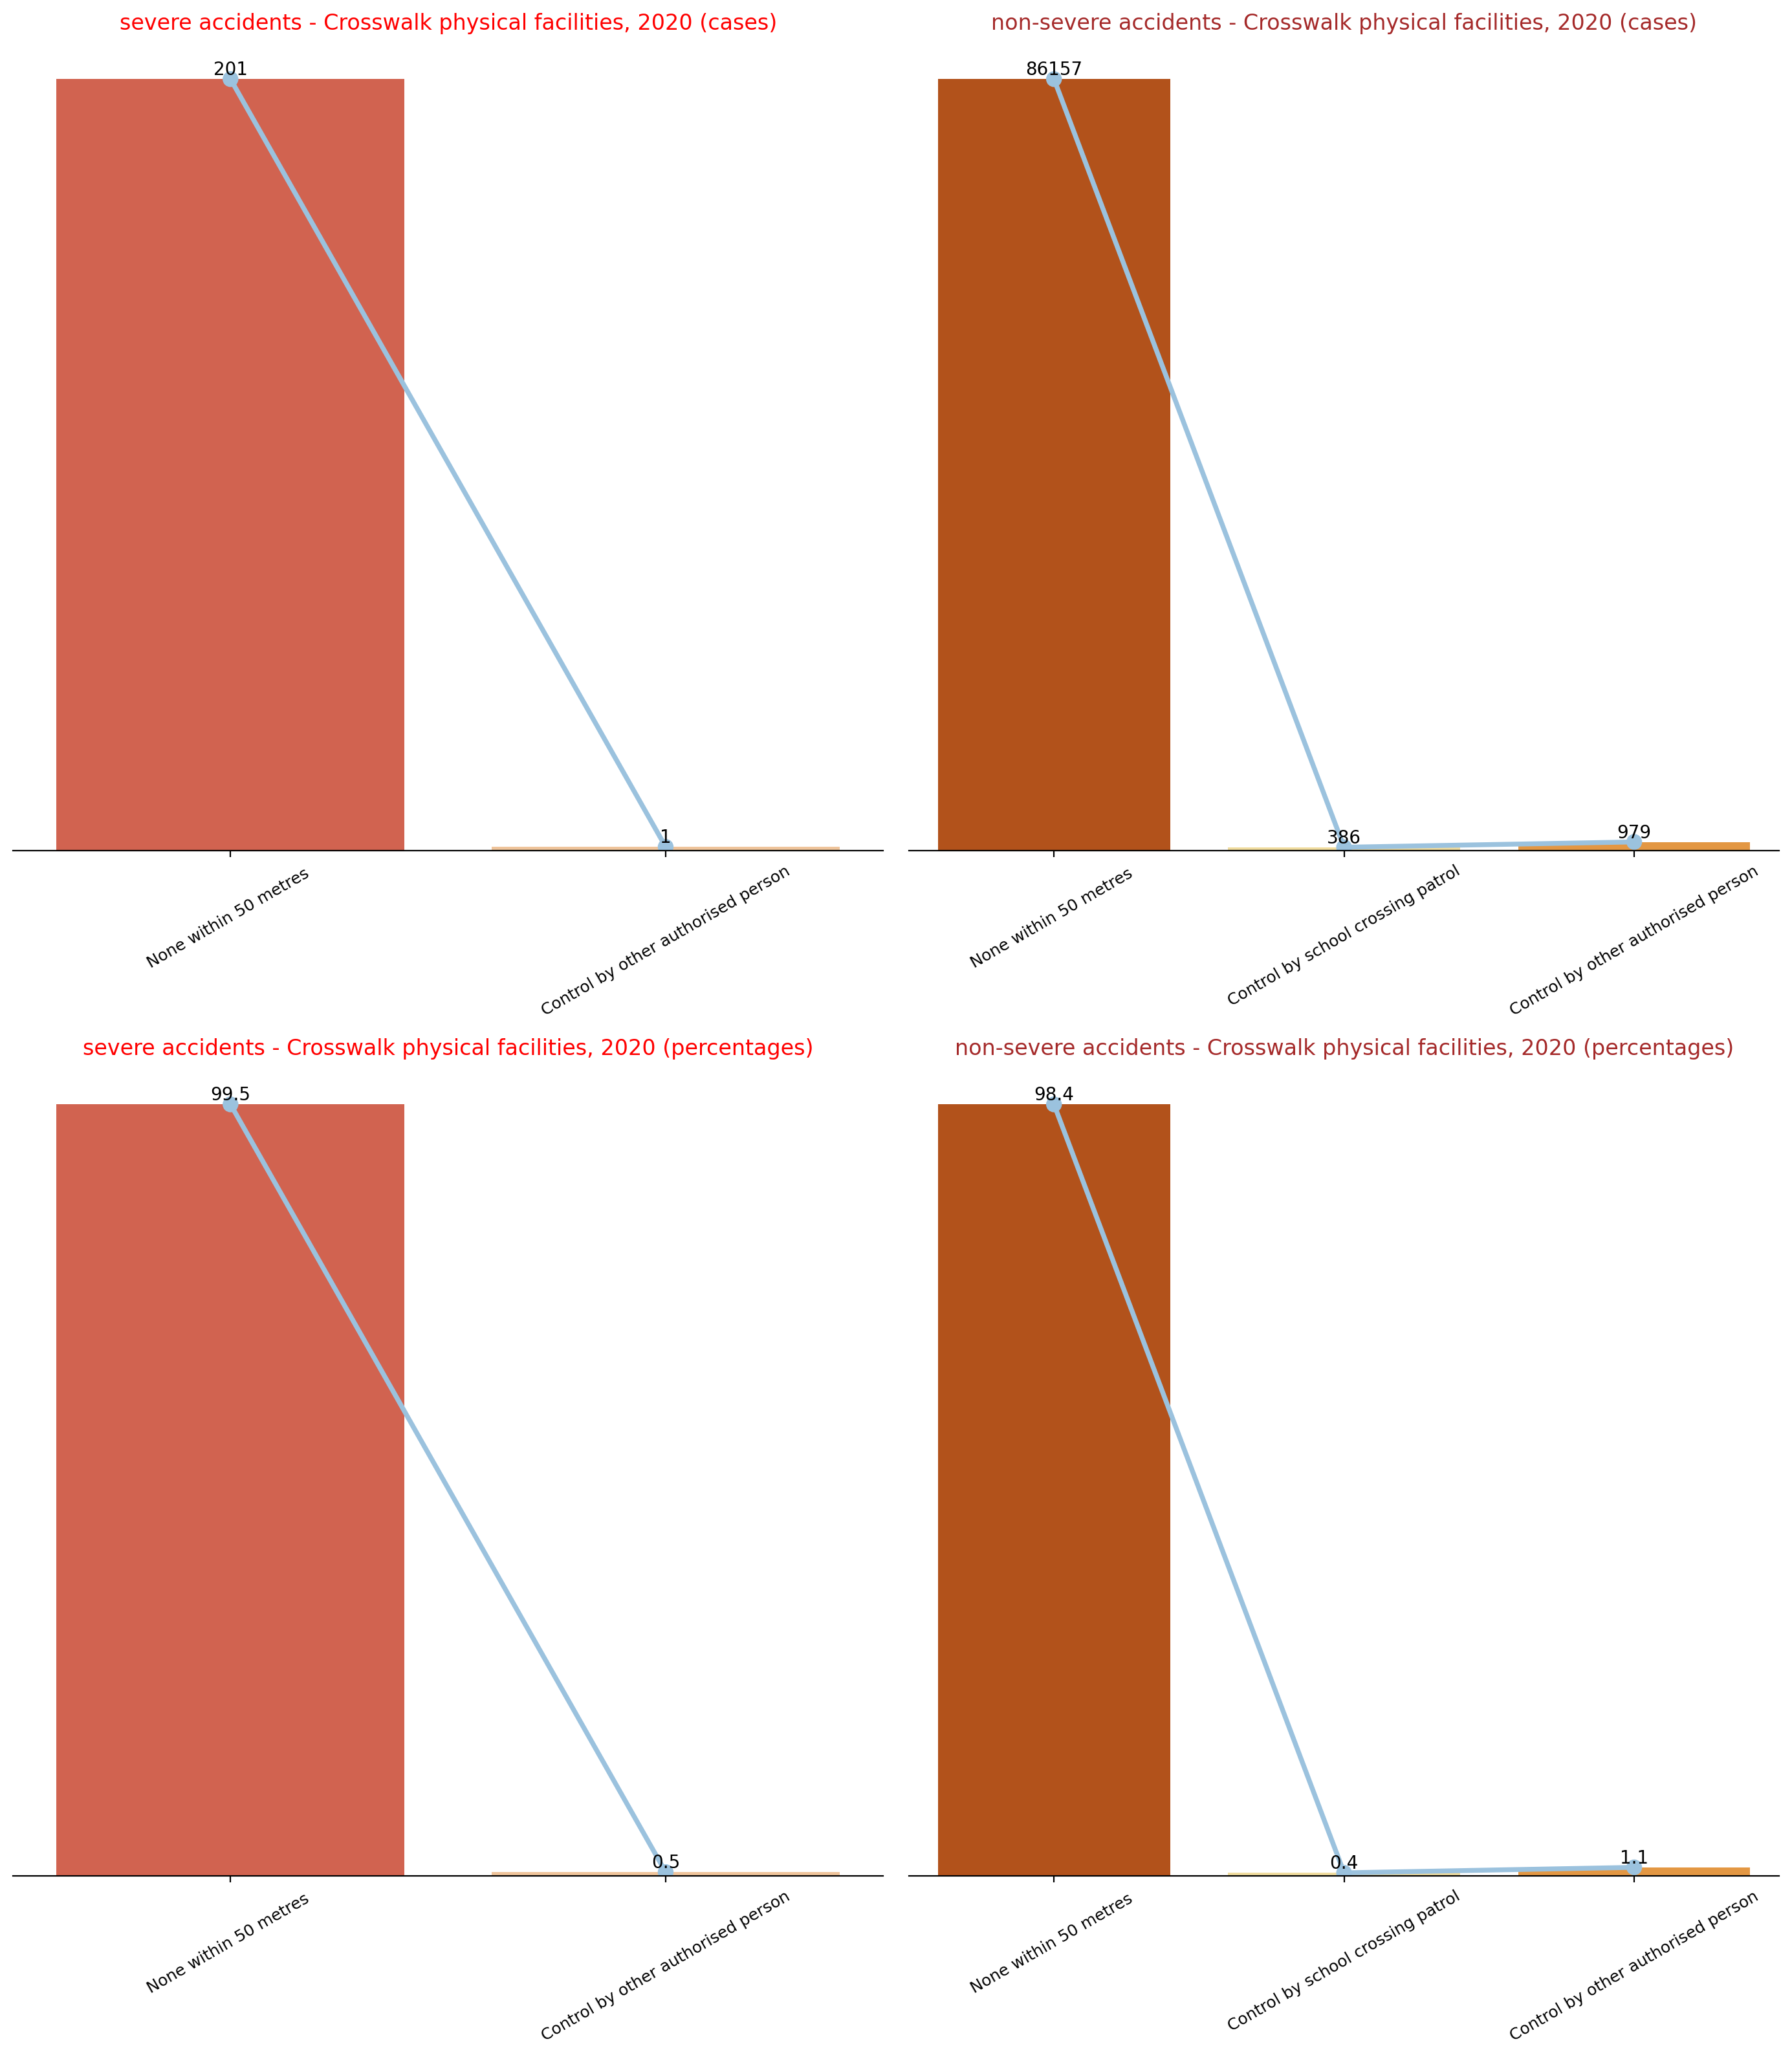

In [66]:
create_2_2('Crosswalk physical facilities',
           use_lookup=True,rotate=30)

* we see like 3% more in the severe distribution in the "none" column.
* we see that the none is the highest column in both distributions, maybe we could add more facilities ?
* the other in both distributions is pretty similar.

### number of vehicles

In [67]:
col_data('number_of_vehicles')

table          field name code/format label note
8  Accident  number_of_vehicles         NaN   NaN  NaN

None

column values:


2      1     3     4    5   6   7   8   9   10  11  13  \
number_of_vehicles  57392  25730  6241  1334  331  99  47  15   3   3   2   1   

                    12  
number_of_vehicles   1

In [68]:
a,b,c,d= filter_dfs('number_of_vehicles',[],range(1,13))

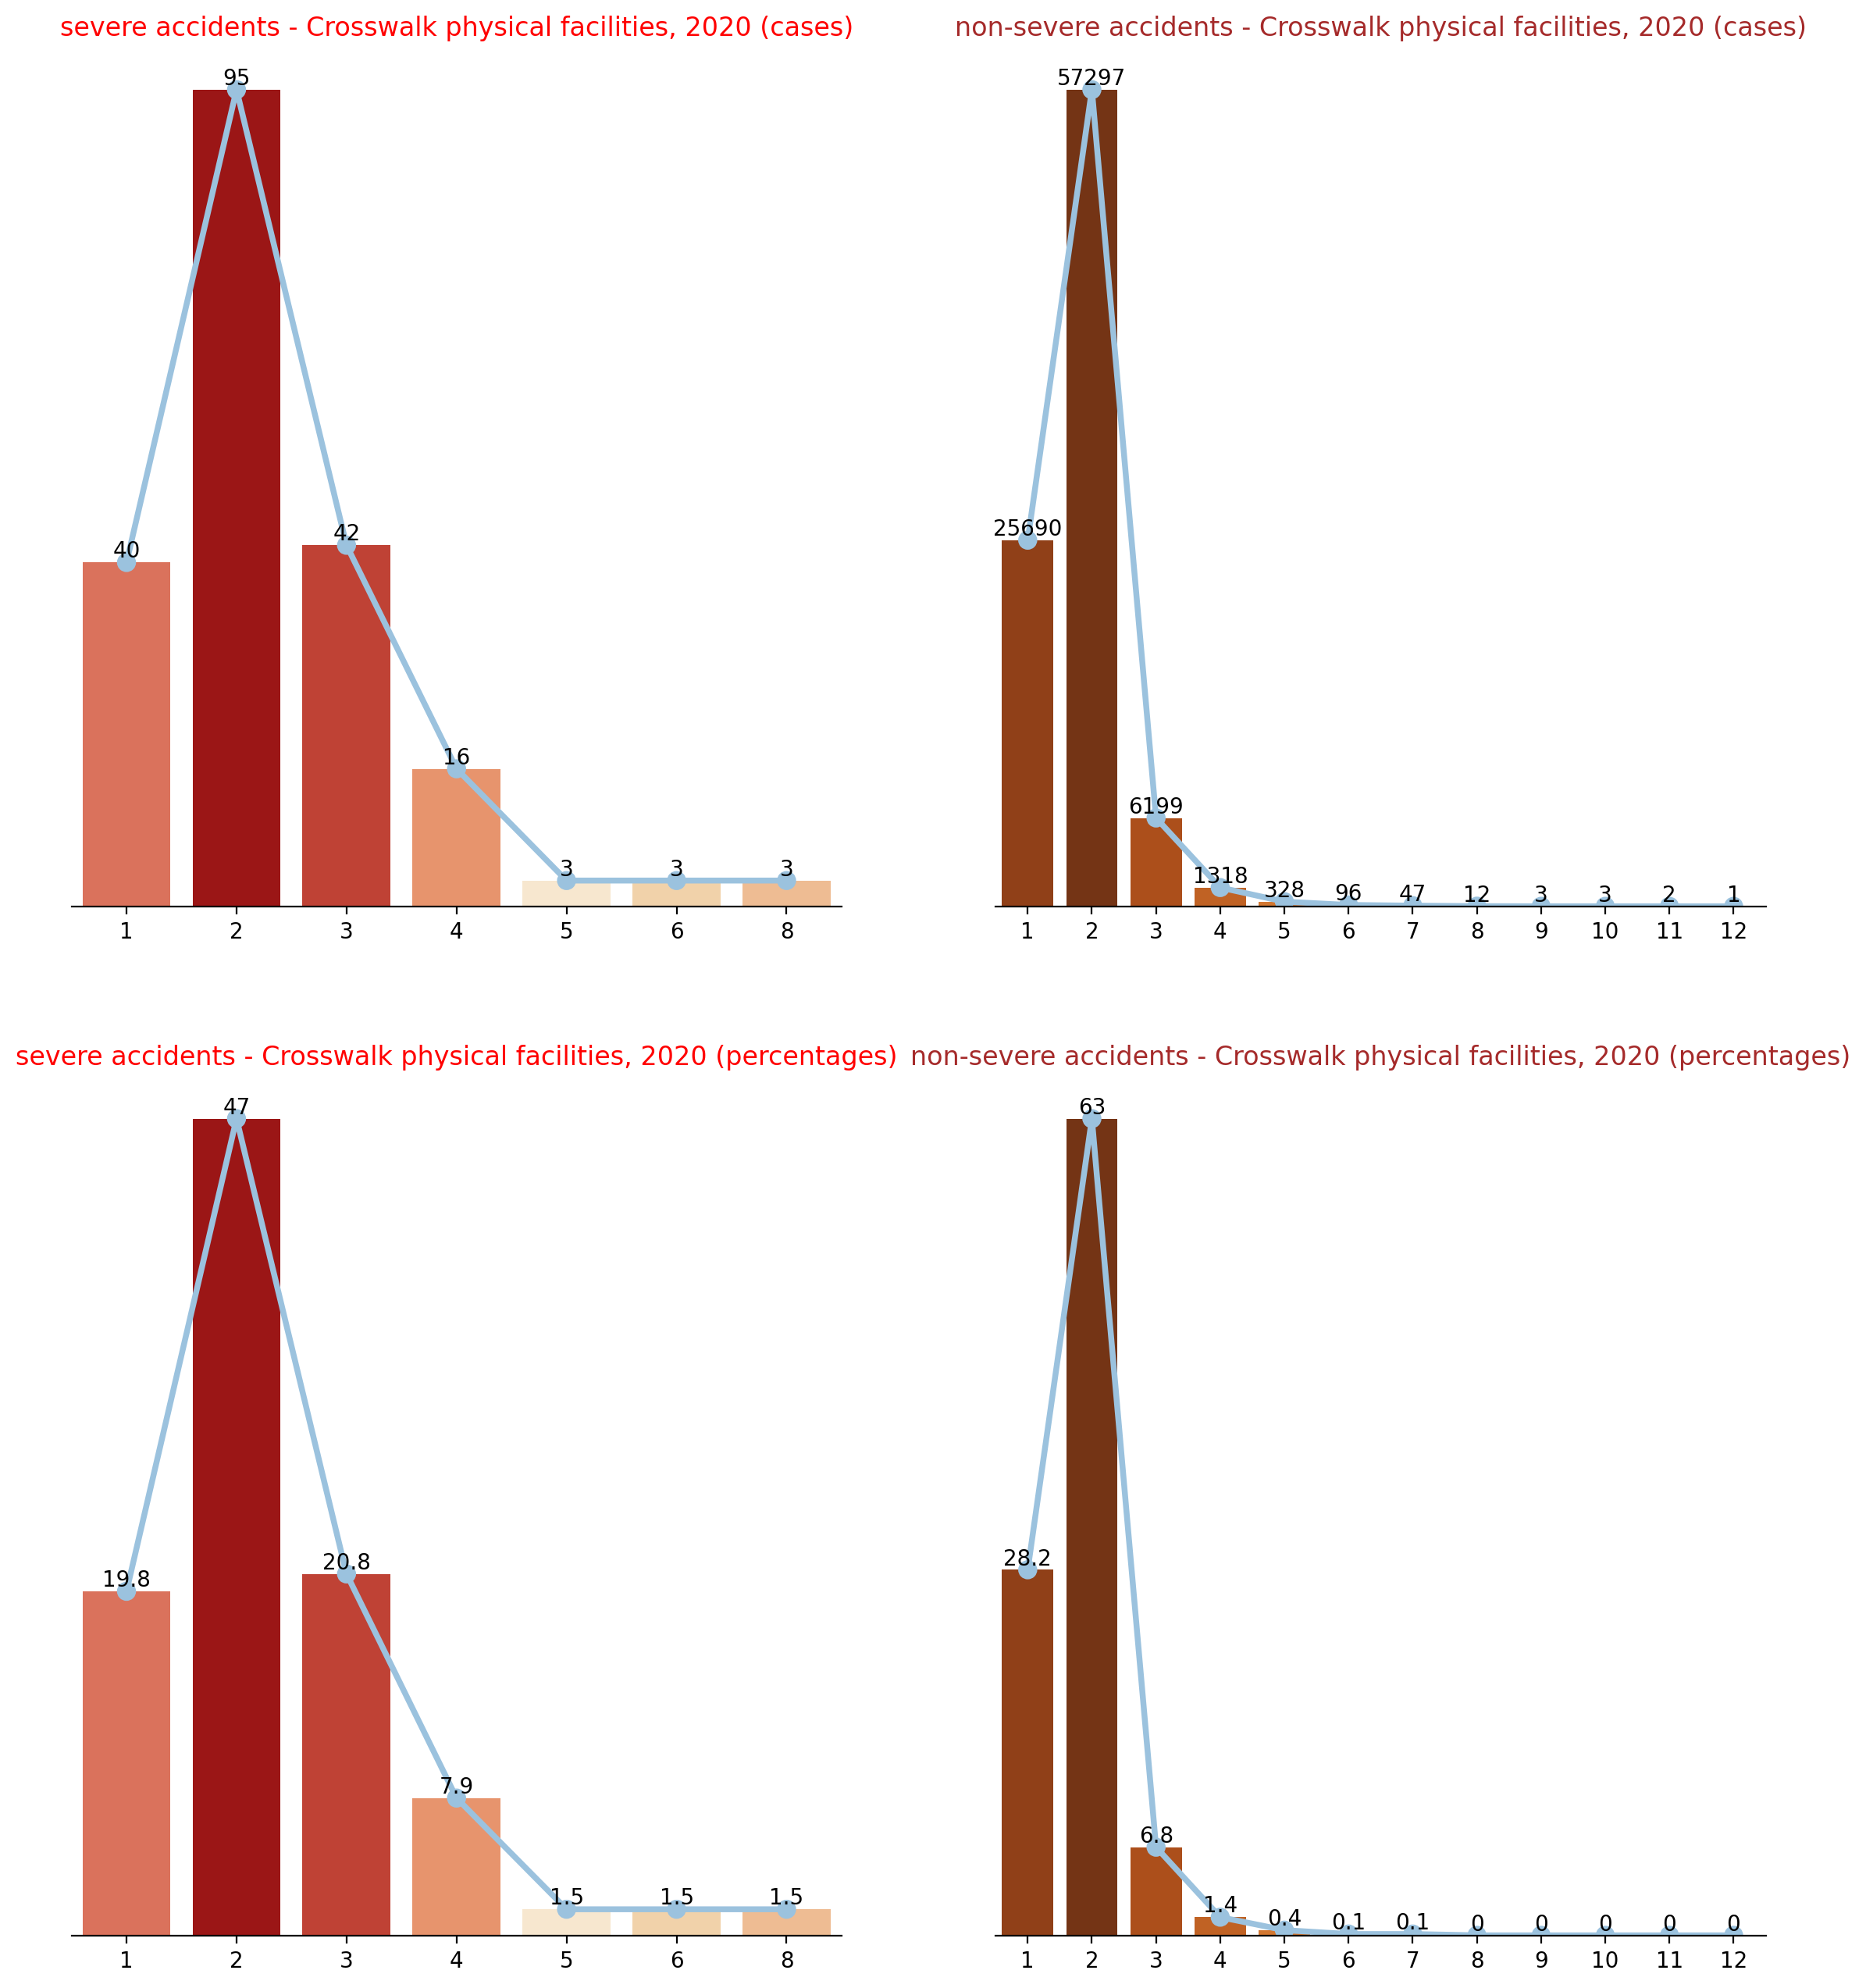

In [69]:
create_2_2('Crosswalk physical facilities',
           x_tick_labels=None)

* we see interesting differences between the distributions:
    * 29% from the non-severe are of one vehicle , to 10% at severe.
    * we see that in 2 vehicles it pretty similar -63%
    * above 2 vehicles the percenteges in the severe distribution are higher!
    * the non-severe distribution is more "narrow" here.
    * i think that the reason is that in highways and rural areas people drive faster, so accidents are with more vehicles. and as we saw before, the distributions in rural areas with high speed are different.

### road class

* to understand it, recommended to read <a href="https://en.wikipedia.org/wiki/Great_Britain_road_numbering_scheme">here </a>.
* "The Great Britain road numbering scheme is a numbering scheme used to classify and identify all roads in Great Britain. Each road is given a single letter, which represents the road's category, and a subsequent number, of 1 to 4 digits. "

* motorway - "A controlled-access highway is a type of highway that has been designed for high-speed vehicular traffic, with all traffic flow—ingress and egress—regulated. Common English terms are freeway,motorway and expressway."
* A(M) - "Some sections of A roads have been improved to the same standard as motorways, but do not completely replace the existing road; they form a higher standard part of the route for those which are not excluded. These sections retain the same number but are suffixed with (M), for example the A1(M) and A404(M)"
* A - "In England and Wales, the six single-digit numbers reflect the traditionally most important radial routes coming out of London. Starting with the A1 which heads due north, numbers were allocated sequentially in a clockwise direction" ..."These radials are supplemented by two-digit codes  For example, the A10 (London to King's Lynn) is the first main route clockwise from the A1, the A11 (London to Norwich) is the next, then the A12 (London to Great Yarmouth) and the A13 (London to Shoeburyness); the next radial is the A2, followed by the A20 (London to Dover), and so on".
* B - B roads are numbered distributor roads, which have lower traffic densities than the main trunk roads, or A roads. 
* C -  Roads and lanes with yet lower traffic densities are designated as unclassified roads commonly using C, D and U prefixes.


In [70]:
col_data('first_road_class')

table        field name code/format         label note
19  Accident  first_road_class           1      Motorway  NaN
20  Accident  first_road_class           2          A(M)  NaN
21  Accident  first_road_class           3             A  NaN
22  Accident  first_road_class           4             B  NaN
23  Accident  first_road_class           5             C  NaN
24  Accident  first_road_class           6  Unclassified  NaN

None

column values:


3      6      4     5     1    2
first_road_class  40604  31709  11490  4815  2374  207

In [71]:
a,b,c,d= filter_dfs('first_road_class',[6],range(1,6))

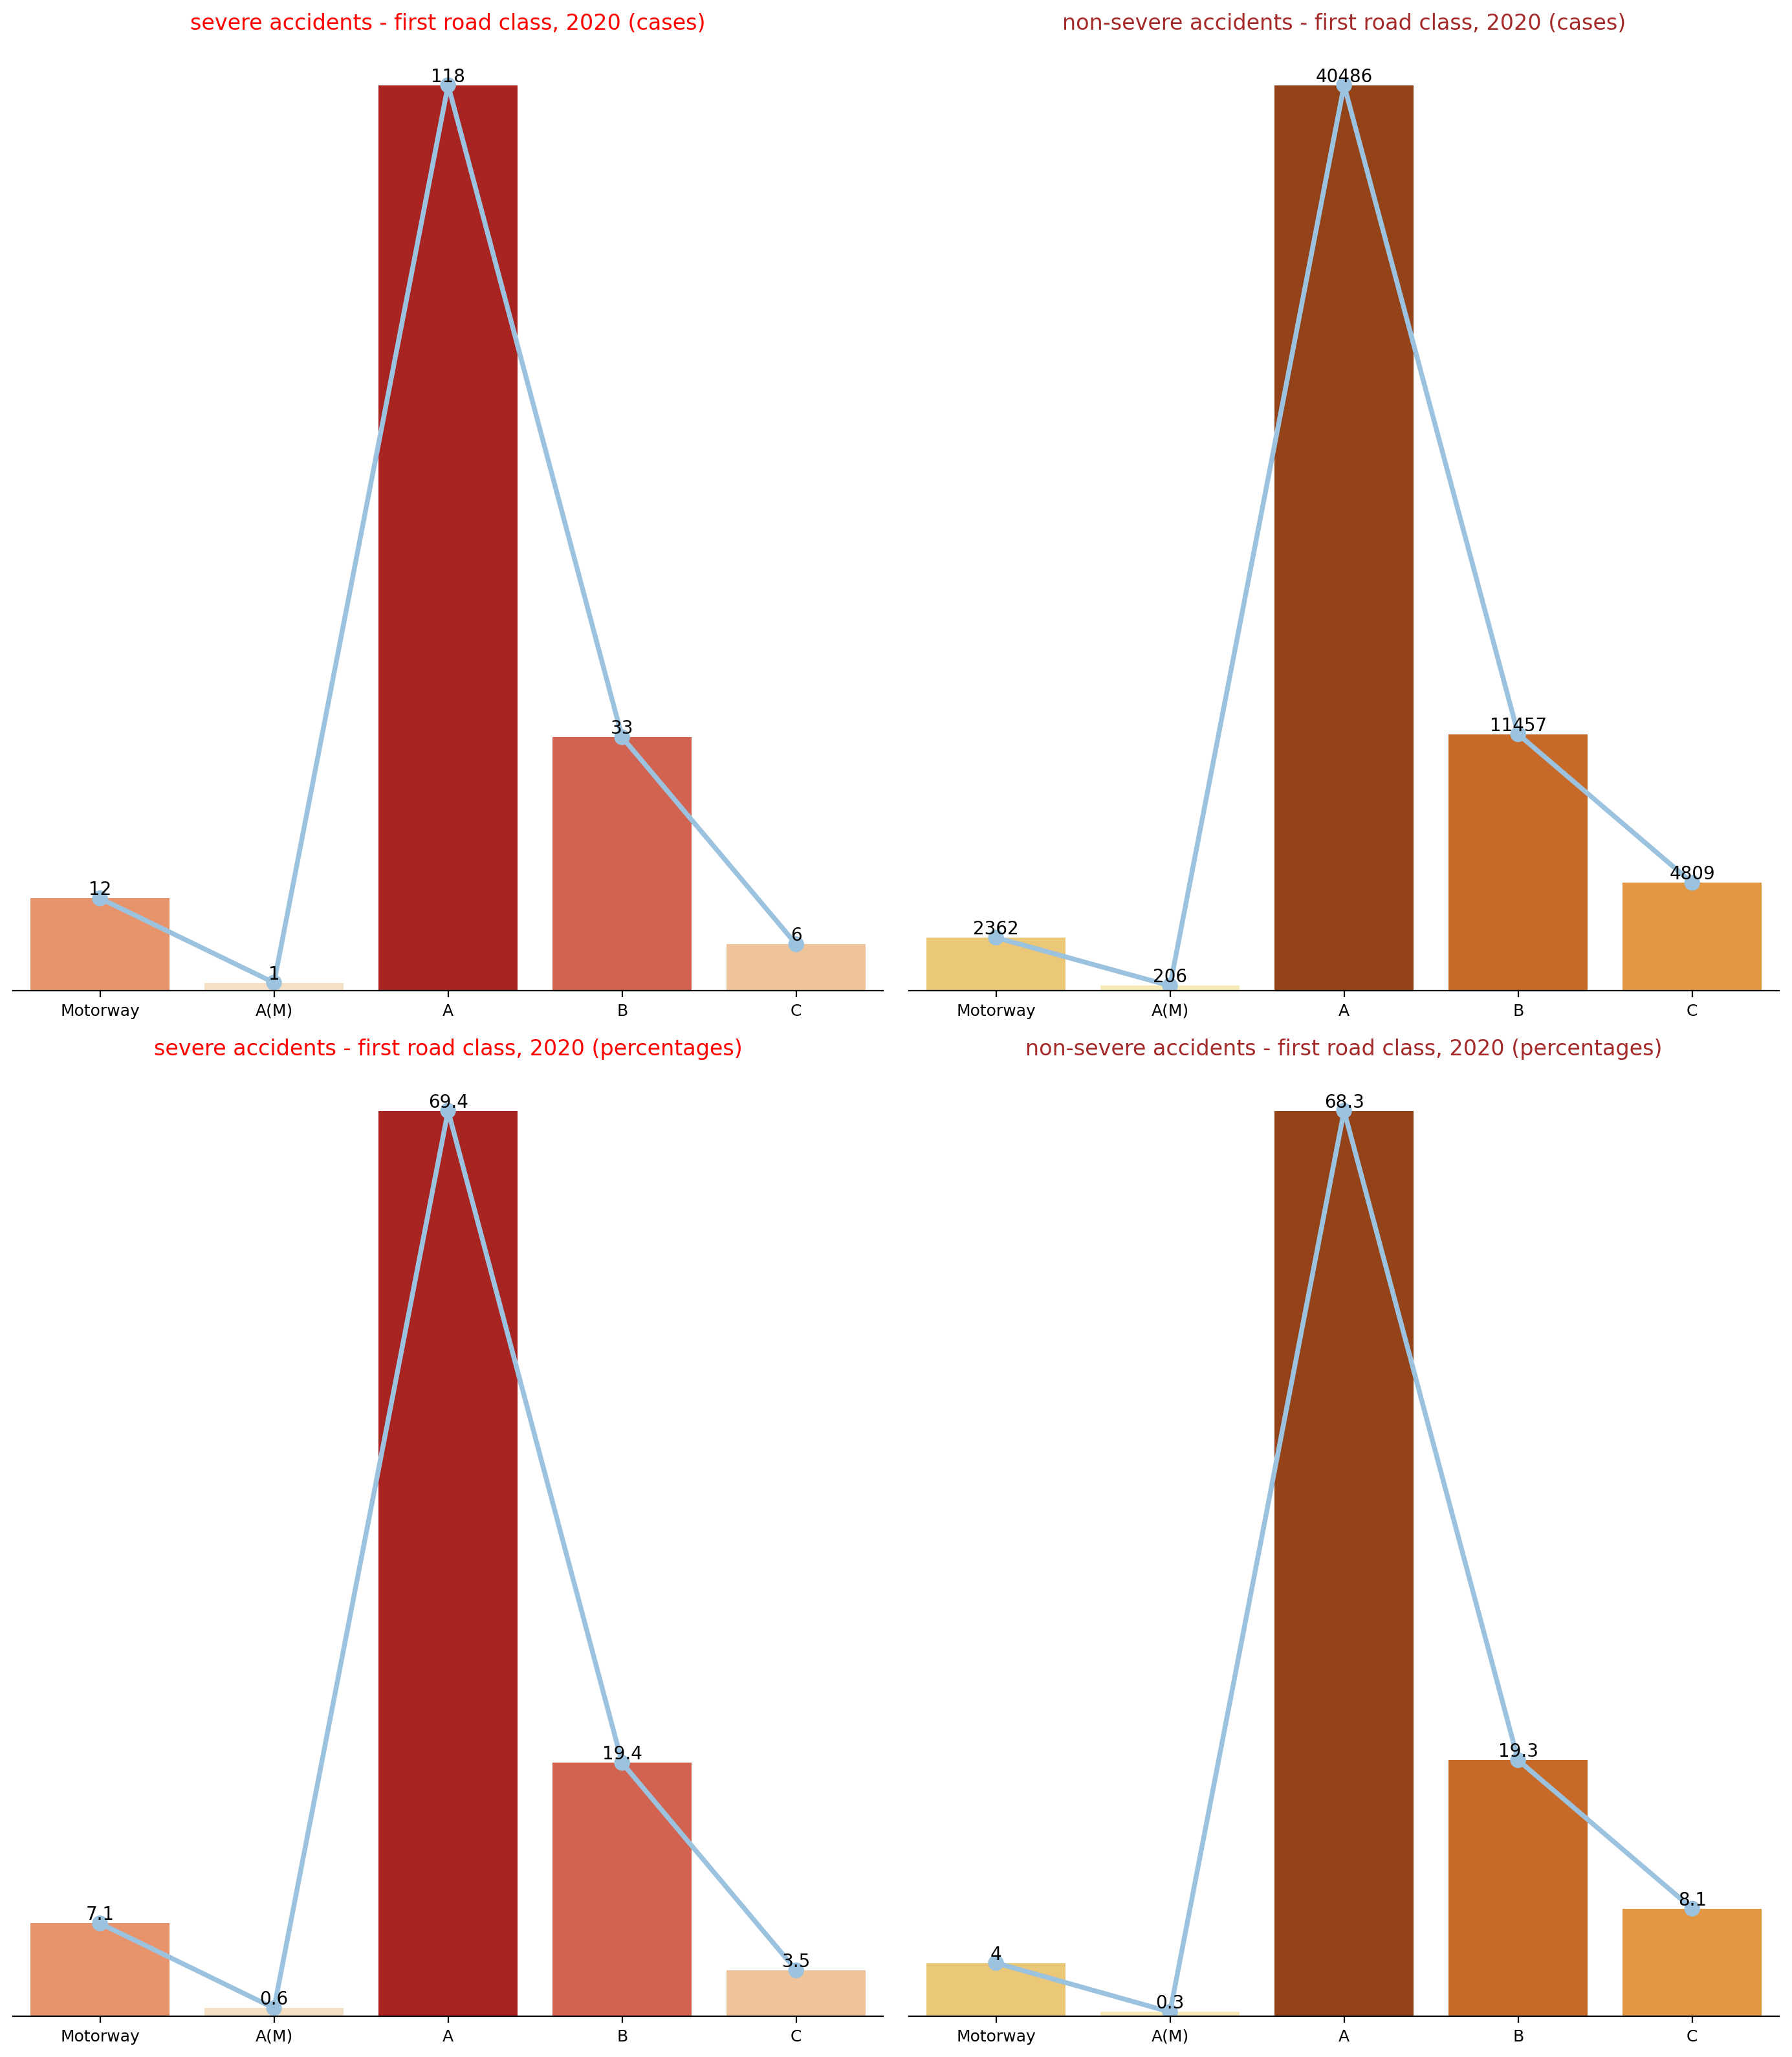

In [72]:
create_2_2('first road class',use_lookup=True)

* we see differences in the distribution: 8.7% severe accidents in motorways vs 3.8% in non severe.
* in A,B,C there are more non-severe in the distribution percentage than severe.
* in both cases, severe or not, like 68% happend in A class.

In [73]:
col_data('second_road_class')

table         field name code/format  \
57  Accident  second_road_class           0   
58  Accident  second_road_class           1   
59  Accident  second_road_class           2   
60  Accident  second_road_class           3   
61  Accident  second_road_class           4   
62  Accident  second_road_class           5   
63  Accident  second_road_class           6   

                                  label note  
57  Not at junction or within 20 metres  NaN  
58                             Motorway  NaN  
59                                 A(M)  NaN  
60                                    A  NaN  
61                                    B  NaN  
62                                    C  NaN  
63                         Unclassified  NaN

None

column values:


6     3     4     5    1   2
second_road_class  74473  9566  3656  3154  314  36

* there are no 0 values in the table (maybe under 6 - unclassified)

In [74]:
a,b,c,d= filter_dfs('second_road_class',[6],range(1,6))

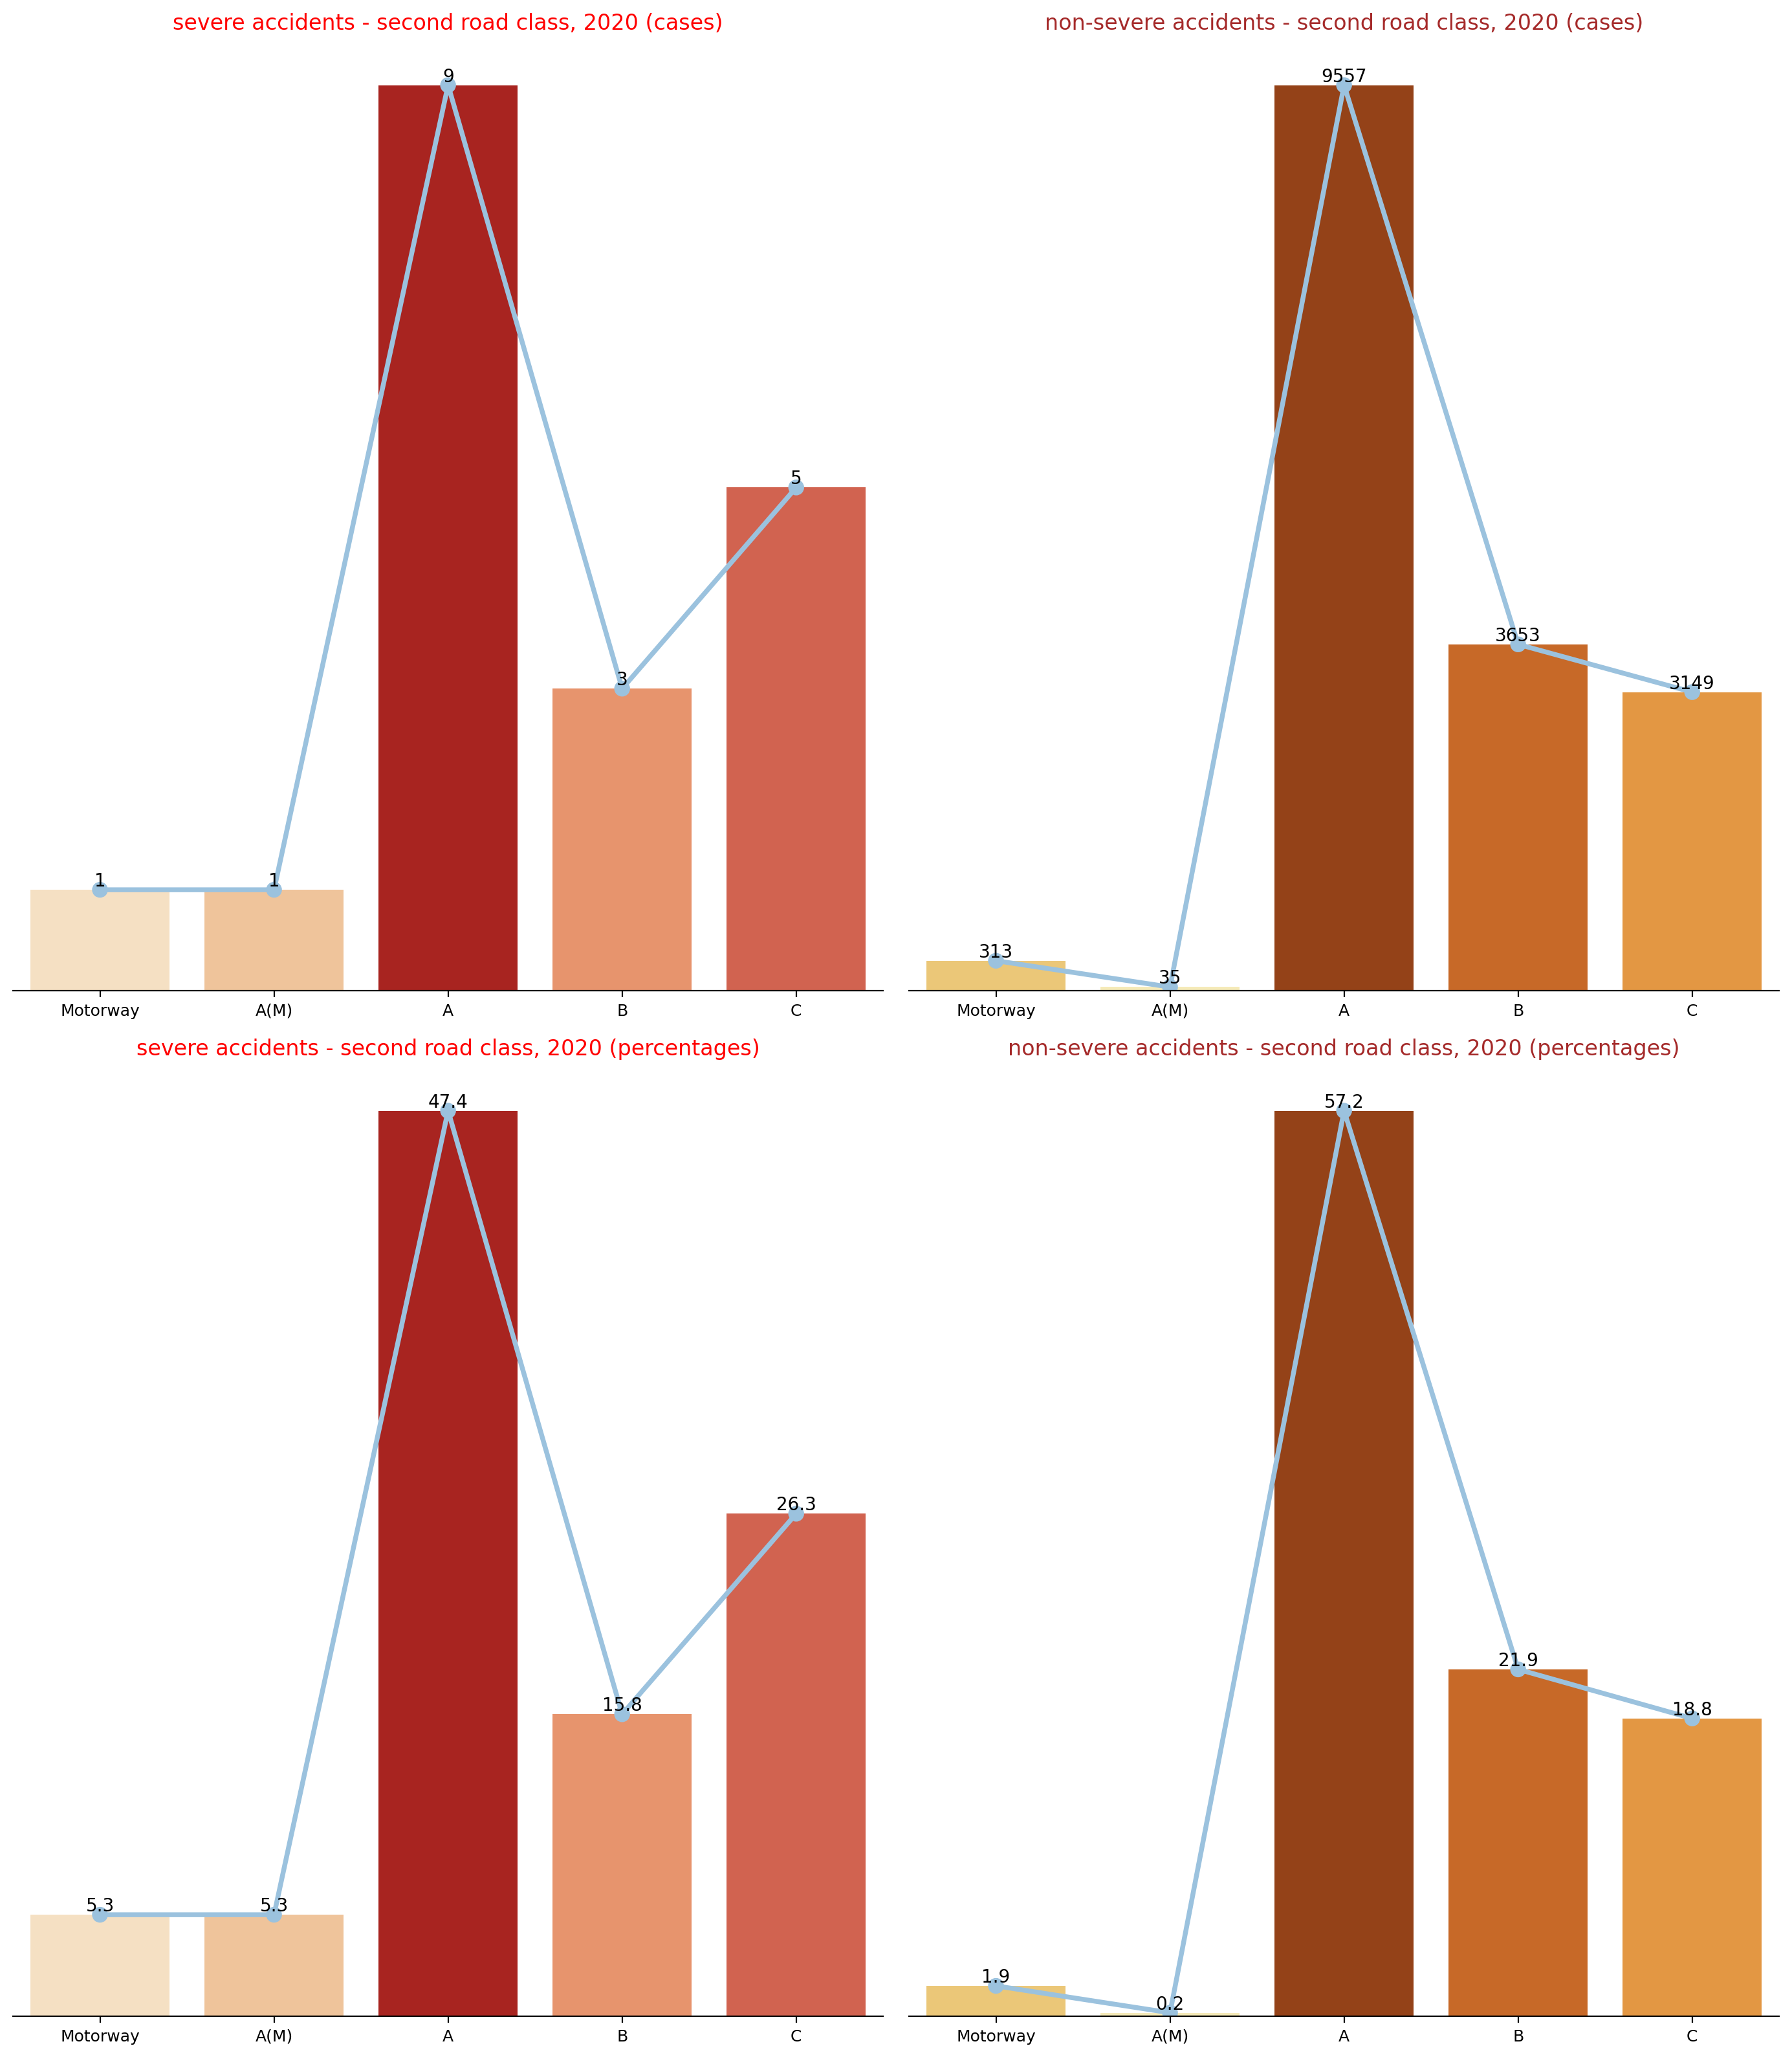

In [75]:
create_2_2('second road class',use_lookup=True)

* we see that in A(M) is missing in severe comlplitly, and very low in not severe.
* the result is more severe in motorways(3.4% to 1.8%), none not severe in A (57.2% to 55.8%)

### Junction

In [76]:
col_data('junction_detail')

table       field name code/format  \
39  Accident  junction_detail           0   
40  Accident  junction_detail           1   
41  Accident  junction_detail           2   
42  Accident  junction_detail           3   
43  Accident  junction_detail           5   
44  Accident  junction_detail           6   
45  Accident  junction_detail           7   
46  Accident  junction_detail           8   
47  Accident  junction_detail           9   
48  Accident  junction_detail          99   
49  Accident  junction_detail          -1   

                                  label note  
39  Not at junction or within 20 metres  NaN  
40                           Roundabout  NaN  
41                      Mini-roundabout  NaN  
42              T or staggered junction  NaN  
43                            Slip road  NaN  
44                           Crossroads  NaN  
45    More than 4 arms (not roundabout)  NaN  
46            Private drive or entrance  NaN  
47                       Other junction  NaN  
48              unknown (self reported)  NaN  
49         Data missing or out of range  NaN

None

column values:


0      3     6     1     9     8     99    2     7     5   \
junction_detail  37978  25626  8429  7326  4705  1887  1508  1300  1279  1159   

                 -1   
junction_detail    2

In [77]:
a,b,c,d= filter_dfs('junction_detail',[9,99,-1],range(0,9))

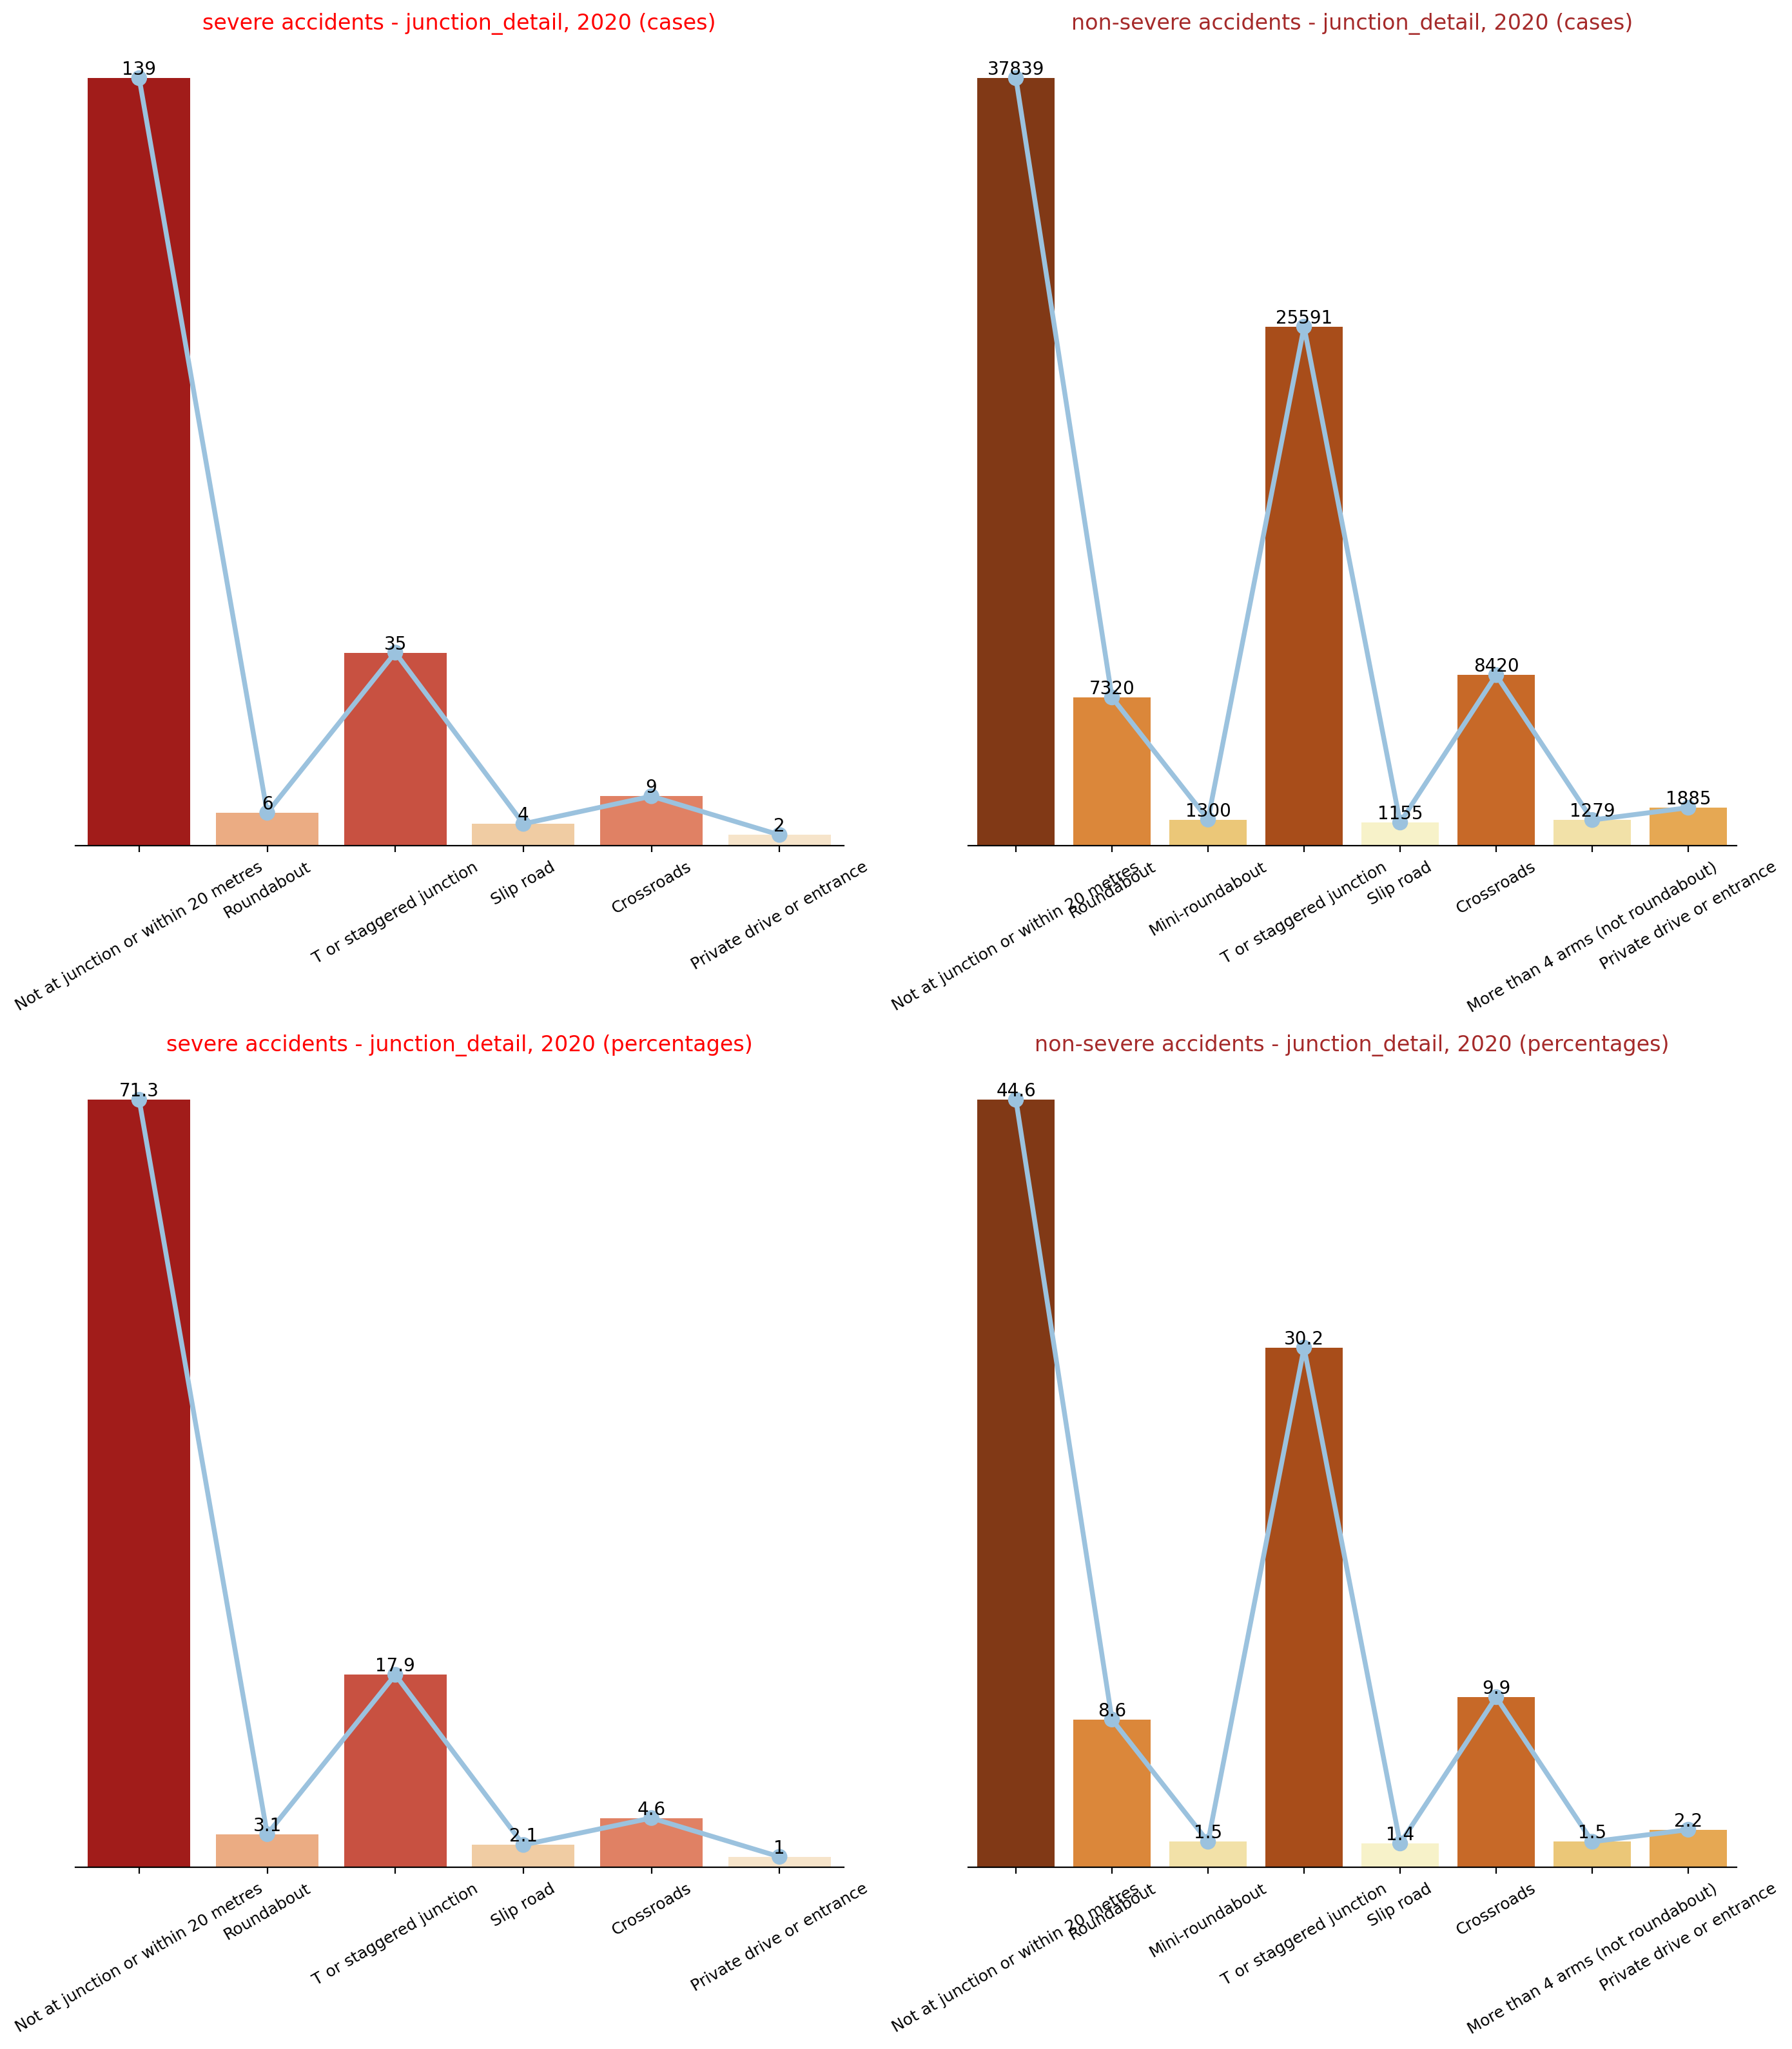

In [78]:
create_2_2('junction_detail',use_lookup=True,rotate=30,figsize=(12,30))

In [79]:
col_data('junction_control')

table        field name code/format  \
50  Accident  junction_control           0   
51  Accident  junction_control           1   
52  Accident  junction_control           2   
53  Accident  junction_control           3   
54  Accident  junction_control           4   
55  Accident  junction_control          -1   
56  Accident  junction_control           9   

                                  label note  
50  Not at junction or within 20 metres  NaN  
51                    Authorised person  NaN  
52                  Auto traffic signal  NaN  
53                            Stop sign  NaN  
54             Give way or uncontrolled  NaN  
55         Data missing or out of range  NaN  
56              unknown (self reported)  NaN

None

column values:


4     -1      2     9    3    1
junction_control  39998  38298  10407  1536  583  377

In [80]:
a,b,c,d= filter_dfs('junction_control',[9,-1],range(0,5))

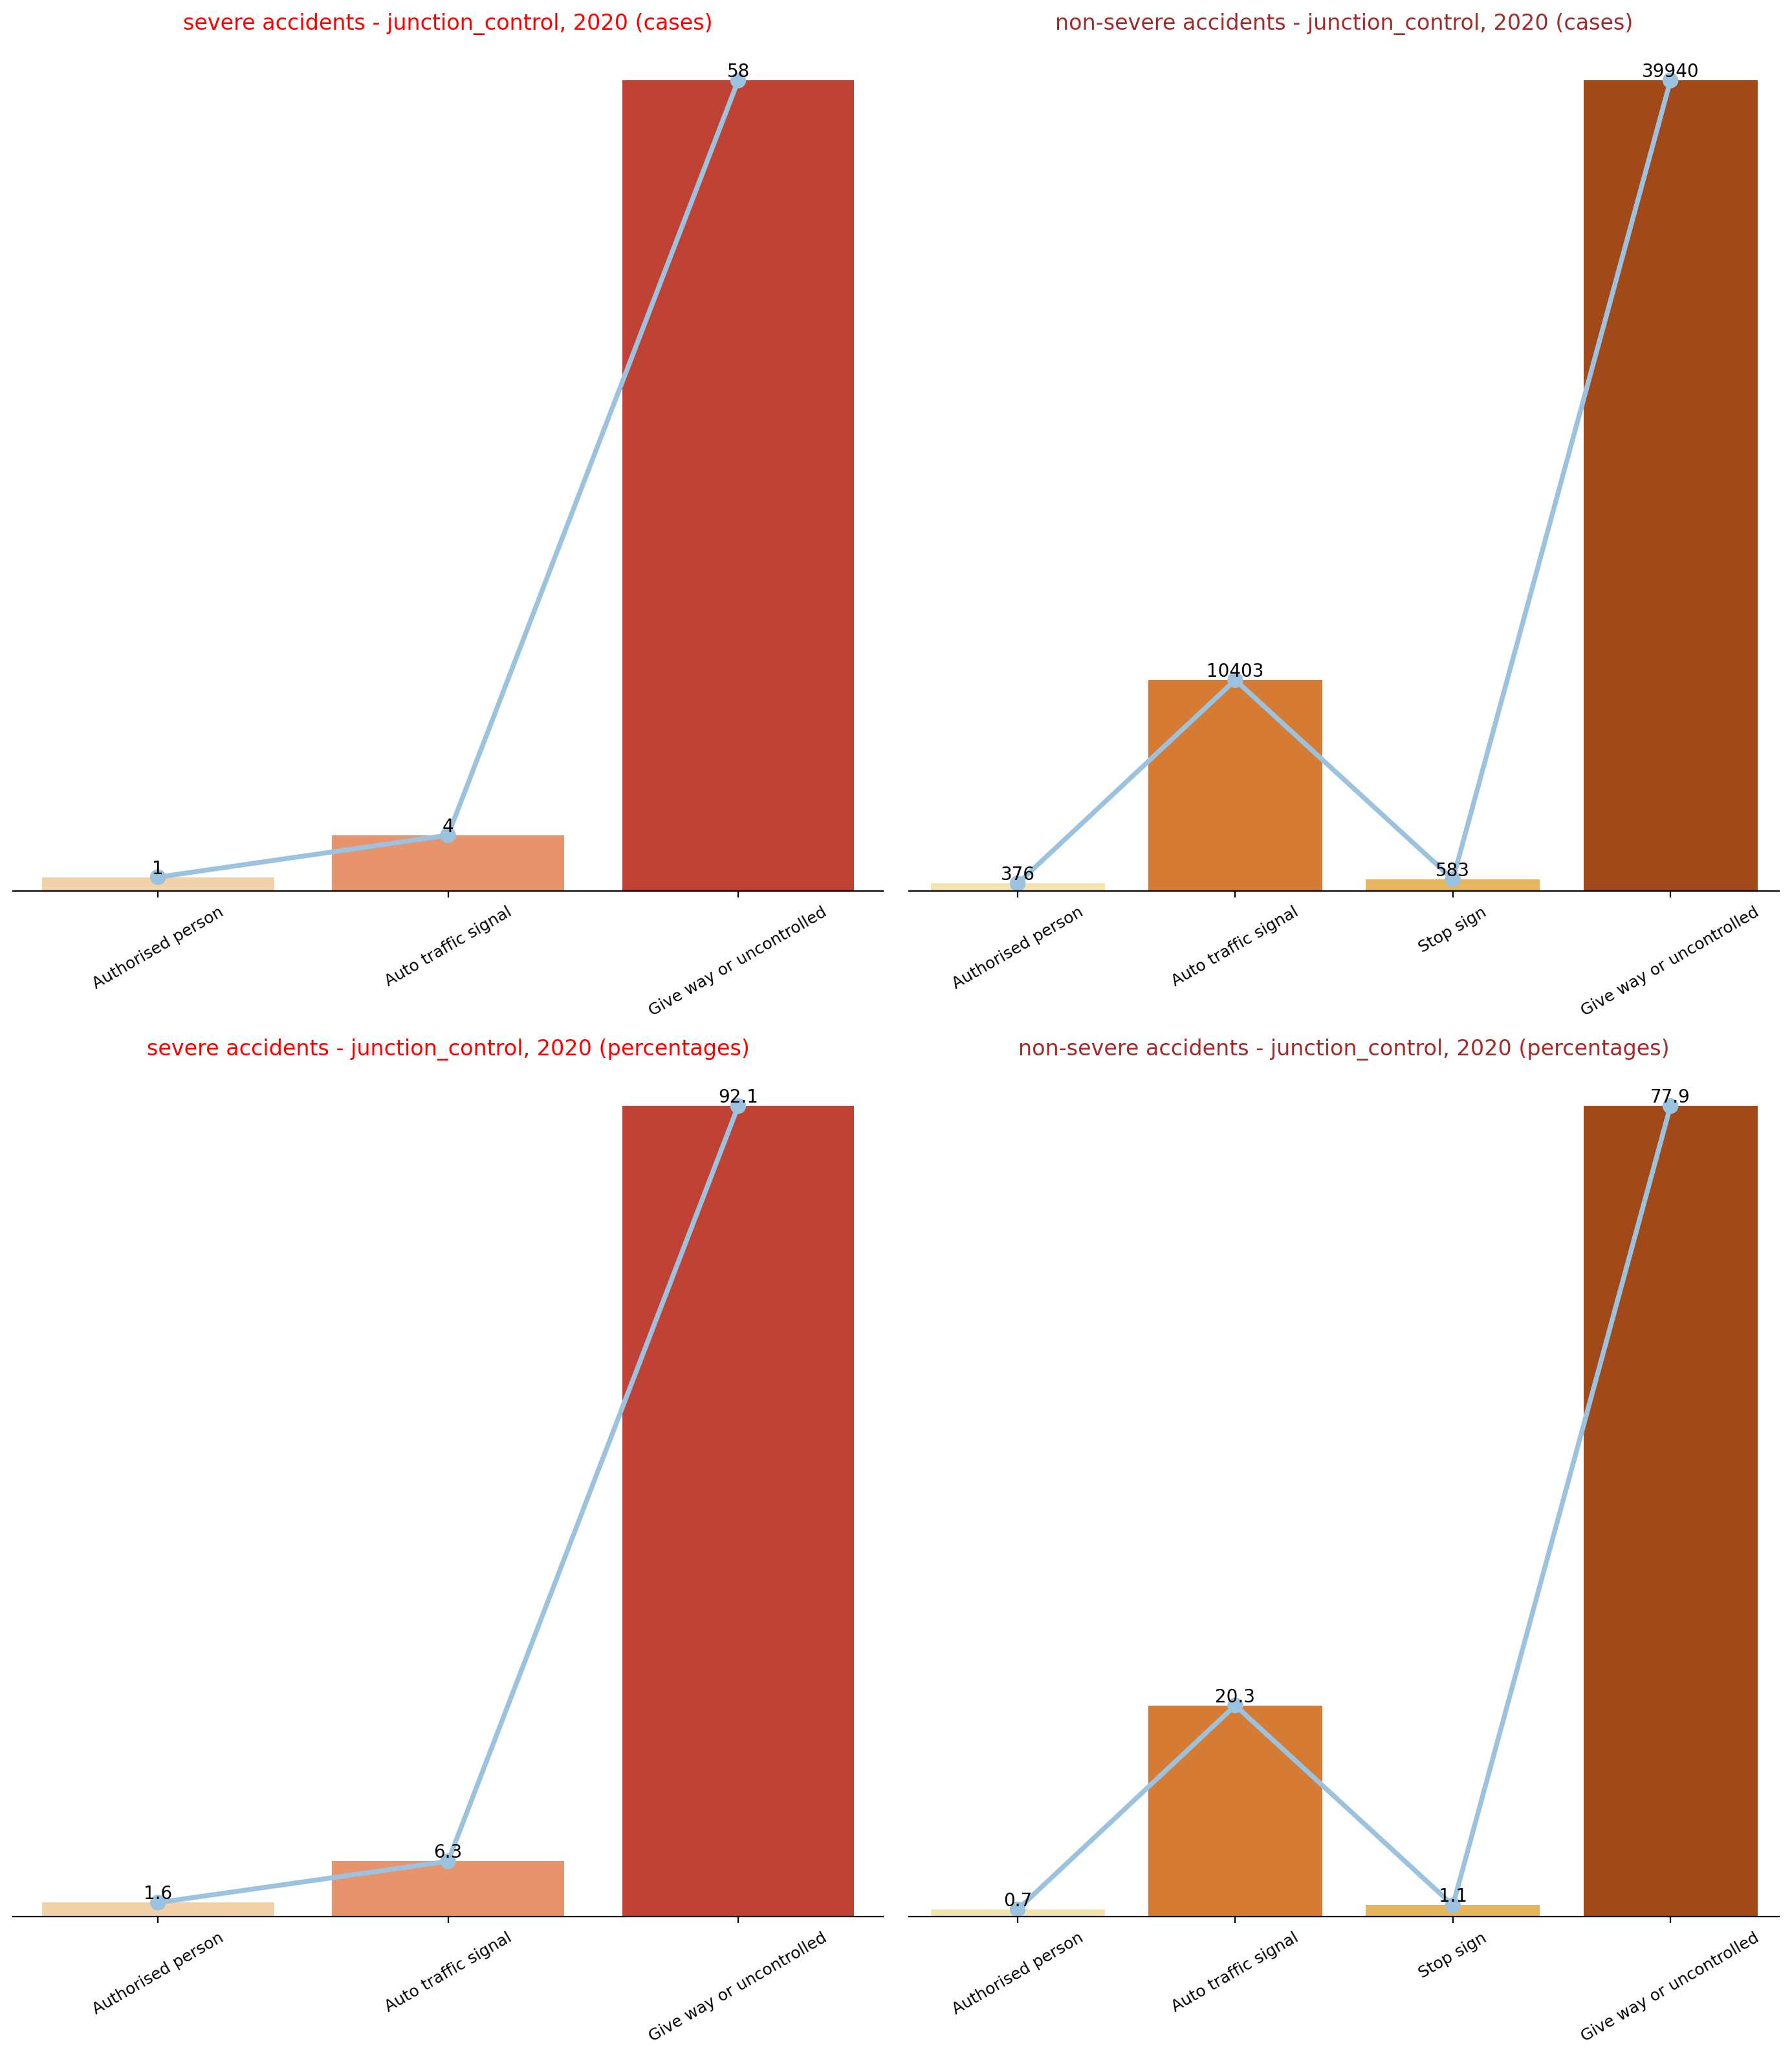

In [81]:
create_2_2('junction_control',use_lookup=True,rotate=30,figsize=(12,30))

* in auto trafic signals, there are more severe accidents 23.7% to 20.1%

### what are the most dangerous roads ?

In [82]:
labels = lookup[lookup['field name']=="first_road_class"].loc[:,['code/format','label']]
labels

code/format         label
19           1      Motorway
20           2          A(M)
21           3             A
22           4             B
23           5             C
24           6  Unclassified

In [83]:
def dangerous_roads(df):
    df_road = df.copy()
    df_road["first_road_class"] = df_road["first_road_class"].apply(lambda x: labels[labels["code/format"]==str(x)]["label"].values[0])
    df_road = df_road.groupby(["first_road_class","first_road_number"])["accident_index"].count().reset_index()
    df_road = df_road.rename(columns={"accident_index":"count"})
    sum_accidents = df_road["count"].sum()
    df_road = df_road[~df_road['first_road_class'].isin(["Unclassified","C"])]
    df_road = df_road.sort_values("count",ascending=False).reset_index(drop=True)
    df_road["road_name"] =  df_road["first_road_class"] +"-"+df_road["first_road_number"].astype('str')
    df_road["percentages"] = np.round(100 * df_road["count"]/sum_accidents ,2)
    
    return df_road


severe_dangerous_roads, non_severe_dangerous_roads  =  dangerous_roads(severe_df), dangerous_roads(non_severe_df)

In [84]:
non_severe_dangerous_roads.head(10)   

first_road_class  first_road_number  count road_name  percentages
0                A                 23    519      A-23         0.57
1                A                 38    470      A-38         0.52
2                A                  1    435       A-1         0.48
3                A                  3    432       A-3         0.47
4                A                  2    428       A-2         0.47
5                A                  5    412       A-5         0.45
6                A                 41    411      A-41         0.45
7                A                  4    398       A-4         0.44
8                A                  6    396       A-6         0.44
9                A                 40    393      A-40         0.43

In [85]:
severe_dangerous_roads.head(10)

first_road_class  first_road_number  count   road_name  percentages
0                A                 47      5        A-47         2.48
1                A                 16      4        A-16         1.98
2                A                158      3       A-158         1.49
3         Motorway                  1      2  Motorway-1         0.99
4         Motorway                  6      2  Motorway-6         0.99
5                A                414      2       A-414         0.99
6                A                 92      2        A-92         0.99
7                A                 49      2        A-49         0.99
8                A                 34      2        A-34         0.99
9         Motorway                  4      2  Motorway-4         0.99

In [86]:
TOP_NUMBER = 25
a = severe_dangerous_roads[['road_name','count']].iloc[:TOP_NUMBER]
b = non_severe_dangerous_roads[['road_name','count']].iloc[:TOP_NUMBER]
c= severe_dangerous_roads[['road_name','percentages']].iloc[:TOP_NUMBER]
d= non_severe_dangerous_roads[['road_name','percentages']].iloc[:TOP_NUMBER]

In [87]:
a

road_name  count
0         A-47      5
1         A-16      4
2        A-158      3
3   Motorway-1      2
4   Motorway-6      2
5        A-414      2
6         A-92      2
7         A-49      2
8         A-34      2
9   Motorway-4      2
10        A-82      2
11        A-27      2
12        A-21      2
13         A-4      2
14      A-3349      1
15       B-842      1
16       B-600      1
17    A(M)-194      1
18      A-7066      1
19      A-5123      1
20      B-1027      1
21      A-4421      1
22      A-4061      1
23      A-4042      1
24      B-1167      1

In [88]:
def plot_4_rows():
    fig, ax = plt.subplots(4,1,figsize=(14,16),dpi=250)
    for k,j in enumerate([a,b,c,d]):
        r = k

        if r%2==0:        
            pal = "OrRd"
            t = "severe"
            t_color= "red"
        else:
            pal= "YlOrBr"
            t_color="brown"
            t="non-severe"
        if r<2:
            per="(cases)"
            y="count"
        else:
            per="(percentages)"
            y="percentages"
        pal = sns.color_palette(pal, len(j))
        rank = j.index.argsort().argsort()[::-1]
        ax[r].set_title(f"{TOP_NUMBER} top red roads {t} accidents - {per}, 2020",color=t_color)
# 
        sns.barplot(data = j, x="road_name",y=y,ax=ax[r],palette=np.array(pal)[rank] )
        ax[r].set_yticks([]);
        for bars in ax[r].containers:
            ax[r].bar_label(bars,size=10)
        ax[r].set_xlabel("")
        ax[r].set_ylabel("");
        ax[r].set_xticklabels(labels = j["road_name"],rotation=30)
    plt.tight_layout()
    sns.despine(left=True)

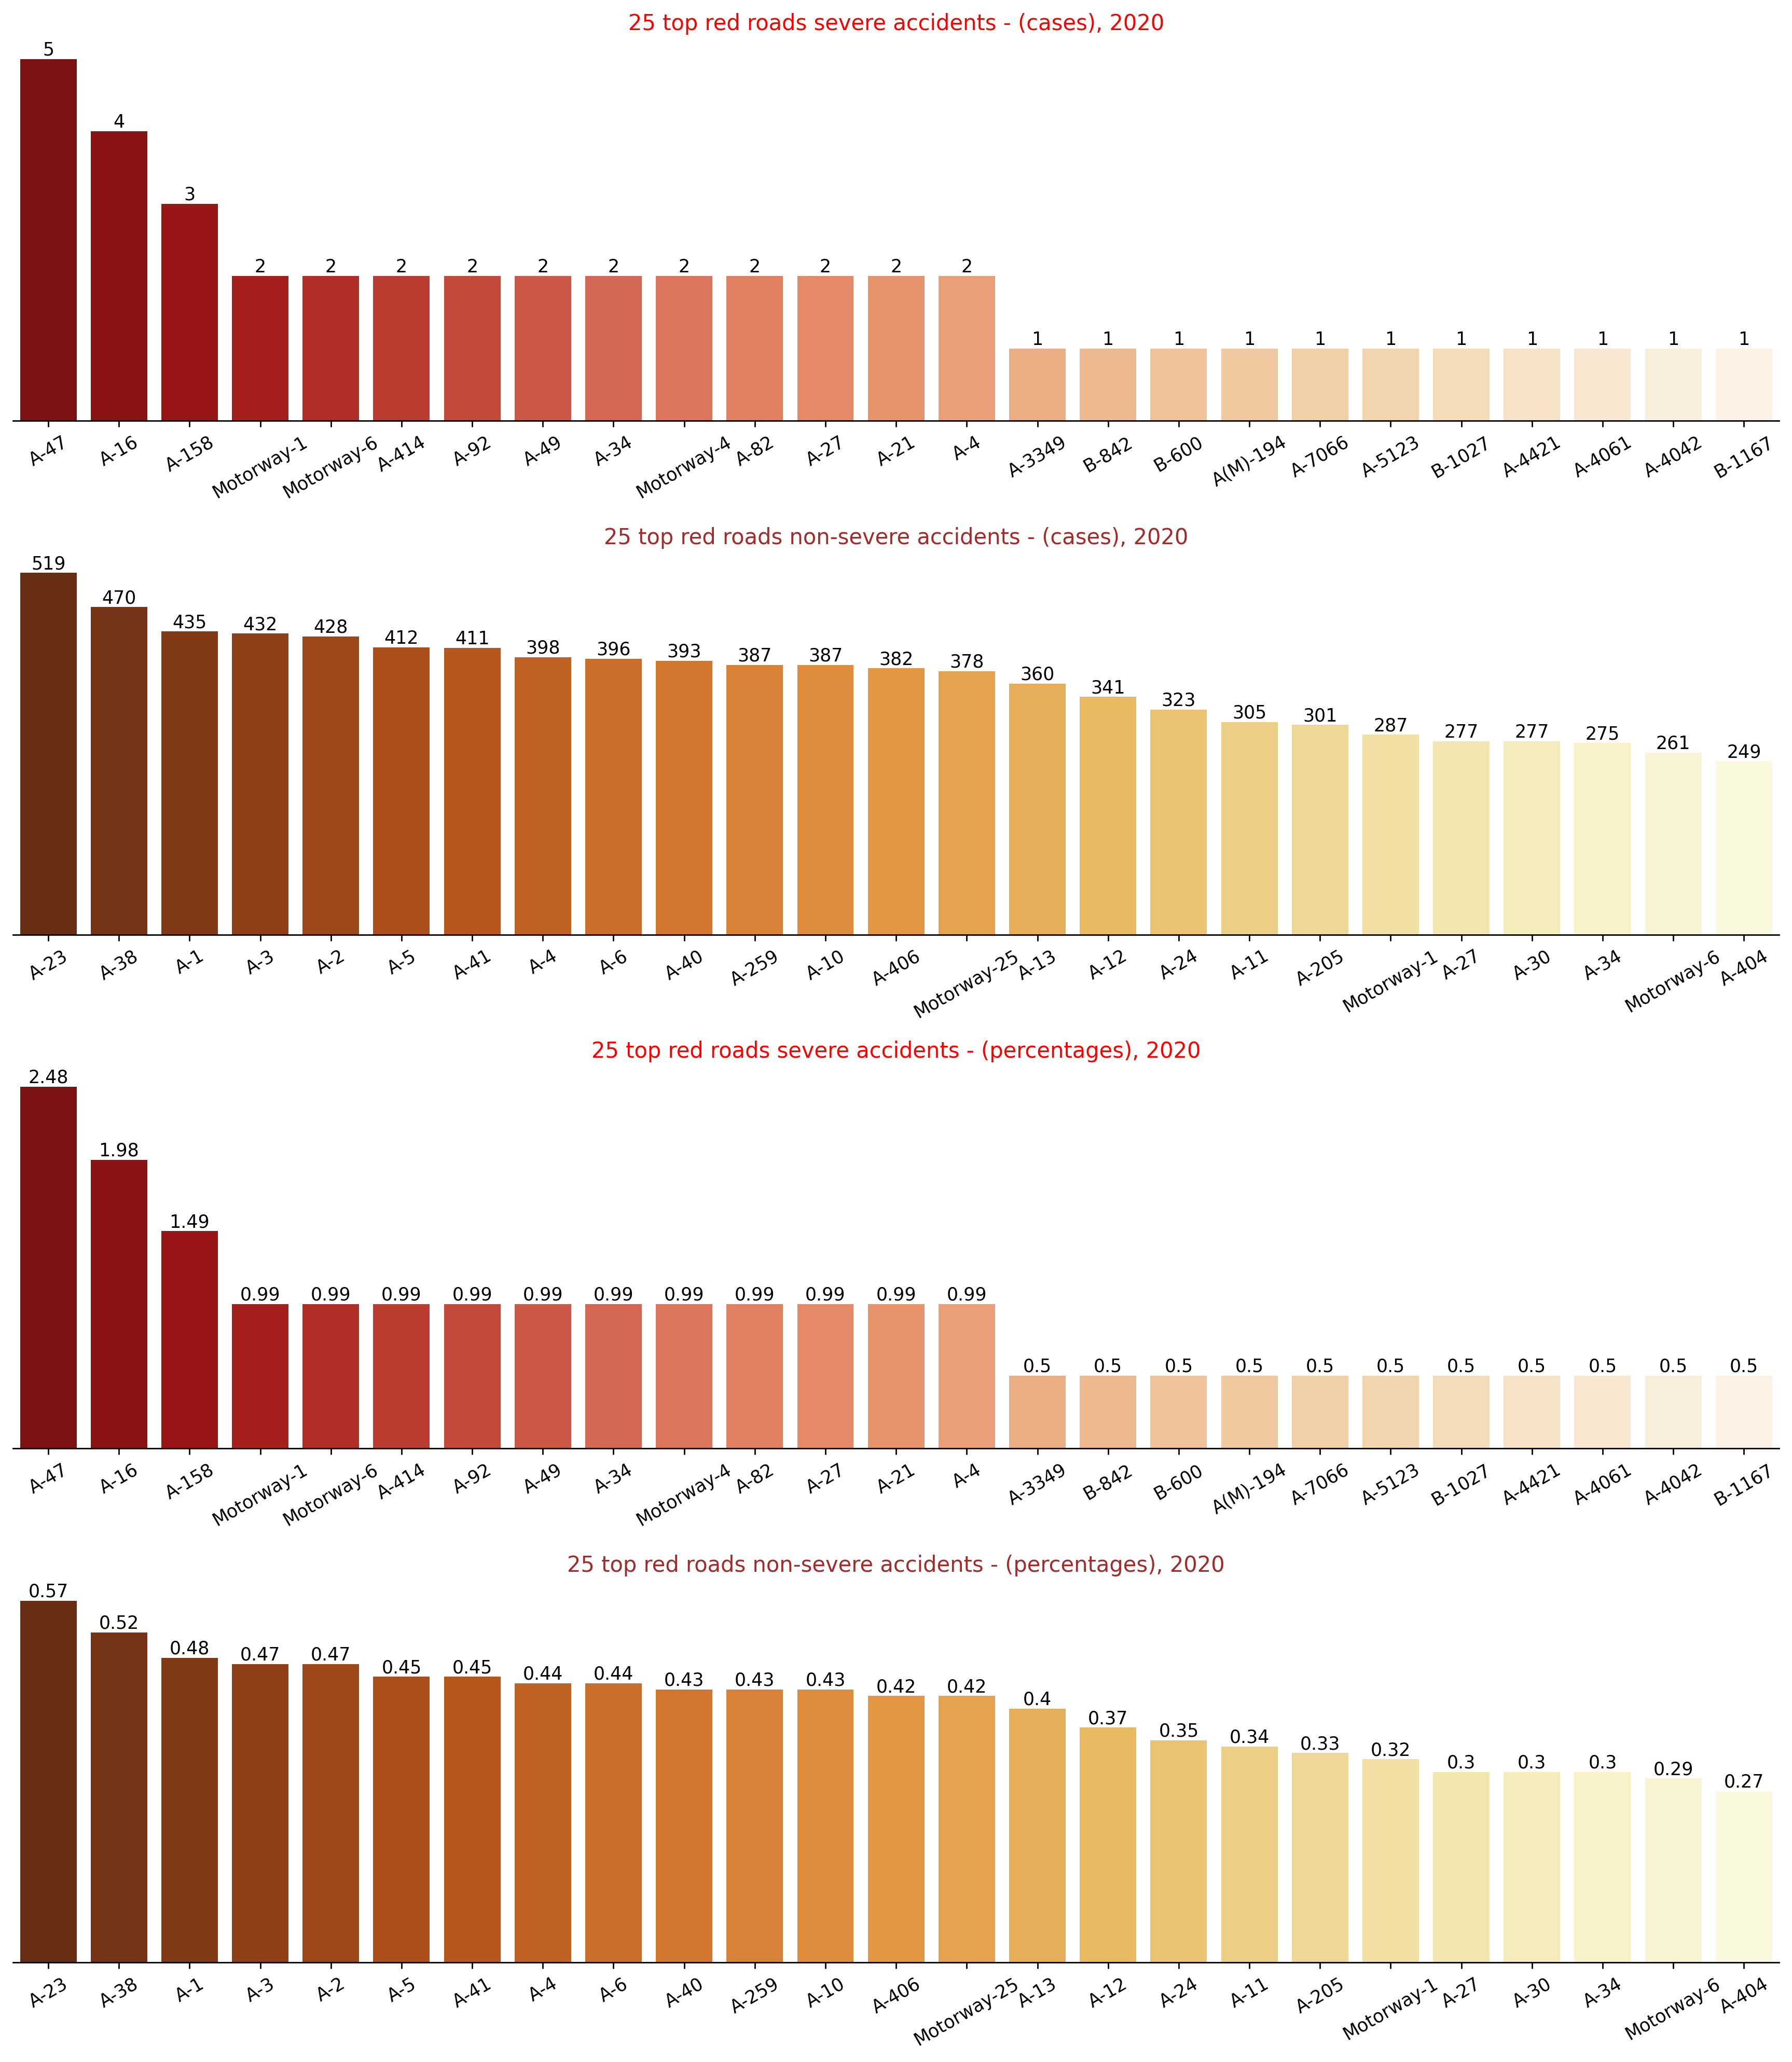

In [89]:
plot_4_rows()

There are 19 roads which occur in both "top 25" lists:

In [90]:
x = set(a["road_name"]).intersection(set(b["road_name"]))
x

{'A-27', 'A-34', 'A-4', 'Motorway-1', 'Motorway-6'}

In [91]:
len(x)

5

### Geodata

In [92]:
import folium
from sklearn.cluster import DBSCAN

In [94]:
x = pd.DataFrame(severe_df[["latitude","longitude"]])
x

latitude  longitude
3102   51.587108   0.224735
3583   51.499338   0.101736
19652  51.482150  -0.218475
21148  54.814695  -2.897101
21166  54.150303  -3.189454
...          ...        ...
89839  58.593227  -3.086624
89908  56.112265  -3.321448
90282  57.329487  -4.465896
90853  55.798882  -4.063158
90931  57.320376  -2.276278

[202 rows x 2 columns]

In [96]:
clustering = DBSCAN(eps=0.05).fit_predict(x)

In [98]:
len(set(clustering))

1

In [97]:
x["clustering"] = clustering

In [ ]:
x = x.groupby('clustering').mean().reset_index()

In [ ]:
from folium.plugins import MarkerCluster
map_osm = folium.Map(location=[51.509865, -0.118092],
                     tiles='Open Street Map',
                     zoom_start=6)

marker_cluster = MarkerCluster().add_to(map_osm)
for row in severe_df.loc[:,['longitude','latitude']].iterrows():
    row_values = row[1]
    location = [row_values['latitude'], row_values['longitude']]
    marker = folium.Circle(location = location)
    marker.add_to(marker_cluster)

display(map_osm)